In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("data_skor_2.csv")

In [3]:
df.head()

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0   Balauring                    20.000000                     100.000000   
1  Benihading                    66.666667                     100.000000   
2        Bour                    21.428571                      96.428571   
3    Dikesare                     6.666667                     100.000000   
4    Duawutun                    20.000000                     100.000000   

   Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                   76.666667                                      80.000000   
1                    0.000000                                      50.000000   
2                    0.000000                                      57.142857   
3                    0.000000                                      66.666667   
4                  100.000000                                      80.000000   

   Rata-rata luas lahan (Ha)  Rata-rata produksi pertanian (ton)  \
0                  10.350000                            0.496667   
1                   1.156233                            0.592959   
2                   0.720125                            2.130036   
3                   0.205933                           20.127110   
4                   0.928333                            5.889333   

   Rata-rata tangkapan ikan (Kg)  Persentase petani membeli pupuk  \
0                       9.300000                        66.666667   
1                       0.000000                         0.000000   
2                       0.821429                        50.000000   
3                       7.666667                         0.000000   
4                       1.233333                         0.000000   

   Persentase petani membeli pestisida  \
0                            11.111111   
1                             7.407407   
2                            83.333333   
3                             0.000000   
4                             0.000000   

   Persentase petani menyewa alat pertanian  Persentase kepemilikan ternak  \
0                                  0.000000                      66.666667   
1                                  0.000000                     100.000000   
2                                 41.666667                      92.857143   
3                                  0.000000                      76.666667   
4                                  0.000000                      66.666667   

   Persentase pembelian obat  Persentase balita sering diperiksa di Posyandu  \
0                  10.000000                                      100.000000   
1                  20.000000                                      100.000000   
2                  14.285714                                      100.000000   
3                   3.333333                                       95.454545   
4                   0.000000                                      100.000000   

   Persentase terdapat anggota keluarga yang sering sakit  \
0                                          33.333333        
1                                          63.333333        
2                                          35.714286        
3                                          20.000000        
4                                          10.000000        

   Persentase mendapat bantuan dari pemerintah  Persentase tidak membeli obat  \
0                                    70.000000                      90.000000   
1                                    83.333333                      80.000000   
2                                    85.714286                      85.714286   
3                                    76.666667                      96.666667   
4                                    50.000000                     100.000000   

   Persentase keluarga sehat  Persentase kemandirian perekonomian desa  
0                  66.666667                                 30.000000  
1                  36.666667          

In [4]:
df.drop(columns=['Persentase balita sering diperiksa di Posyandu'], inplace=True)
df.drop(columns=['Persentase pembelian obat'], inplace=True)
df.drop(columns=['Persentase mendapat bantuan dari pemerintah'], inplace=True)
df.drop(columns=['Persentase terdapat anggota keluarga yang sering sakit'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Desa                                           29 non-null     object 
 1   Persentase gaji di atas UMK                    29 non-null     float64
 2   Persentase sumber listrik PLN                  29 non-null     float64
 3   Persentase air bersih PDAM                     29 non-null     float64
 4   Persentase bangunan rumah bukan "rumah kecil"  29 non-null     float64
 5   Rata-rata luas lahan (Ha)                      29 non-null     float64
 6   Rata-rata produksi pertanian (ton)             29 non-null     float64
 7   Rata-rata tangkapan ikan (Kg)                  29 non-null     float64
 8   Persentase petani membeli pupuk                29 non-null     float64
 9   Persentase petani membeli pestisida            29 non-nu

In [6]:
df.isna().sum()

Desa                                             0
Persentase gaji di atas UMK                      0
Persentase sumber listrik PLN                    0
Persentase air bersih PDAM                       0
Persentase bangunan rumah bukan "rumah kecil"    0
Rata-rata luas lahan (Ha)                        0
Rata-rata produksi pertanian (ton)               0
Rata-rata tangkapan ikan (Kg)                    0
Persentase petani membeli pupuk                  0
Persentase petani membeli pestisida              0
Persentase petani menyewa alat pertanian         0
Persentase kepemilikan ternak                    0
Persentase tidak membeli obat                    0
Persentase keluarga sehat                        0
Persentase kemandirian perekonomian desa         0
dtype: int64

## analisis distribusi

In [7]:
#memisahkan data numerik dan kategorik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [8]:
df[numerical_cols].describe().T

count       mean        std  \
Persentase gaji di atas UMK                     29.0  23.094844  14.946905   
Persentase sumber listrik PLN                   29.0  98.853488   2.390438   
Persentase air bersih PDAM                      29.0  47.823508  48.804427   
Persentase bangunan rumah bukan "rumah kecil"   29.0  67.276354  14.929311   
Rata-rata luas lahan (Ha)                       29.0  17.634582  35.684787   
Rata-rata produksi pertanian (ton)              29.0  10.875879  15.420498   
Rata-rata tangkapan ikan (Kg)                   29.0   1.297650   2.203005   
Persentase petani membeli pupuk                 29.0  17.371751  30.234160   
Persentase petani membeli pestisida             29.0  30.467098  31.440932   
Persentase petani menyewa alat pertanian        29.0   7.547862  14.553425   
Persentase kepemilikan ternak                   29.0  76.220033  19.650800   
Persentase tidak membeli obat                   29.0  83.888396   9.918016   
Persentase keluarga sehat                       29.0  55.898187  22.956011   
Persentase kemandirian perekonomian desa        29.0  36.042465  19.509974   

                                                     min         25%  \
Persentase gaji di atas UMK                     3.333333   10.000000   
Persentase sumber listrik PLN                  90.000000  100.000000   
Persentase air bersih PDAM                      0.000000    0.000000   
Persentase bangunan rumah bukan "rumah kecil"  16.666667   63.333333   
Rata-rata luas lahan (Ha)                       0.205933    0.552516   
Rata-rata produksi pertanian (ton)              0.028387    0.496667   
Rata-rata tangkapan ikan (Kg)                   0.000000    0.000000   
Persentase petani membeli pupuk                 0.000000    0.000000   
Persentase petani membeli pestisida             0.000000    0.000000   
Persentase petani menyewa alat pertanian        0.000000    0.000000   
Persentase kepemilikan ternak                   3.448276   66.666667   
Persentase tidak membeli obat                  63.333333   80.000000   
Persentase keluarga sehat                      13.333333   40.000000   
Persentase kemandirian perekonomian desa       13.333333   20.000000   

                                                      50%         75%  \
Persentase gaji di atas UMK                     21.428571   32.258065   
Persentase sumber listrik PLN                  100.000000  100.000000   
Persentase air bersih PDAM                      16.666667  100.000000   
Persentase bangunan rumah bukan "rumah kecil"   66.666667   76.666667   
Rata-rata luas lahan (Ha)                        1.061917   10.350000   
Rata-rata produksi pertanian (ton)               2.650610   14.839667   
Rata-rata tangkapan ikan (Kg)                    0.433333    1.233333   
Persentase petani membeli pupuk                  0.000000   12.500000   
Persentase petani membeli pestisida             28.571429   52.173913   
Persentase petani menyewa alat pertanian         0.000000   10.000000   
Persentase kepemilikan ternak                   83.333333   90.000000   
Persentase tidak membeli obat                   85.714286   90.000000   
Persentase keluarga sehat                       60.000000   70.000000   
Persentase kemandirian perekonomian desa        30.000000   50.000000   

                                                      max  
Persentase gaji di atas UMK                     66.666667  
Persentase sumber listrik PLN                  100.000000  
Persentase air bersih PDAM                     100.000000  
Persentase bangunan rumah bukan "rumah kecil"   96.551724  
Rata-rata luas lahan (Ha)                      138.232790  
Rata-rata produksi pertanian (ton)              57.655900  
Rata-rata tangkapan ikan (Kg)                    9.300000  
Persentase petani membeli pupuk                100.000000  
Persentase petani membeli pestisida            100.000000  
Persentase petani menyewa alat pertanian        66.666667  
Persentase kepemilikan ternak          

In [9]:
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

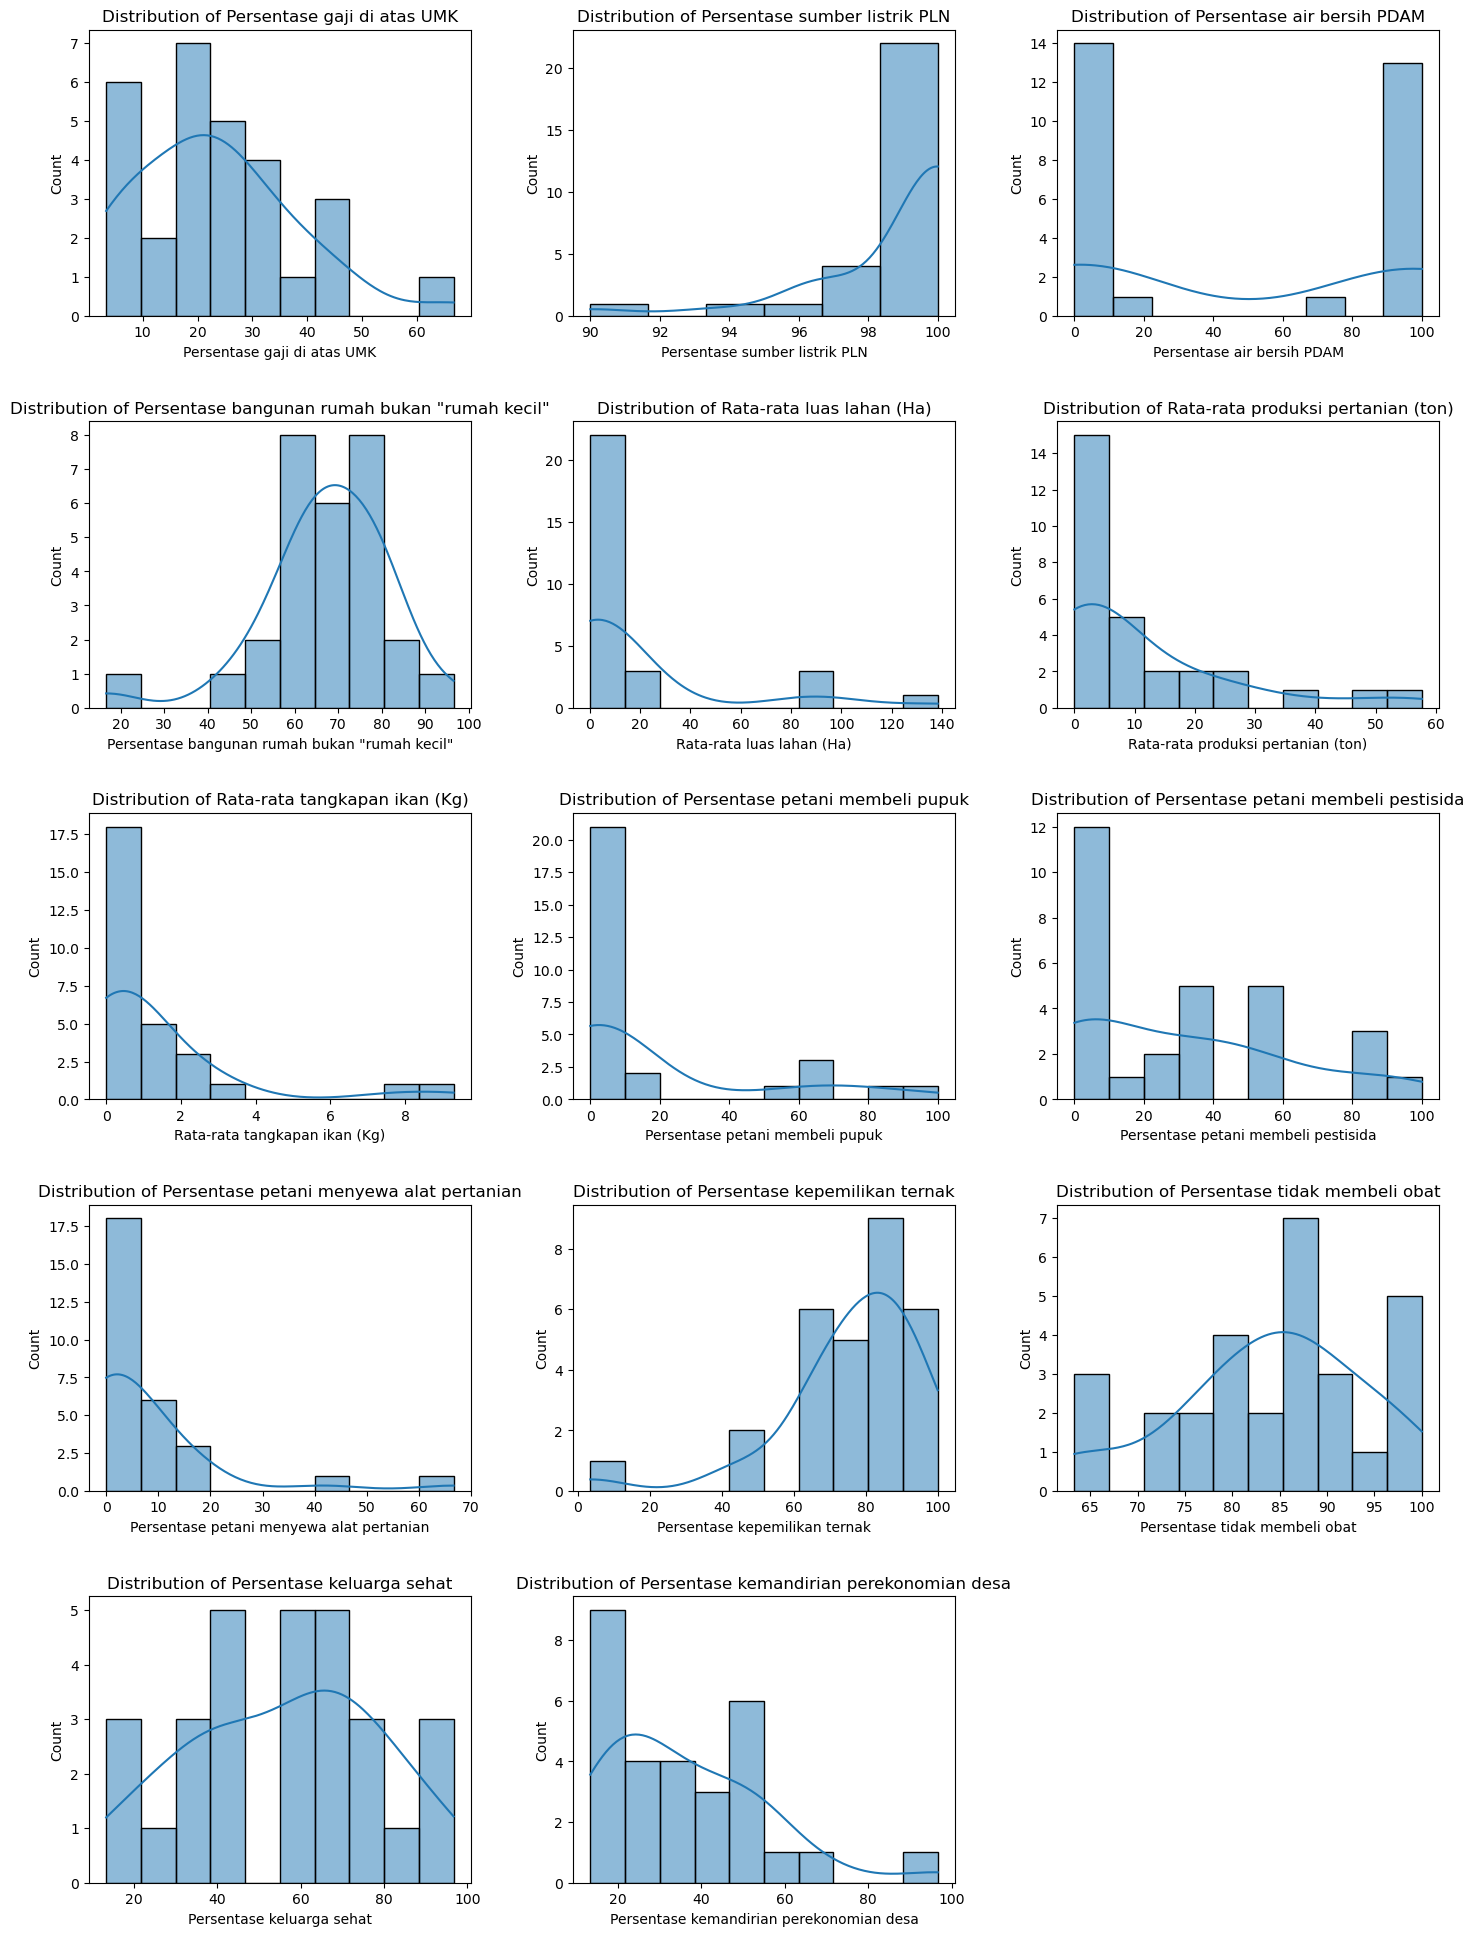

In [10]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=min(10, df[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(pad=3)
plt.show()

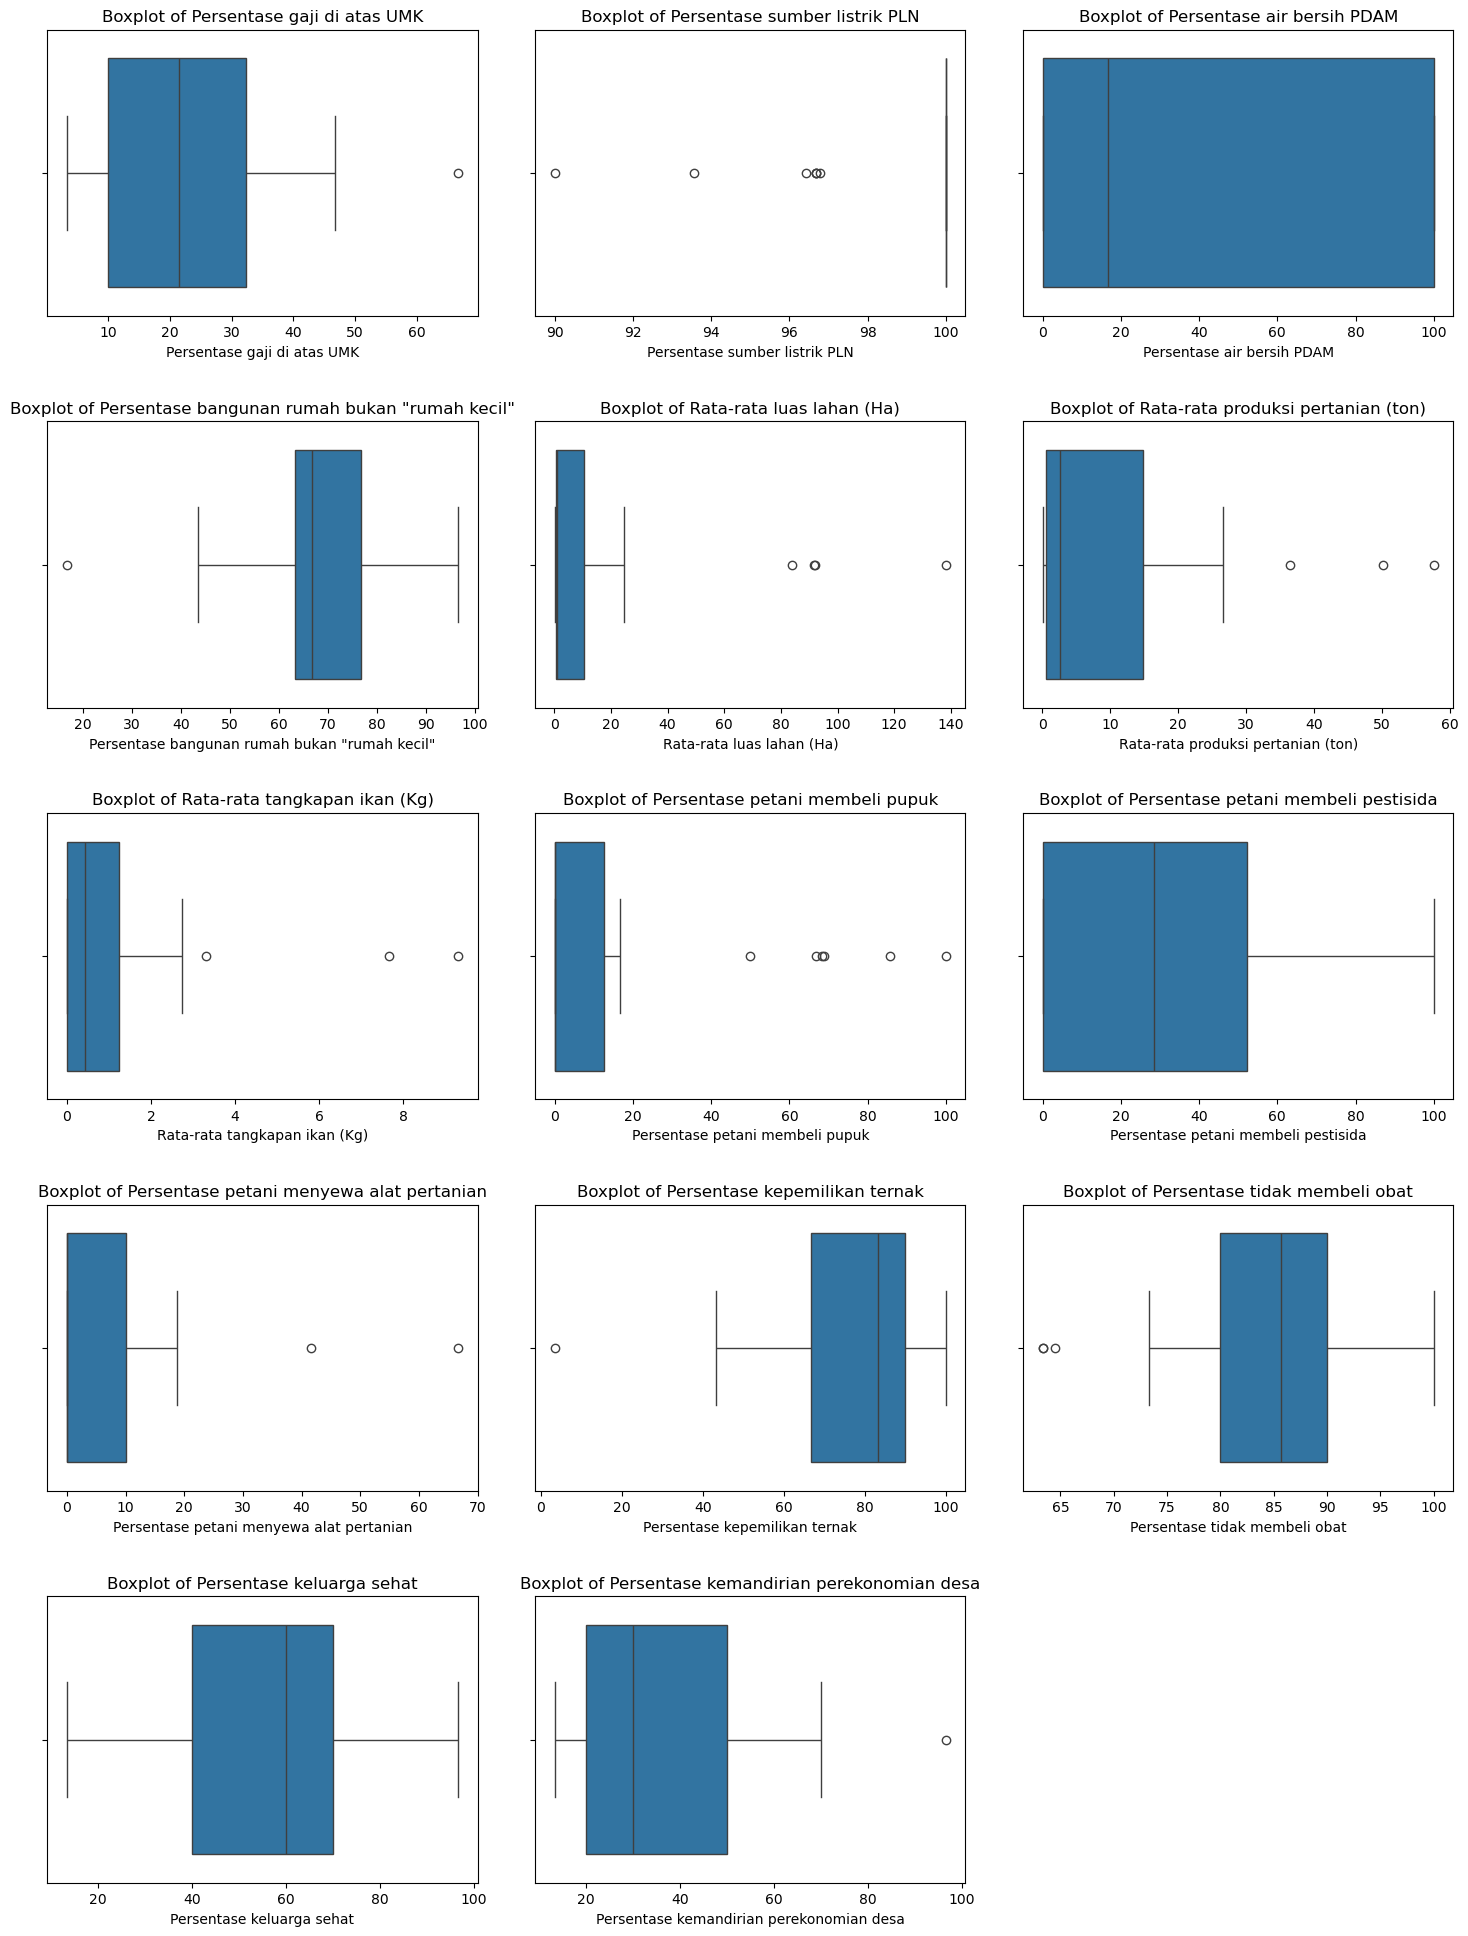

In [11]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

## normalisasi

In [12]:
#Normalisasi
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
df_normalized

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                     0.263158                       1.000000   
1     Benihading                     1.000000                       1.000000   
2           Bour                     0.285714                       0.642857   
3       Dikesare                     0.052632                       1.000000   
4       Duawutun                     0.263158                       1.000000   
5      Dulitukan                     0.315789                       1.000000   
6       Hoelea I                     0.210526                       1.000000   
7      Ile Kimok                     0.263158                       1.000000   
8        Kalikur                     0.684211                       1.000000   
9       Katakeja                     0.456706                       0.677419   
10     Labalimut                     0.526316                       1.000000   
11      Lamatuka                     0.456706                       1.000000   
12    Laranwutun                     0.421053                       1.000000   
13        Lolong                     0.105263                       1.000000   
14         Mahal                     0.105263                       1.000000   
15       Merdeka                     0.631579                       1.000000   
16       Muruona                     0.062901                       1.000000   
17      Nubamado                     0.210526                       0.000000   
18          Pada                     0.303905                       0.354839   
19      Paubokol                     0.000000                       1.000000   
20          Puor                     0.368421                       1.000000   
21      Riangbao                     0.315789                       1.000000   
22      Tagawiti                     0.000000                       1.000000   
23      Todanara                     0.219601                       1.000000   
24   Tubuk Rajan                     0.368421                       0.666667   
25  Tubungwalang                     0.052632                       0.666667   
26       Waienga                     0.000000                       0.666667   
27      Watodiri                     0.631579                       1.000000   
28     Wuakerong                     0.473684                       1.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                     0.766667                                       0.792806   
1                     0.000000                                       0.417266   
2                     0.000000                                       0.506680   
3                     0.000000                                       0.625899   
4                     1.000000                                       0.792806   
5                     0.166667                                       0.584173   
6                     0.000000                                       0.667626   
7                     0.000000                                       0.751079   
8                     0.000000                                       0.667626   
9                     1.000000                                       0.679740   
10                    1.000000                                       0.584173   
11                    1.000000                                       0.720121   
12                    1.000000                                       0.792806   
13                    1.000000                                       0.333813   
14                    0.033333                                       0.625899   
15                    0.000000                                       0.834532   
16                    1.000000                                       0.554659   
17                    1.000000                                       0.584173   
18                    0.935484                                       0.5

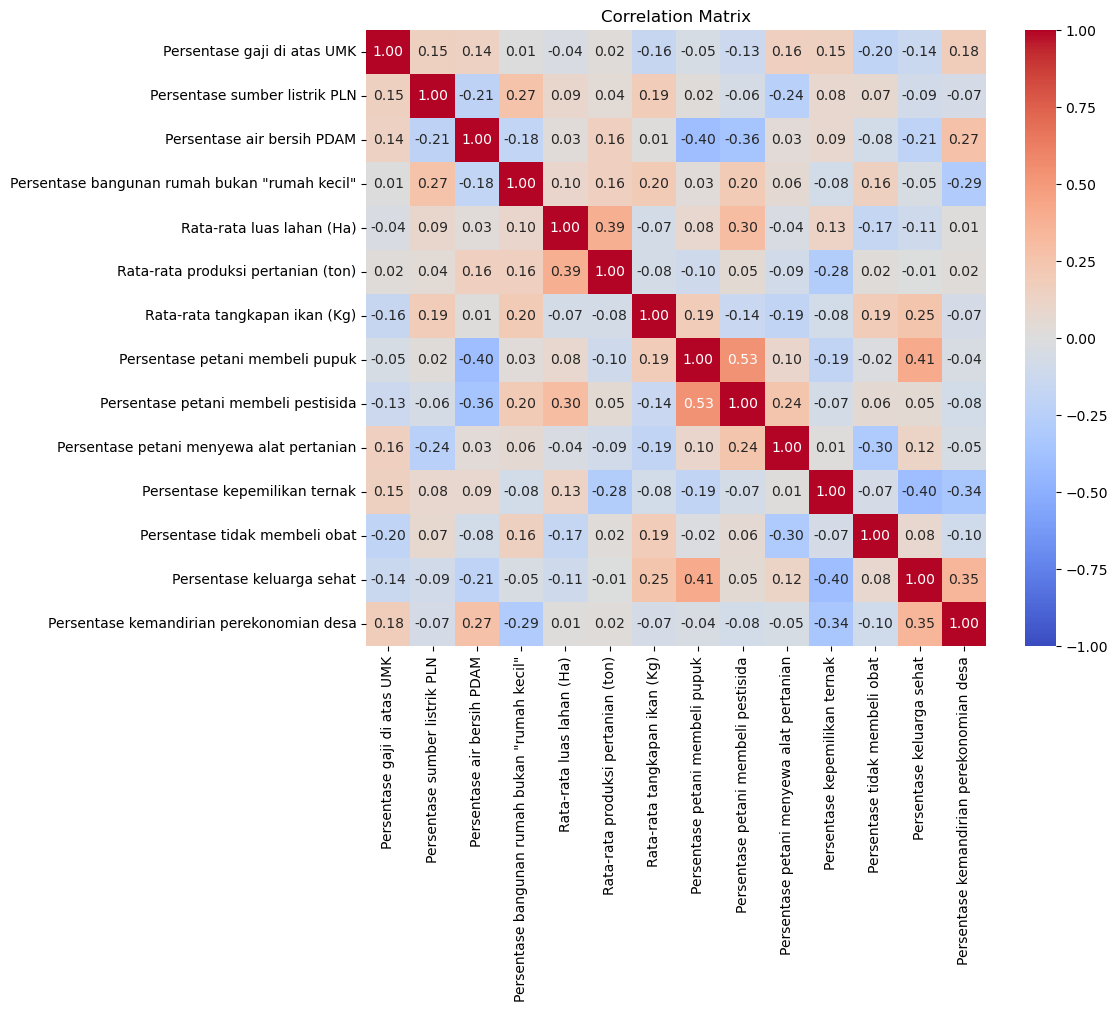

In [14]:
plt.figure(figsize=(10,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

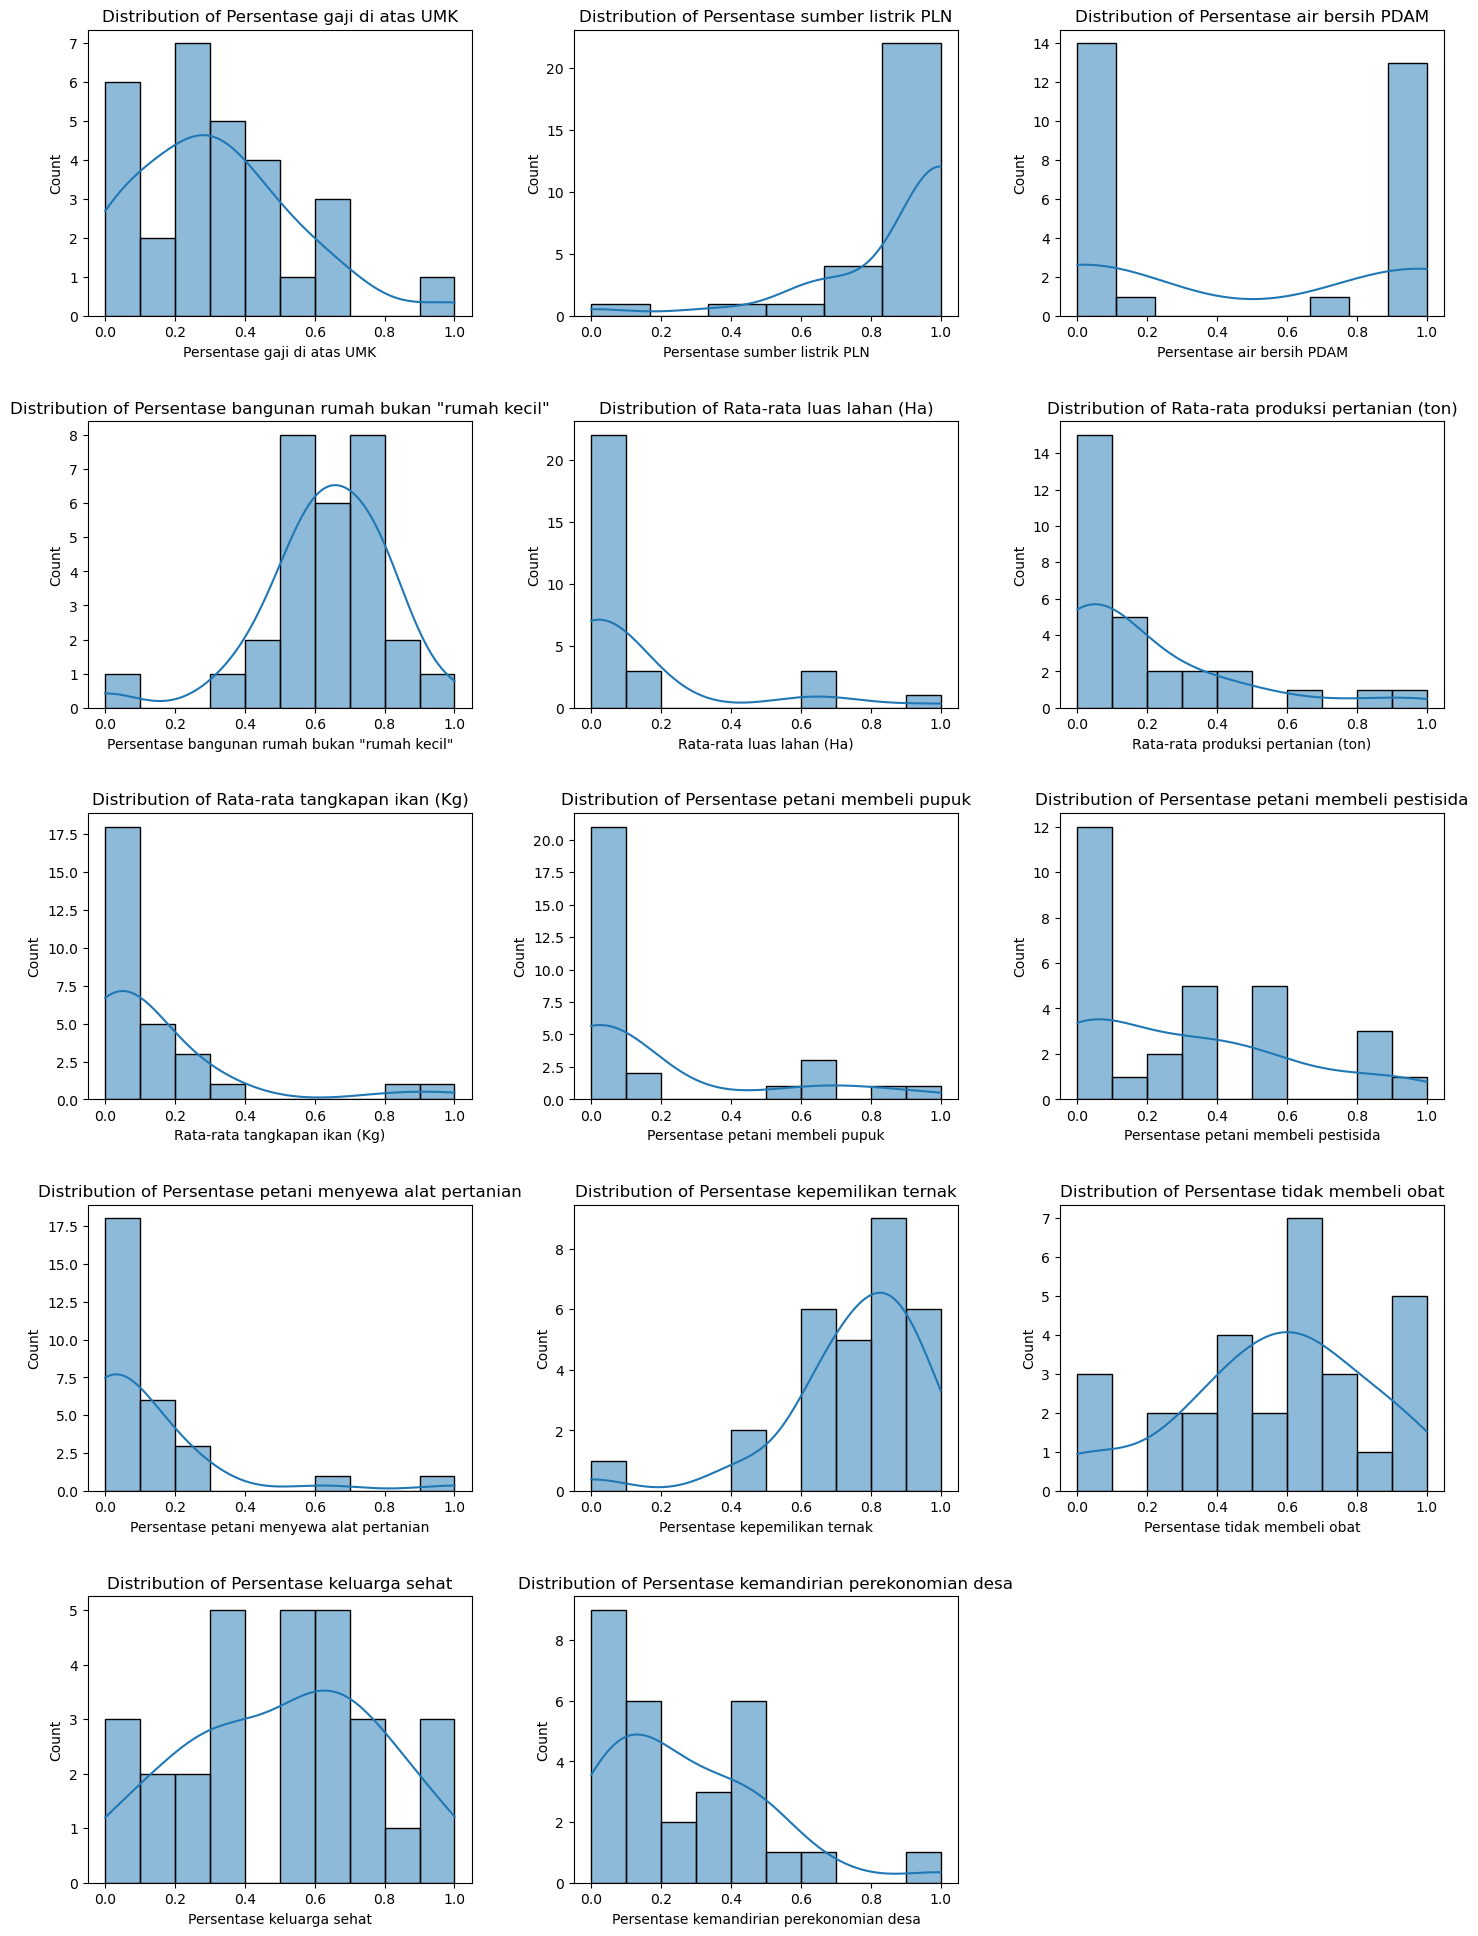

In [15]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_normalized[col], kde=True, bins=min(10, df_normalized[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

In [16]:
df_normalized.to_csv("df_normalized.csv", index=False)

# pembangunan model clustering

## clustering data asli

In [17]:
df_plot = df.copy()

In [18]:
df_num_normalized = df_normalized.select_dtypes(include=['number']).copy()

### k means

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

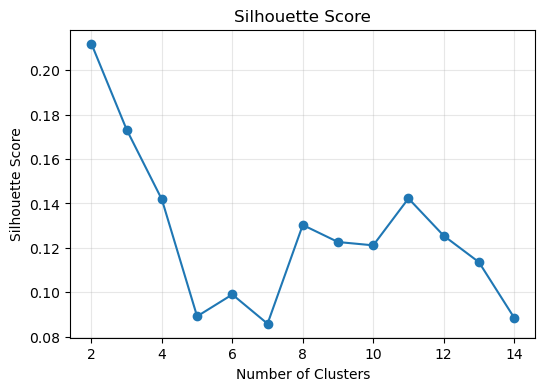

In [19]:
silhouette_scores = []
for k in range(2, 15):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_num_normalized)
    silhouette_scores.append(silhouette_score(df_num_normalized, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=.3)
plt.show()

In [20]:
# melatih model

model_kmeans_orig = KMeans (
    n_clusters=2,
    init='k-means++',
    random_state=42
)
model_kmeans_orig.fit(df_num_normalized)
kmeans_labels_original = model_kmeans_orig.labels_
silhouette_score(df_num_normalized, kmeans_labels_original)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.21191649818160563

In [22]:
df_plot = df_plot.loc[df_num_normalized.index]
df_plot["KM_Cluster"] = pd.Categorical(kmeans_labels_original, categories=[0,1])

In [23]:
df_plot

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

In [24]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_num_normalized)

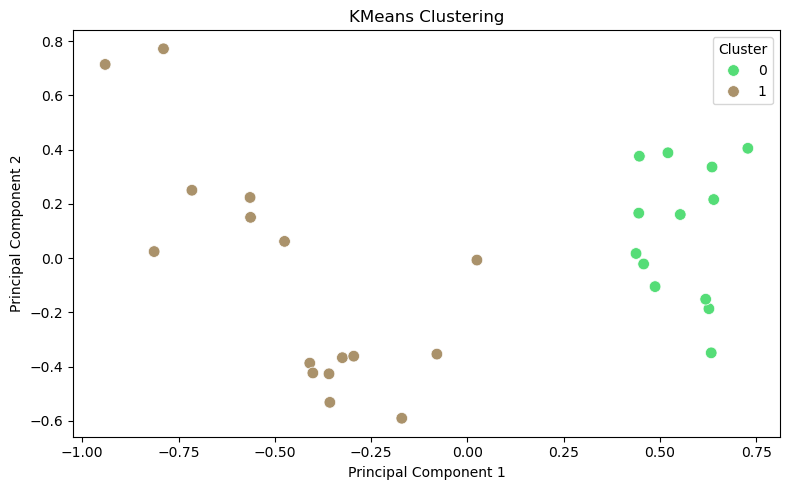

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["KM_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### hierarchical clustering

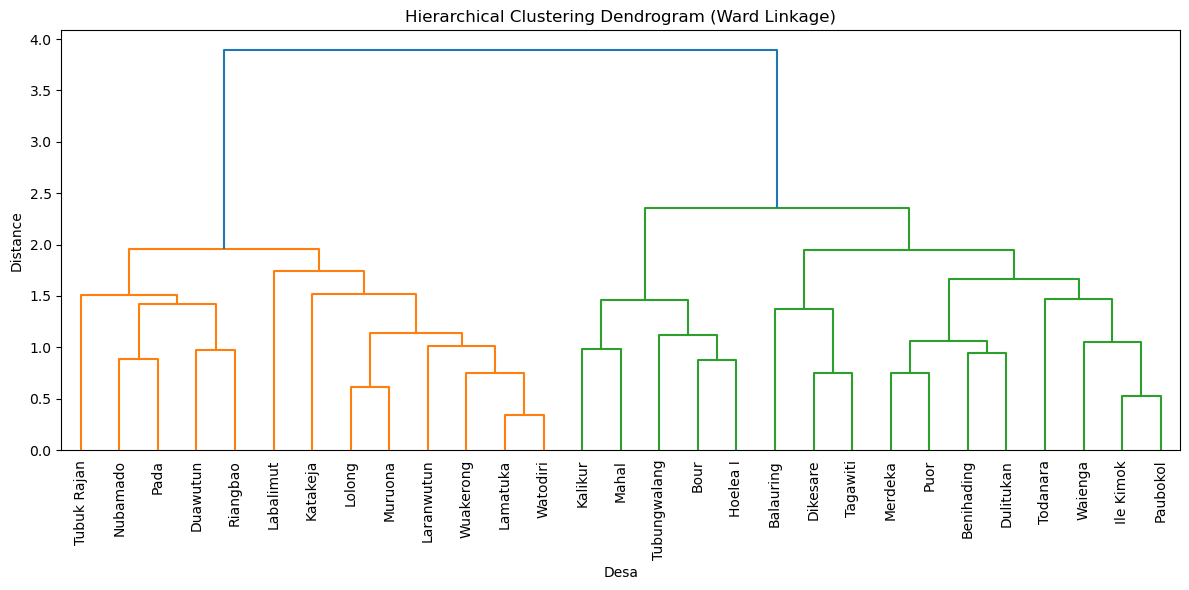

In [27]:
desa = df["Desa"]

# linkage: 'ward' cocok untuk data numerik
Z_orig = linkage(df_num_normalized, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z_orig, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [28]:
hc_labels_original = fcluster(Z_orig, 2, criterion="maxclust")
df_plot["HC_Cluster"] = pd.Categorical(hc_labels_original)

In [29]:
df_plot

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

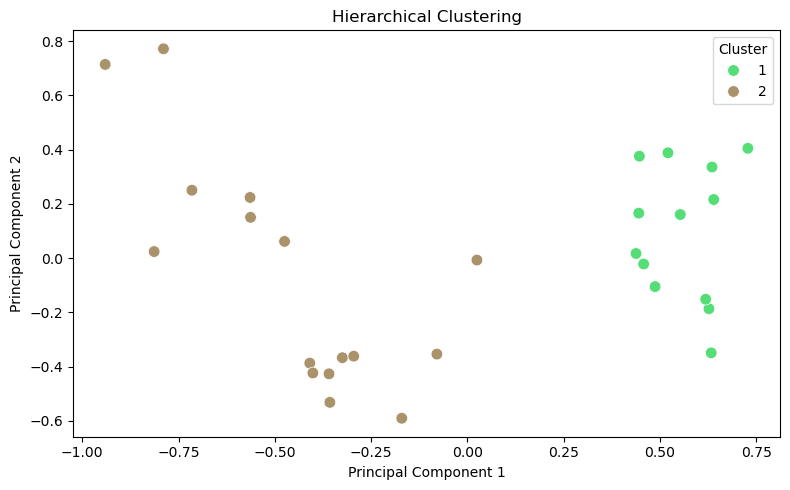

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["HC_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### dbscan

#### min samples = 2

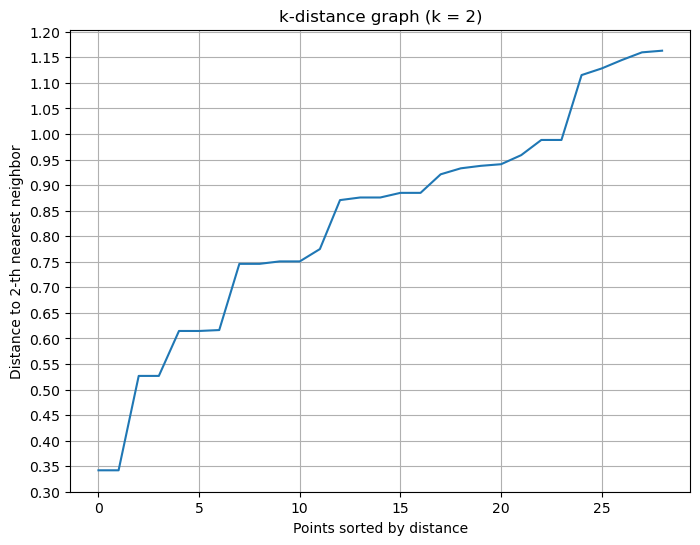

In [29]:
k = 2  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_num_normalized)
distances, indices = nbrs.kneighbors(df_num_normalized)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.30
y_max = 1.20
plt.yticks(np.arange(round(y_min, 2), y_max + 0.05, 0.05))

plt.show()

In [30]:
eps_values = np.arange(0.3, 1.01, 0.05)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=2).fit(df_num_normalized)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.30 → [-1]
eps = 0.35 → [-1  0]
eps = 0.40 → [-1  0]
eps = 0.45 → [-1  0]
eps = 0.50 → [-1  0]
eps = 0.55 → [-1  0  1]
eps = 0.60 → [-1  0  1]
eps = 0.65 → [-1  0  1  2]
eps = 0.70 → [-1  0  1  2]
eps = 0.75 → [-1  0  1  2]
eps = 0.80 → [-1  0  1]
eps = 0.85 → [-1  0  1]
eps = 0.90 → [-1  0  1  2  3]
eps = 0.95 → [-1  0  1  2  3]
eps = 1.00 → [-1  0  1  2]


In [31]:
db_orig_2 = DBSCAN(eps=0.80, min_samples=2).fit(df_num_normalized)
dbscan_labels_original_2 = db_orig_2.labels_

In [32]:
df_plot['DB_Cluster_minsample_2'] = dbscan_labels_original_2

In [33]:
df_plot

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

In [34]:
df_plot['DB_Cluster_minsample_2'].value_counts()

DB_Cluster_minsample_2
-1    17
 0     7
 1     5
Name: count, dtype: int64

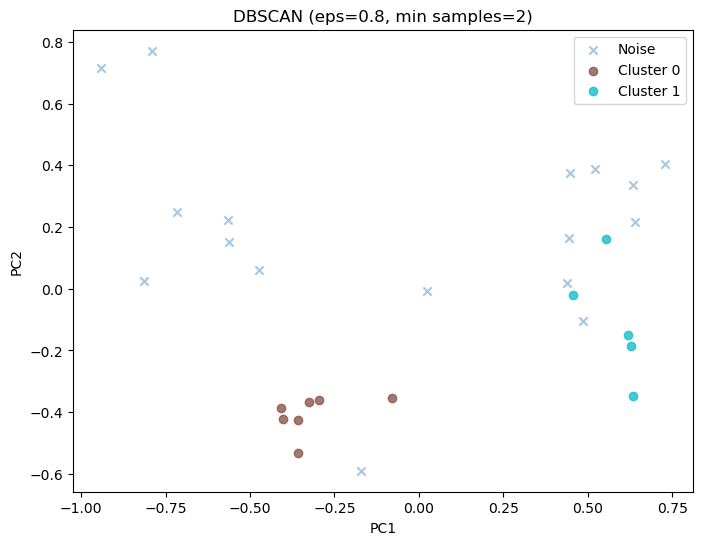

In [35]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.80
min_samples=2
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_num_normalized)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

#### min samples = 3

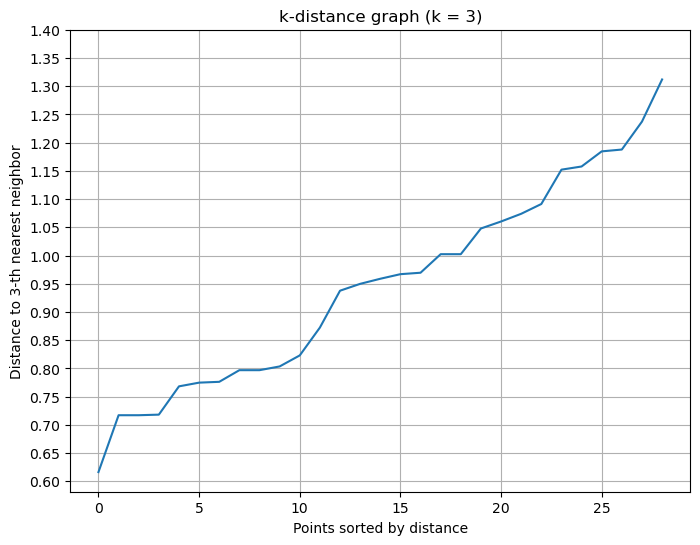

In [36]:
k = 3  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_num_normalized)
distances, indices = nbrs.kneighbors(df_num_normalized)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.60
y_max = 1.40
plt.yticks(np.arange(round(y_min, 2), y_max + 0.05, 0.05))

plt.show()

In [37]:
eps_values = np.arange(0.6, 1.3, 0.05)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(df_num_normalized)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.60 → [-1]
eps = 0.65 → [-1  0]
eps = 0.70 → [-1  0]
eps = 0.75 → [-1  0]
eps = 0.80 → [-1  0  1]
eps = 0.85 → [-1  0  1]
eps = 0.90 → [-1  0  1]
eps = 0.95 → [-1  0  1  2]
eps = 1.00 → [-1  0]
eps = 1.05 → [-1  0]
eps = 1.10 → [-1  0]
eps = 1.15 → [-1  0]
eps = 1.20 → [0]
eps = 1.25 → [0]


In [38]:
db_orig_3 = DBSCAN(eps=0.80, min_samples=3).fit(df_num_normalized)

In [39]:
dbscan_labels_original_3 = db_orig_3.labels_

In [40]:
df_plot['DB_Cluster_minsample_3'] = dbscan_labels_original_3

In [41]:
df_plot

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

In [42]:
df_plot['DB_Cluster_minsample_3'].value_counts()

DB_Cluster_minsample_3
-1    17
 0     7
 1     5
Name: count, dtype: int64

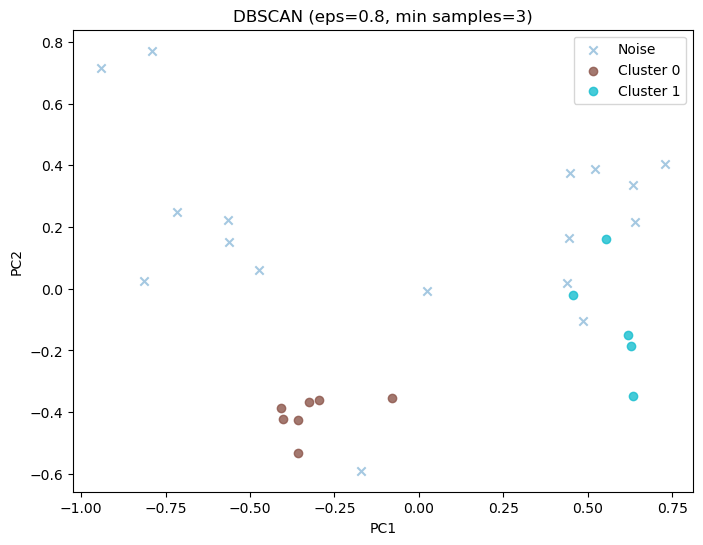

In [43]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.80
min_samples=3
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_num_normalized)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

### df_plot

In [45]:
df_plot_hasil = df_plot[['Desa', 'KM_Cluster', 'HC_Cluster', 'DB_Cluster_minsample_2', 'DB_Cluster_minsample_3']].copy()

In [46]:
df_plot_hasil

Desa KM_Cluster HC_Cluster  DB_Cluster_minsample_2  \
0      Balauring          1          2                      -1   
1     Benihading          1          2                      -1   
2           Bour          1          2                      -1   
3       Dikesare          1          2                       0   
4       Duawutun          0          1                      -1   
5      Dulitukan          1          2                       0   
6       Hoelea I          1          2                      -1   
7      Ile Kimok          1          2                       0   
8        Kalikur          1          2                      -1   
9       Katakeja          0          1                      -1   
10     Labalimut          0          1                      -1   
11      Lamatuka          0          1                       1   
12    Laranwutun          0          1                      -1   
13        Lolong          0          1                       1   
14         Mahal          1          2                      -1   
15       Merdeka          1          2                       0   
16       Muruona          0          1                       1   
17      Nubamado          0          1                      -1   
18          Pada          0          1                      -1   
19      Paubokol          1          2                       0   
20          Puor          1          2                       0   
21      Riangbao          0          1                      -1   
22      Tagawiti          1          2                       0   
23      Todanara          1          2                      -1   
24   Tubuk Rajan          0          1                      -1   
25  Tubungwalang          1          2                      -1   
26       Waienga          1          2                      -1   
27      Watodiri          0          1                       1   
28     Wuakerong          0          1                       1   

    DB_Cluster_minsample_3  
0                       -1  
1                       -1  
2                       -1  
3                        0  
4                       -1  
5                        0  
6                       -1  
7                        0  
8                       -1  
9                       -1  
10                      -1  
11                       1  
12                      -1  
13                       1  
14                      -1  
15                       0  
16                       1  
17                      -1  
18                      -1  
19                       0  
20                       0  
21                      -1  
22                       0  
23                      -1  
24                      -1  
25                      -1  
26                      -1  
27                       1  
28                       1

In [47]:
df_all = pd.read_csv("data_rumah_tangga_all.csv")

In [48]:
df_kecamatan = df_all[["Desa/Kelurahan", "Kecamatan"]].copy()

In [49]:
df_kecamatan.rename(columns={'Desa/Kelurahan': 'Desa'}, inplace=True)

In [50]:
df_kecamatan

Desa      Kecamatan
0       Lolong     Nagawutung
1     Paubokol      Nubatukan
2     Paubokol      Nubatukan
3     Paubokol      Nubatukan
4     Paubokol      Nubatukan
..         ...            ...
876   Todanara  Ile Ape Timur
877   Todanara  Ile Ape Timur
878   Todanara  Ile Ape Timur
879  Labalimut     Nagawutung
880   Todanara  Ile Ape Timur

[881 rows x 2 columns]

In [51]:
df_kecamatan.duplicated().sum()

847

In [52]:
df_kecamatan = df_kecamatan.drop_duplicates()

In [53]:
df_kecamatan.duplicated().sum()

0

In [54]:
df_kecamatan

Desa      Kecamatan
0          Lolong     Nagawutung
1        Paubokol      Nubatukan
17       Duawutun     Nagawutung
21      Balauring        Omesuri
27      Labalimut    Naga Wutung
28      Labalimut     Nagawutung
33       Nubamado      Nubatukan
72           Pada      Nubatukan
85       Dikesare      Lebatukan
86    Tubuk Rajan         Atadei
87   Tubungwalang       Buyasuri
88     Benihading       Buyasuri
89       Todanara  Ile Ape Timur
94           Bour      Nubatukan
102         Mahal        Omesuri
108      Duawutun      Nagawutun
125     Dulitukan        Ile Ape
129      Riangbao        Ile Ape
157       Muruona        Ile Ape
175       Kalikur       Buyasuri
197       Merdeka      Lebatukan
221          Puor      Wulandoni
258      Hoelea I        Omesuri
261      Lamatuka      Lebatukan
341          PADA      Nubatukan
424     Ile Kimok         Atadei
445     Wuakerong    Naga Wutung
467      Watodiri        Ile Ape
479    Laranwutun        Ile Ape
531      Tagawiti        Ile Ape
569       Waienga      Lebatukan
629      Katakeja         Atadei
742     Ile Kimok        Ile Ape
849       Muruona         IleApe

In [55]:
df_plot_hasil = df_plot_hasil.merge(
    df_kecamatan[['Desa','Kecamatan']],
    on='Desa', how='left'
)

In [56]:
df_plot_hasil

Desa KM_Cluster HC_Cluster  DB_Cluster_minsample_2  \
0      Balauring          1          2                      -1   
1     Benihading          1          2                      -1   
2           Bour          1          2                      -1   
3       Dikesare          1          2                       0   
4       Duawutun          0          1                      -1   
5       Duawutun          0          1                      -1   
6      Dulitukan          1          2                       0   
7       Hoelea I          1          2                      -1   
8      Ile Kimok          1          2                       0   
9      Ile Kimok          1          2                       0   
10       Kalikur          1          2                      -1   
11      Katakeja          0          1                      -1   
12     Labalimut          0          1                      -1   
13     Labalimut          0          1                      -1   
14      Lamatuka          0          1                       1   
15    Laranwutun          0          1                      -1   
16        Lolong          0          1                       1   
17         Mahal          1          2                      -1   
18       Merdeka          1          2                       0   
19       Muruona          0          1                       1   
20       Muruona          0          1                       1   
21      Nubamado          0          1                      -1   
22          Pada          0          1                      -1   
23      Paubokol          1          2                       0   
24          Puor          1          2                       0   
25      Riangbao          0          1                      -1   
26      Tagawiti          1          2                       0   
27      Todanara          1          2                      -1   
28   Tubuk Rajan          0          1                      -1   
29  Tubungwalang          1          2                      -1   
30       Waienga          1          2                      -1   
31      Watodiri          0          1                       1   
32     Wuakerong          0          1                       1   

    DB_Cluster_minsample_3      Kecamatan  
0                       -1        Omesuri  
1                       -1       Buyasuri  
2                       -1      Nubatukan  
3                        0      Lebatukan  
4                       -1     Nagawutung  
5                       -1      Nagawutun  
6                        0        Ile Ape  
7                       -1        Omesuri  
8                        0         Atadei  
9                        0        Ile Ape  
10                      -1       Buyasuri  
11                      -1         Atadei  
12                      -1    Naga Wutung  
13                      -1     Nagawutung  
14                       1      Lebatukan  
15                      -1        Ile Ape  
16                       1     Nagawutung  
17                      -1        Omesuri  
18                       0      Lebatukan  
19                       1        Ile Ape  
20                       1         IleApe  
21                      -1      Nubatukan  
22                      -1      Nubatukan  
23                       0      Nubatukan  
24                       0      Wulandoni  
25                      -1        Ile Ape  
26                       0        Ile Ape  
27                      -1  Ile Ape Timur  
28                      -1         Atadei  
29                      -1       Buyasuri  
30                      -1      Lebatukan  
31                       1        Ile Ape  
32                       1    Naga Wutung

## PCA first

In [51]:
import pandas as pd

df_pca = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2'],          # nama kolom bebas, tapi ini paling umum
    index=df_normalized.index        # pakai index yang sama dengan df_normalized
)

df_pca

PC1       PC2
0   0.024812 -0.007091
1  -0.170304 -0.589913
2  -0.715259  0.250155
3  -0.357042 -0.531366
4   0.487426 -0.104915
5  -0.079153 -0.353570
6  -0.813377  0.024251
7  -0.409182 -0.386813
8  -0.940518  0.713732
9   0.520839  0.388178
10  0.728365  0.404756
11  0.627272 -0.186243
12  0.446634  0.375606
13  0.633184 -0.348989
14 -0.789092  0.771301
15 -0.324653 -0.366784
16  0.457724 -0.021578
17  0.635319  0.335742
18  0.437986  0.017112
19 -0.401207 -0.423017
20 -0.359259 -0.426203
21  0.445076  0.165803
22 -0.295070 -0.361171
23 -0.474702  0.061724
24  0.639760  0.215926
25 -0.564278  0.223596
26 -0.562975  0.150319
27  0.618866 -0.151278
28  0.552809  0.160730

### kmeans

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

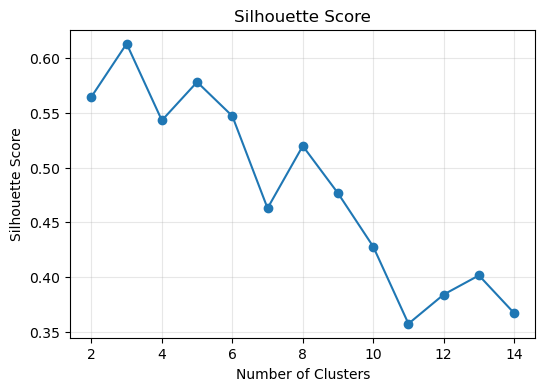

In [52]:
silhouette_scores = []
for k in range(2, 15):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=.3)
plt.show()

In [53]:
# melatih model

model_kmeans_pca = KMeans (
    n_clusters=3,
    init='k-means++',
    random_state=42
)
model_kmeans_pca.fit(df_pca)
kmeans_labels_pca = model_kmeans_pca.labels_
silhouette_score(df_pca, kmeans_labels_pca)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6129015133404917

In [54]:
df_pca_coba = df.copy()

In [57]:
df_pca_coba = df_pca_coba.loc[df_pca.index]
df_pca_coba["KM_Cluster"] = pd.Categorical(kmeans_labels_pca, categories=[0,1,2])

In [58]:
df_pca_coba

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

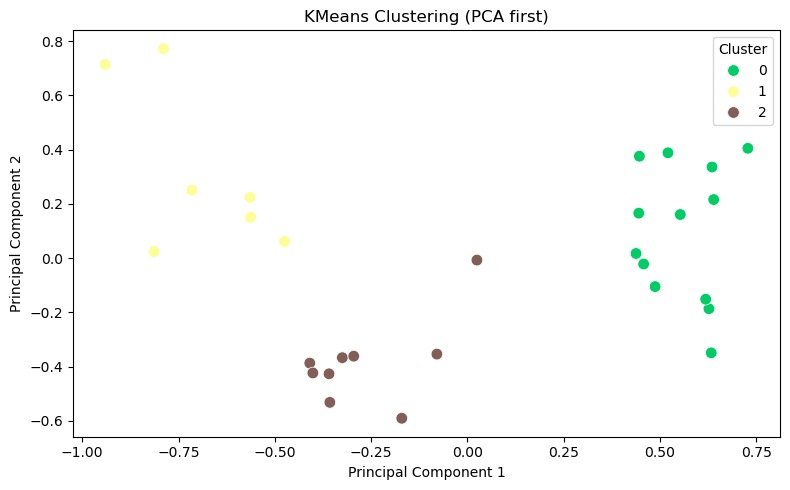

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca_coba["KM_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering (PCA first)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### Hierarchical Clustering

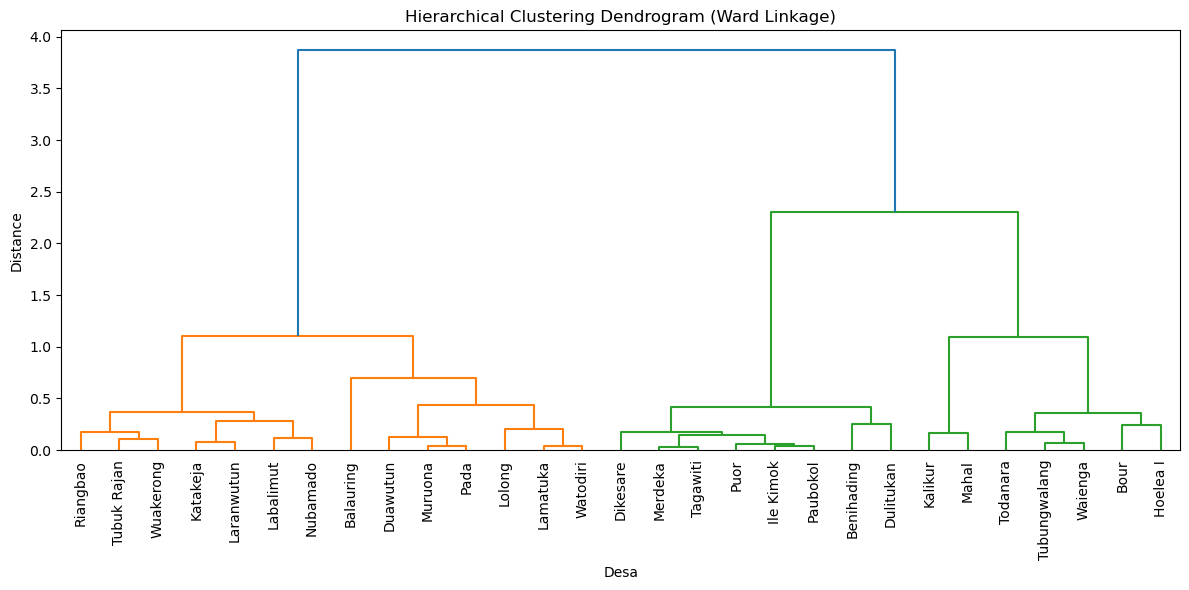

In [61]:
# linkage: 'ward' cocok untuk data numerik
Z_pca = linkage(df_pca, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z_pca, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [63]:
hc_labels_pca = fcluster(Z_pca, 2, criterion="maxclust")
df_pca_coba["HC_Cluster"] = pd.Categorical(hc_labels_pca)

In [64]:
df_pca_coba

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

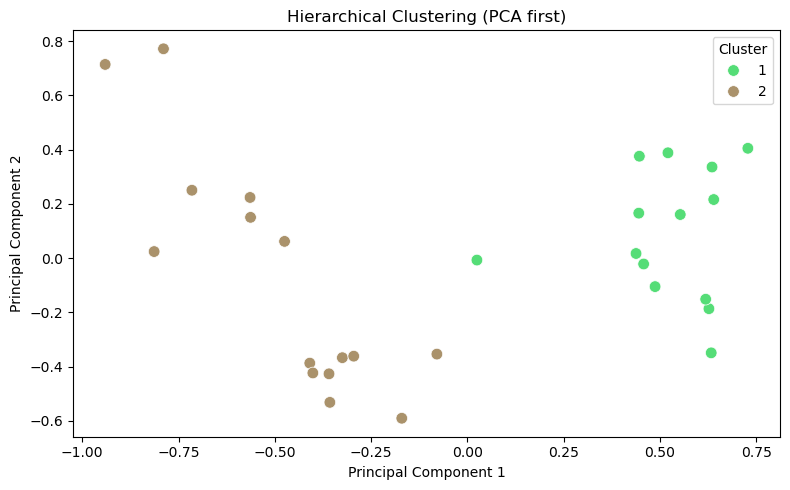

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca_coba["HC_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('Hierarchical Clustering (PCA first)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### dbscan

#### min samples = 2

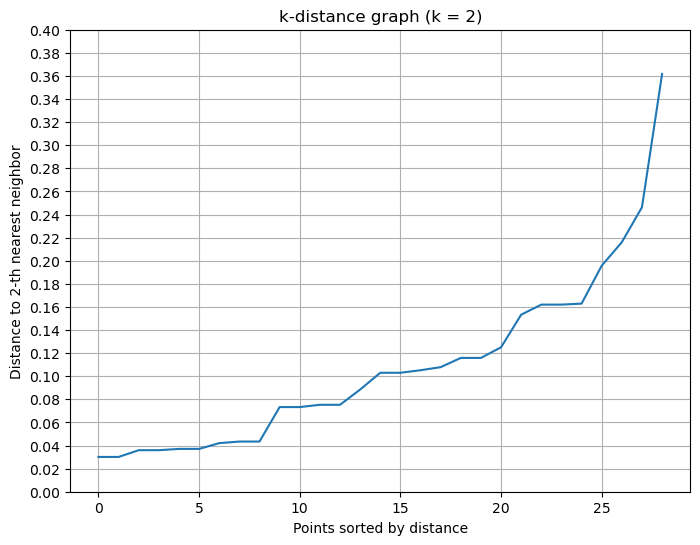

In [68]:
k = 2  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.00
y_max = 0.40
plt.yticks(np.arange(round(y_min, 2), y_max + 0.02, 0.02))

plt.show()

In [69]:
eps_values = np.arange(0.1, 0.4, 0.02)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=2).fit(df_pca)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.10 → [-1  0  1  2  3  4]
eps = 0.12 → [-1  0  1  2  3  4  5]
eps = 0.14 → [-1  0  1  2  3]
eps = 0.16 → [-1  0  1  2]
eps = 0.18 → [-1  0  1  2  3]
eps = 0.20 → [-1  0  1  2  3]
eps = 0.22 → [-1  0  1  2  3]
eps = 0.24 → [-1  0  1  2  3]
eps = 0.26 → [-1  0  1  2  3]
eps = 0.28 → [-1  0  1  2  3]
eps = 0.30 → [-1  0  1  2  3]
eps = 0.32 → [-1  0  1  2  3]
eps = 0.34 → [-1  0  1  2  3]
eps = 0.36 → [-1  0  1  2  3]
eps = 0.38 → [0 1 2 3]
eps = 0.40 → [0 1 2 3]


In [70]:
db_pca_2 = DBSCAN(eps=0.16, min_samples=2).fit(df_pca)

In [71]:
dbscan_labels_pca_2 = db_pca_2.labels_

In [72]:
df_pca_coba['DB_Cluster_minsample_2'] = dbscan_labels_pca_2

In [73]:
df_pca_coba

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

In [74]:
df_pca_coba['DB_Cluster_minsample_2'].value_counts()

DB_Cluster_minsample_2
 2    12
-1     7
 1     6
 0     4
Name: count, dtype: int64

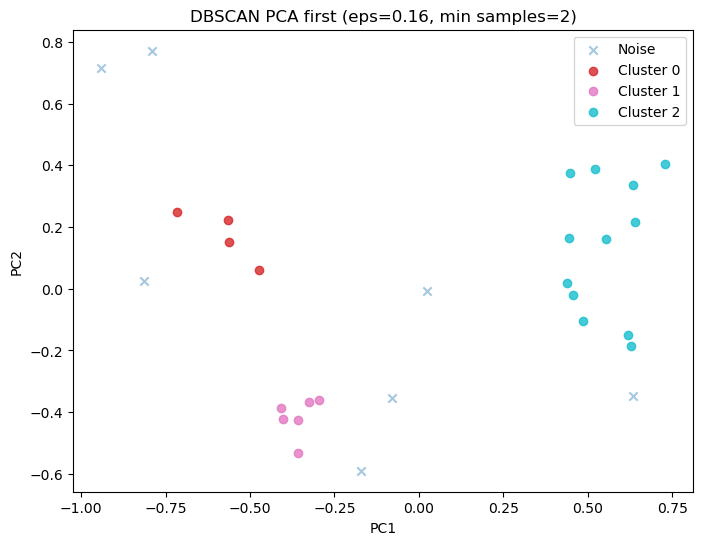

In [75]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.16
min_samples=2
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN PCA first (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

#### min samples = 3

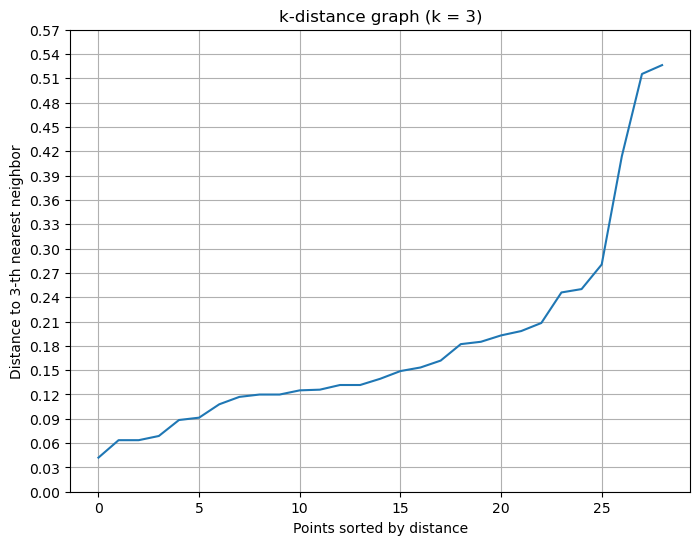

In [76]:
k = 3  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.00
y_max = 0.55
plt.yticks(np.arange(round(y_min, 2), y_max + 0.03, 0.03))

plt.show()

In [77]:
eps_values = np.arange(0.06, 0.6, 0.03)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(df_pca)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.06 → [-1  0]
eps = 0.09 → [-1  0  1]
eps = 0.12 → [-1  0  1  2]
eps = 0.15 → [-1  0  1  2]
eps = 0.18 → [-1  0  1  2]
eps = 0.21 → [-1  0  1  2]
eps = 0.24 → [-1  0  1  2]
eps = 0.27 → [-1  0  1  2]
eps = 0.30 → [-1  0  1  2]
eps = 0.33 → [-1  0  1  2]
eps = 0.36 → [-1  0  1  2]
eps = 0.39 → [-1  0  1  2]
eps = 0.42 → [-1  0  1]
eps = 0.45 → [-1  0  1]
eps = 0.48 → [-1  0]
eps = 0.51 → [-1  0]
eps = 0.54 → [0]
eps = 0.57 → [0]
eps = 0.60 → [0]


In [78]:
db_pca_3 = DBSCAN(eps=0.21, min_samples=3).fit(df_pca)

In [79]:
dbscan_labels_pca_3 = db_pca_3.labels_

In [80]:
df_pca_coba['DB_Cluster_minsample_3'] = dbscan_labels_pca_3

In [81]:
df_pca_coba

Desa  Persentase gaji di atas UMK  Persentase sumber listrik PLN  \
0      Balauring                    20.000000                     100.000000   
1     Benihading                    66.666667                     100.000000   
2           Bour                    21.428571                      96.428571   
3       Dikesare                     6.666667                     100.000000   
4       Duawutun                    20.000000                     100.000000   
5      Dulitukan                    23.333333                     100.000000   
6       Hoelea I                    16.666667                     100.000000   
7      Ile Kimok                    20.000000                     100.000000   
8        Kalikur                    46.666667                     100.000000   
9       Katakeja                    32.258065                      96.774194   
10     Labalimut                    36.666667                     100.000000   
11      Lamatuka                    32.258065                     100.000000   
12    Laranwutun                    30.000000                     100.000000   
13        Lolong                    10.000000                     100.000000   
14         Mahal                    10.000000                     100.000000   
15       Merdeka                    43.333333                     100.000000   
16       Muruona                     7.317073                     100.000000   
17      Nubamado                    16.666667                      90.000000   
18          Pada                    22.580645                      93.548387   
19      Paubokol                     3.333333                     100.000000   
20          Puor                    26.666667                     100.000000   
21      Riangbao                    23.333333                     100.000000   
22      Tagawiti                     3.333333                     100.000000   
23      Todanara                    17.241379                     100.000000   
24   Tubuk Rajan                    26.666667                      96.666667   
25  Tubungwalang                     6.666667                      96.666667   
26       Waienga                     3.333333                      96.666667   
27      Watodiri                    43.333333                     100.000000   
28     Wuakerong                    33.333333                     100.000000   

    Persentase air bersih PDAM  Persentase bangunan rumah bukan "rumah kecil"  \
0                    76.666667                                      80.000000   
1                     0.000000                                      50.000000   
2                     0.000000                                      57.142857   
3                     0.000000                                      66.666667   
4                   100.000000                                      80.000000   
5                    16.666667                                      63.333333   
6                     0.000000                                      70.000000   
7                     0.000000                                      76.666667   
8                     0.000000                                      70.000000   
9                   100.000000                                      70.967742   
10                  100.000000                                      63.333333   
11                  100.000000                                      74.193548   
12                  100.000000                                      80.000000   
13                  100.000000                                      43.333333   
14                    3.333333                                      66.666667   
15                    0.000000                                      83.333333   
16                  100.000000                                      60.975610   
17                  100.000000                                      63.333333   
18                   93.548387                                      64.5

In [82]:
df_pca_coba['DB_Cluster_minsample_3'].value_counts()

DB_Cluster_minsample_3
 2    13
 1     7
-1     5
 0     4
Name: count, dtype: int64

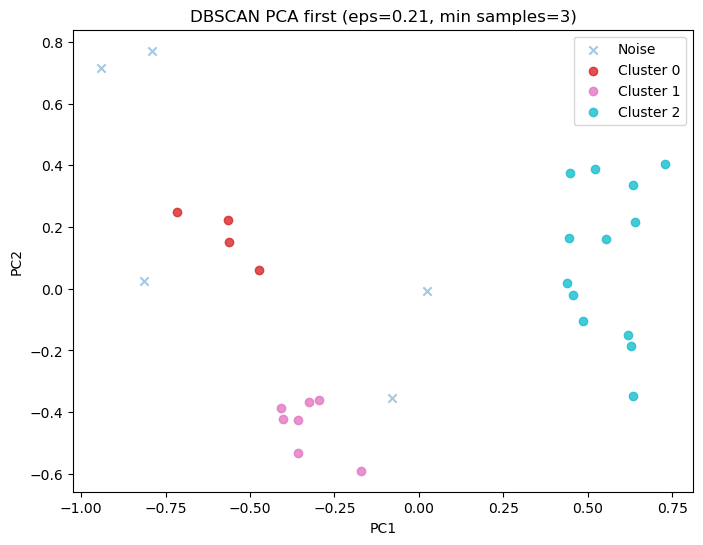

In [83]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.21
min_samples=3
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN PCA first (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

### df_pca_hasil

In [82]:
df_pca_hasil = df_pca_coba[['Desa', 'KM_Cluster', 'HC_Cluster', 'DB_Cluster_minsample_2', 'DB_Cluster_minsample_3']].copy()

In [83]:
df_pca_hasil

Desa KM_Cluster HC_Cluster  DB_Cluster_minsample_2  \
0      Balauring          2          1                      -1   
1     Benihading          2          2                      -1   
2           Bour          1          2                       0   
3       Dikesare          2          2                       1   
4       Duawutun          0          1                       2   
5      Dulitukan          2          2                      -1   
6       Hoelea I          1          2                      -1   
7      Ile Kimok          2          2                       1   
8        Kalikur          1          2                      -1   
9       Katakeja          0          1                       2   
10     Labalimut          0          1                       2   
11      Lamatuka          0          1                       2   
12    Laranwutun          0          1                       2   
13        Lolong          0          1                      -1   
14         Mahal          1          2                      -1   
15       Merdeka          2          2                       1   
16       Muruona          0          1                       2   
17      Nubamado          0          1                       2   
18          Pada          0          1                       2   
19      Paubokol          2          2                       1   
20          Puor          2          2                       1   
21      Riangbao          0          1                       2   
22      Tagawiti          2          2                       1   
23      Todanara          1          2                       0   
24   Tubuk Rajan          0          1                       2   
25  Tubungwalang          1          2                       0   
26       Waienga          1          2                       0   
27      Watodiri          0          1                       2   
28     Wuakerong          0          1                       2   

    DB_Cluster_minsample_3  
0                       -1  
1                        1  
2                        0  
3                        1  
4                        2  
5                       -1  
6                       -1  
7                        1  
8                       -1  
9                        2  
10                       2  
11                       2  
12                       2  
13                       2  
14                      -1  
15                       1  
16                       2  
17                       2  
18                       2  
19                       1  
20                       1  
21                       2  
22                       1  
23                       0  
24                       2  
25                       0  
26                       0  
27                       2  
28                       2

# sillhouette score

In [84]:
def calculate_silhouette_score_dbscan(X, labels):
    valid_indices = labels != -1
    valid_X = X[valid_indices]
    valid_labels = labels[valid_indices]

    unique_clusters = np.unique(valid_labels)
    # Skor siluet hanya dapat dihitung jika ada minimal 2 klaster
    if len(unique_clusters) < 2:
        return f"Tidak Dapat Dihitung ({len(unique_clusters)} Klaster Valid)"
    else:
        score = silhouette_score(valid_X, valid_labels)
        return f"{score:.4f}"

results = []

In [85]:
results.append(["K-Means", "Data Asli", f"{silhouette_score(df_num_normalized, kmeans_labels_original):.4f}"])
results.append(["Hierarchical", "Data Asli", f"{silhouette_score(df_num_normalized, hc_labels_original):.4f}"])
results.append(["DBSCAN", "Data Asli minsample 2", calculate_silhouette_score_dbscan(df_num_normalized, dbscan_labels_original_2)])
results.append(["DBSCAN", "Data Asli minsample 3", calculate_silhouette_score_dbscan(df_num_normalized, dbscan_labels_original_3)])


results.append(["K-Means", "PCA Terlebih Dahulu", f"{silhouette_score(df_pca, kmeans_labels_pca):.4f}"])
results.append(["Hierarchical", "PCA Terlebih Dahulu", f"{silhouette_score(df_pca, hc_labels_pca):.4f}"])
results.append(["DBSCAN", "PCA Terlebih Dahulu minsample 2", calculate_silhouette_score_dbscan(df_pca, dbscan_labels_pca_2)])
results.append(["DBSCAN", "PCA Terlebih Dahulu minsample 3", calculate_silhouette_score_dbscan(df_pca, dbscan_labels_pca_3)])

In [86]:
df_results = pd.DataFrame(results, columns=["Algoritma", "Tipe Data", "Skor Siluet"])

In [88]:
print("\n--- Hasil Perhitungan Silhouette Score ---\n")
print(df_results.to_markdown(index=False, numalign="left", stralign="left"))


--- Hasil Perhitungan Silhouette Score ---

| Algoritma    | Tipe Data                       | Skor Siluet   |
|:-------------|:--------------------------------|:--------------|
| K-Means      | Data Asli                       | 0.2119        |
| Hierarchical | Data Asli                       | 0.2119        |
| DBSCAN       | Data Asli minsample 2           | 0.3242        |
| DBSCAN       | Data Asli minsample 3           | 0.3242        |
| K-Means      | PCA Terlebih Dahulu             | 0.6129        |
| Hierarchical | PCA Terlebih Dahulu             | 0.5631        |
| DBSCAN       | PCA Terlebih Dahulu minsample 2 | 0.75          |
| DBSCAN       | PCA Terlebih Dahulu minsample 3 | 0.7198        |


# analisis sebaran masing-masing cluster

In [84]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## clustering real distance

### Boxplot

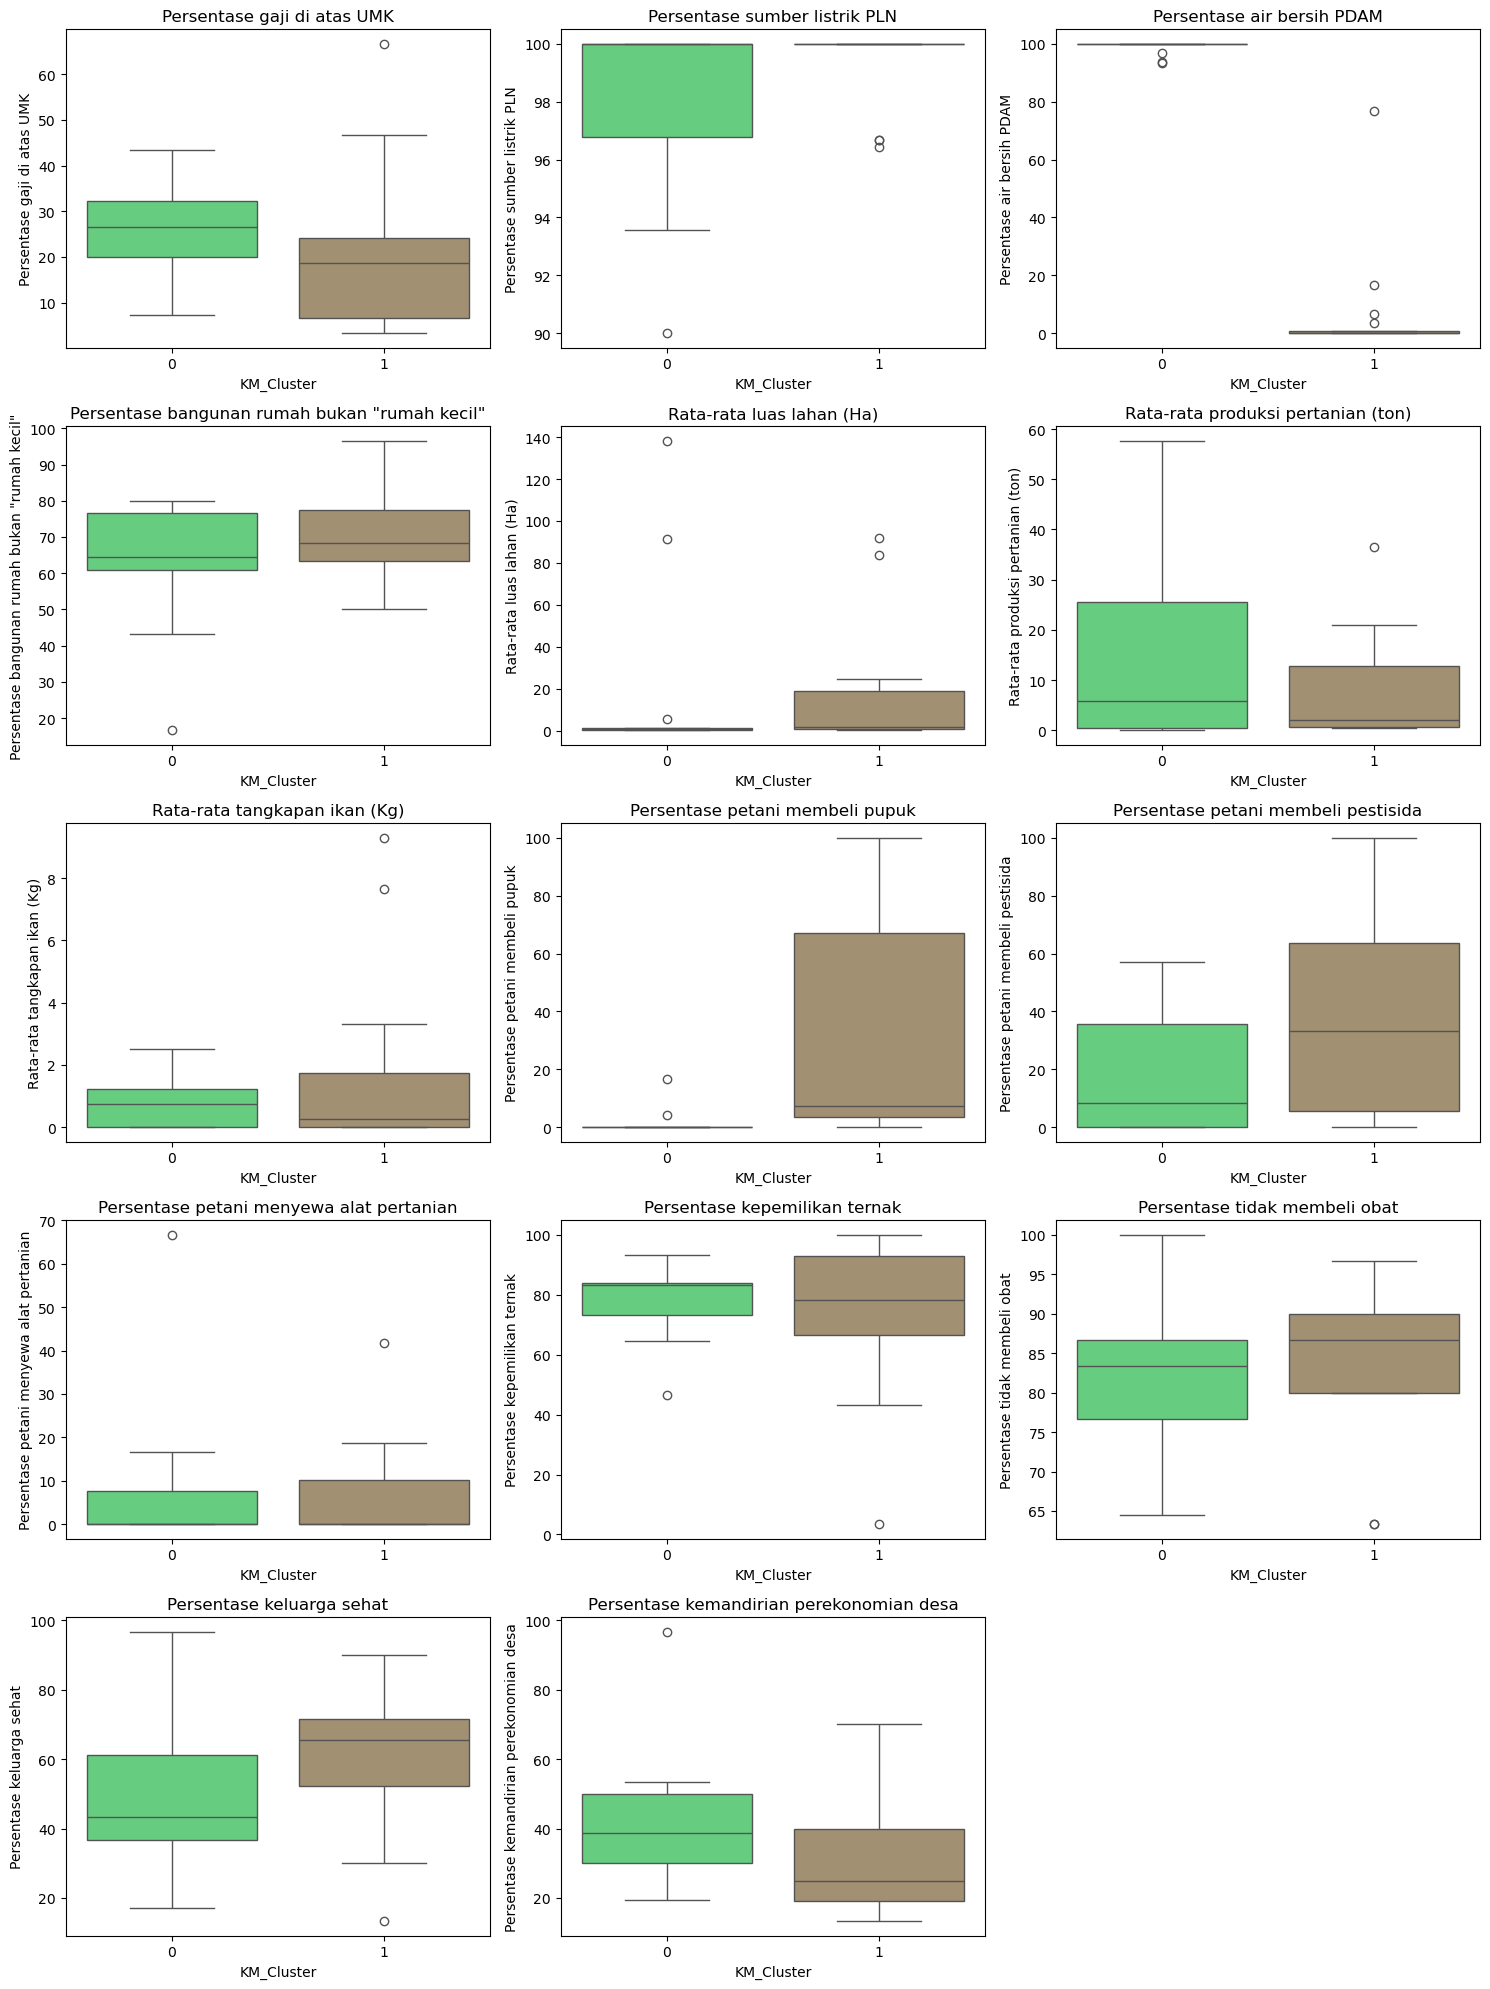

In [85]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="KM_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

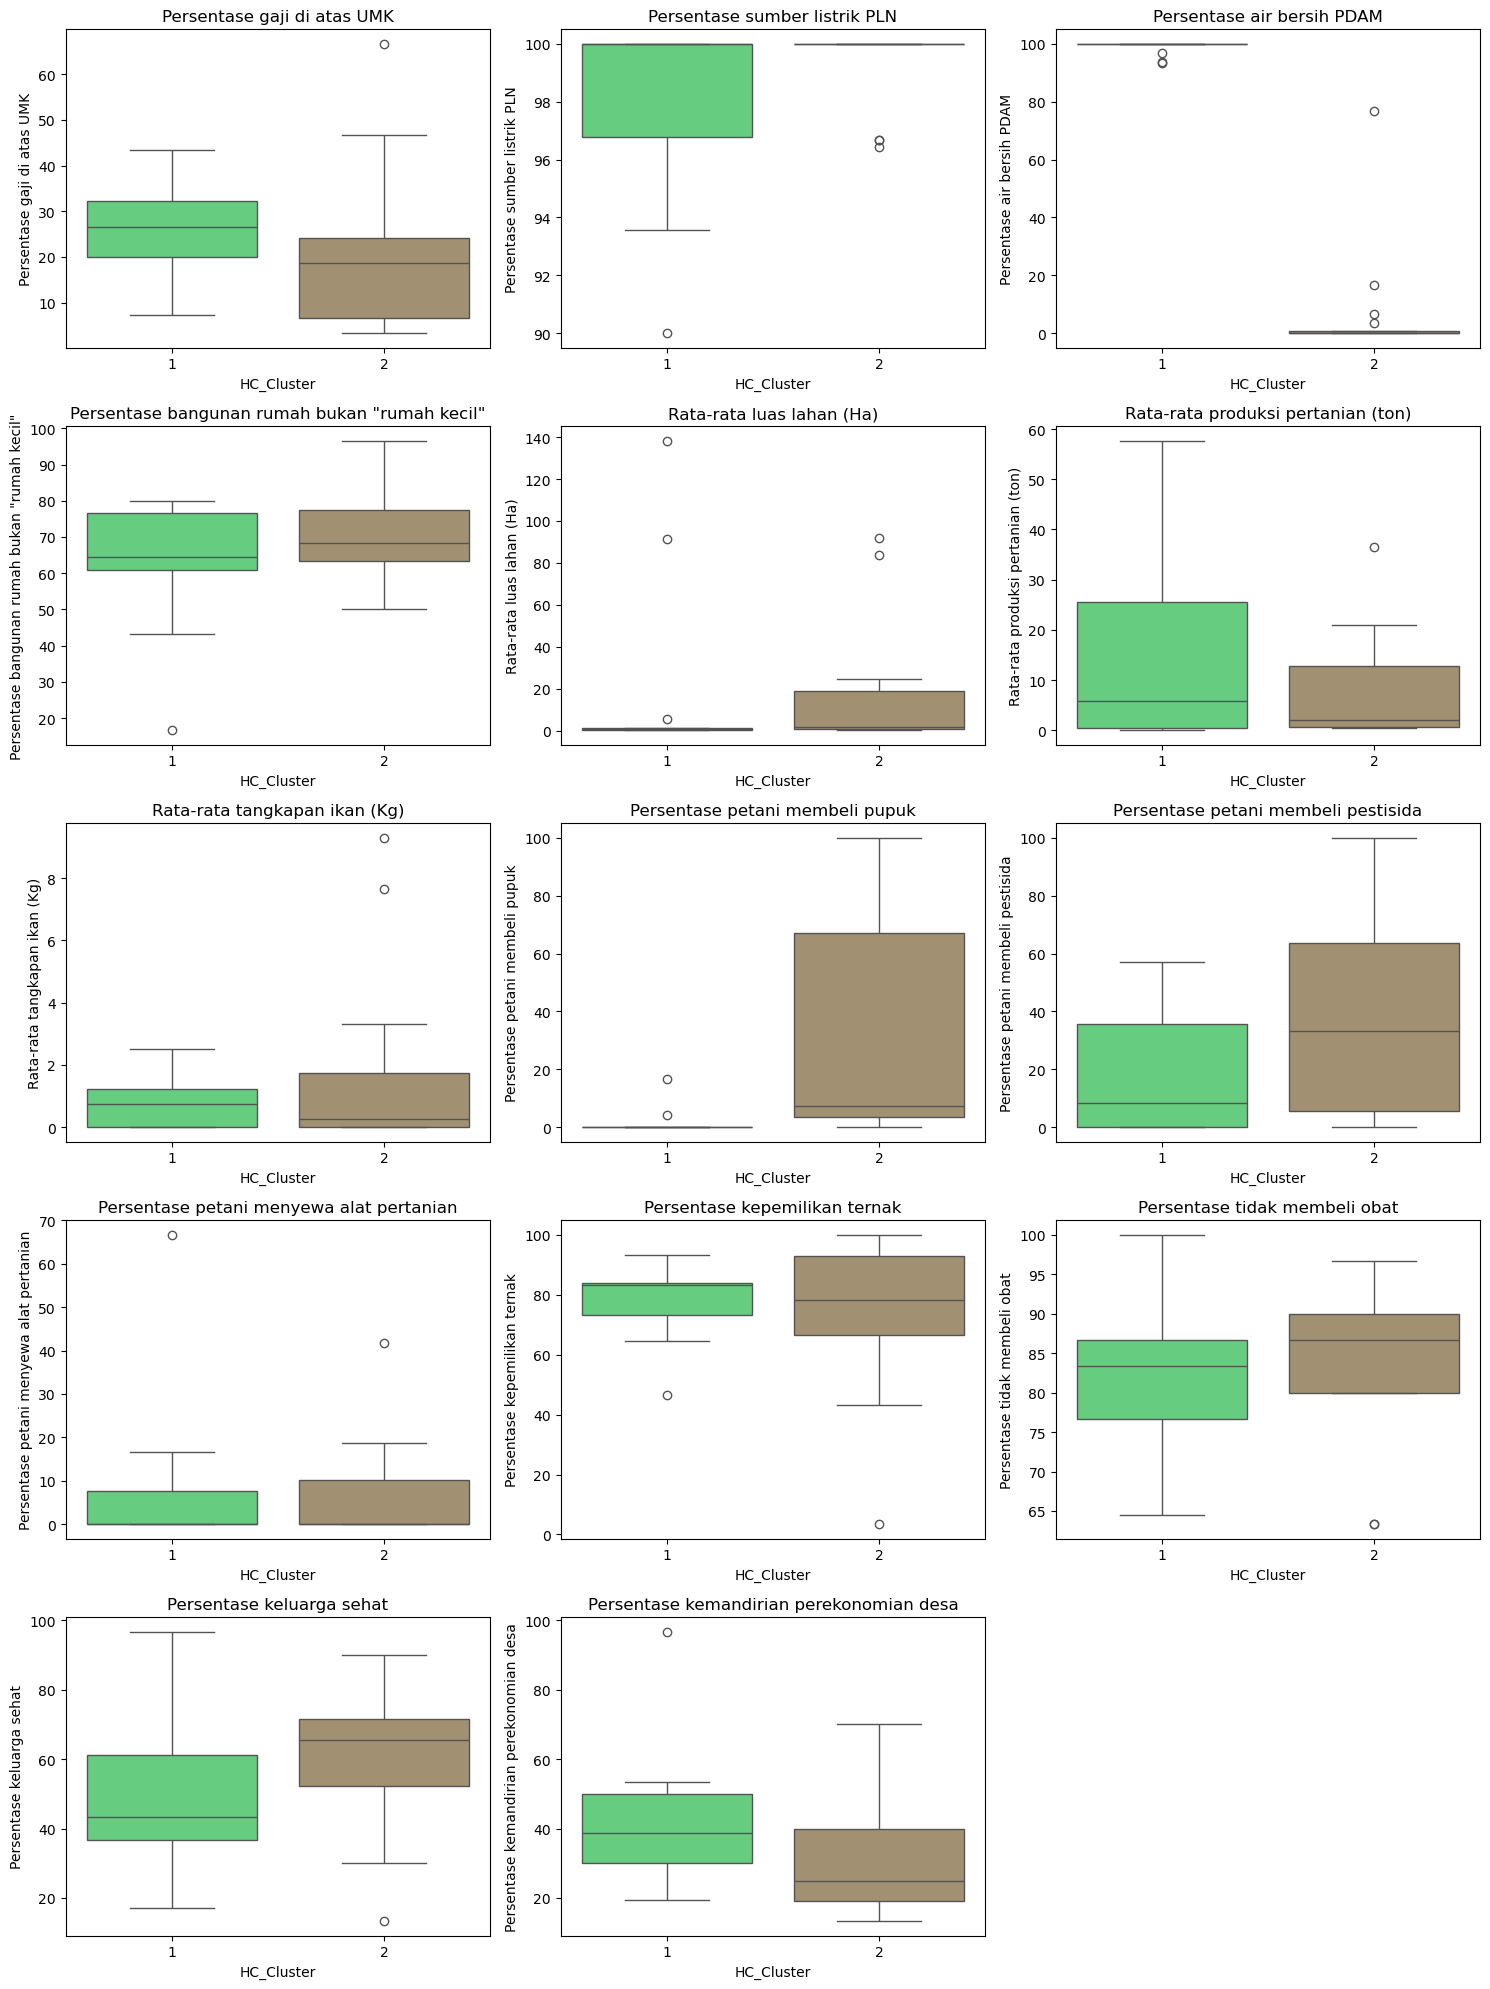

In [86]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

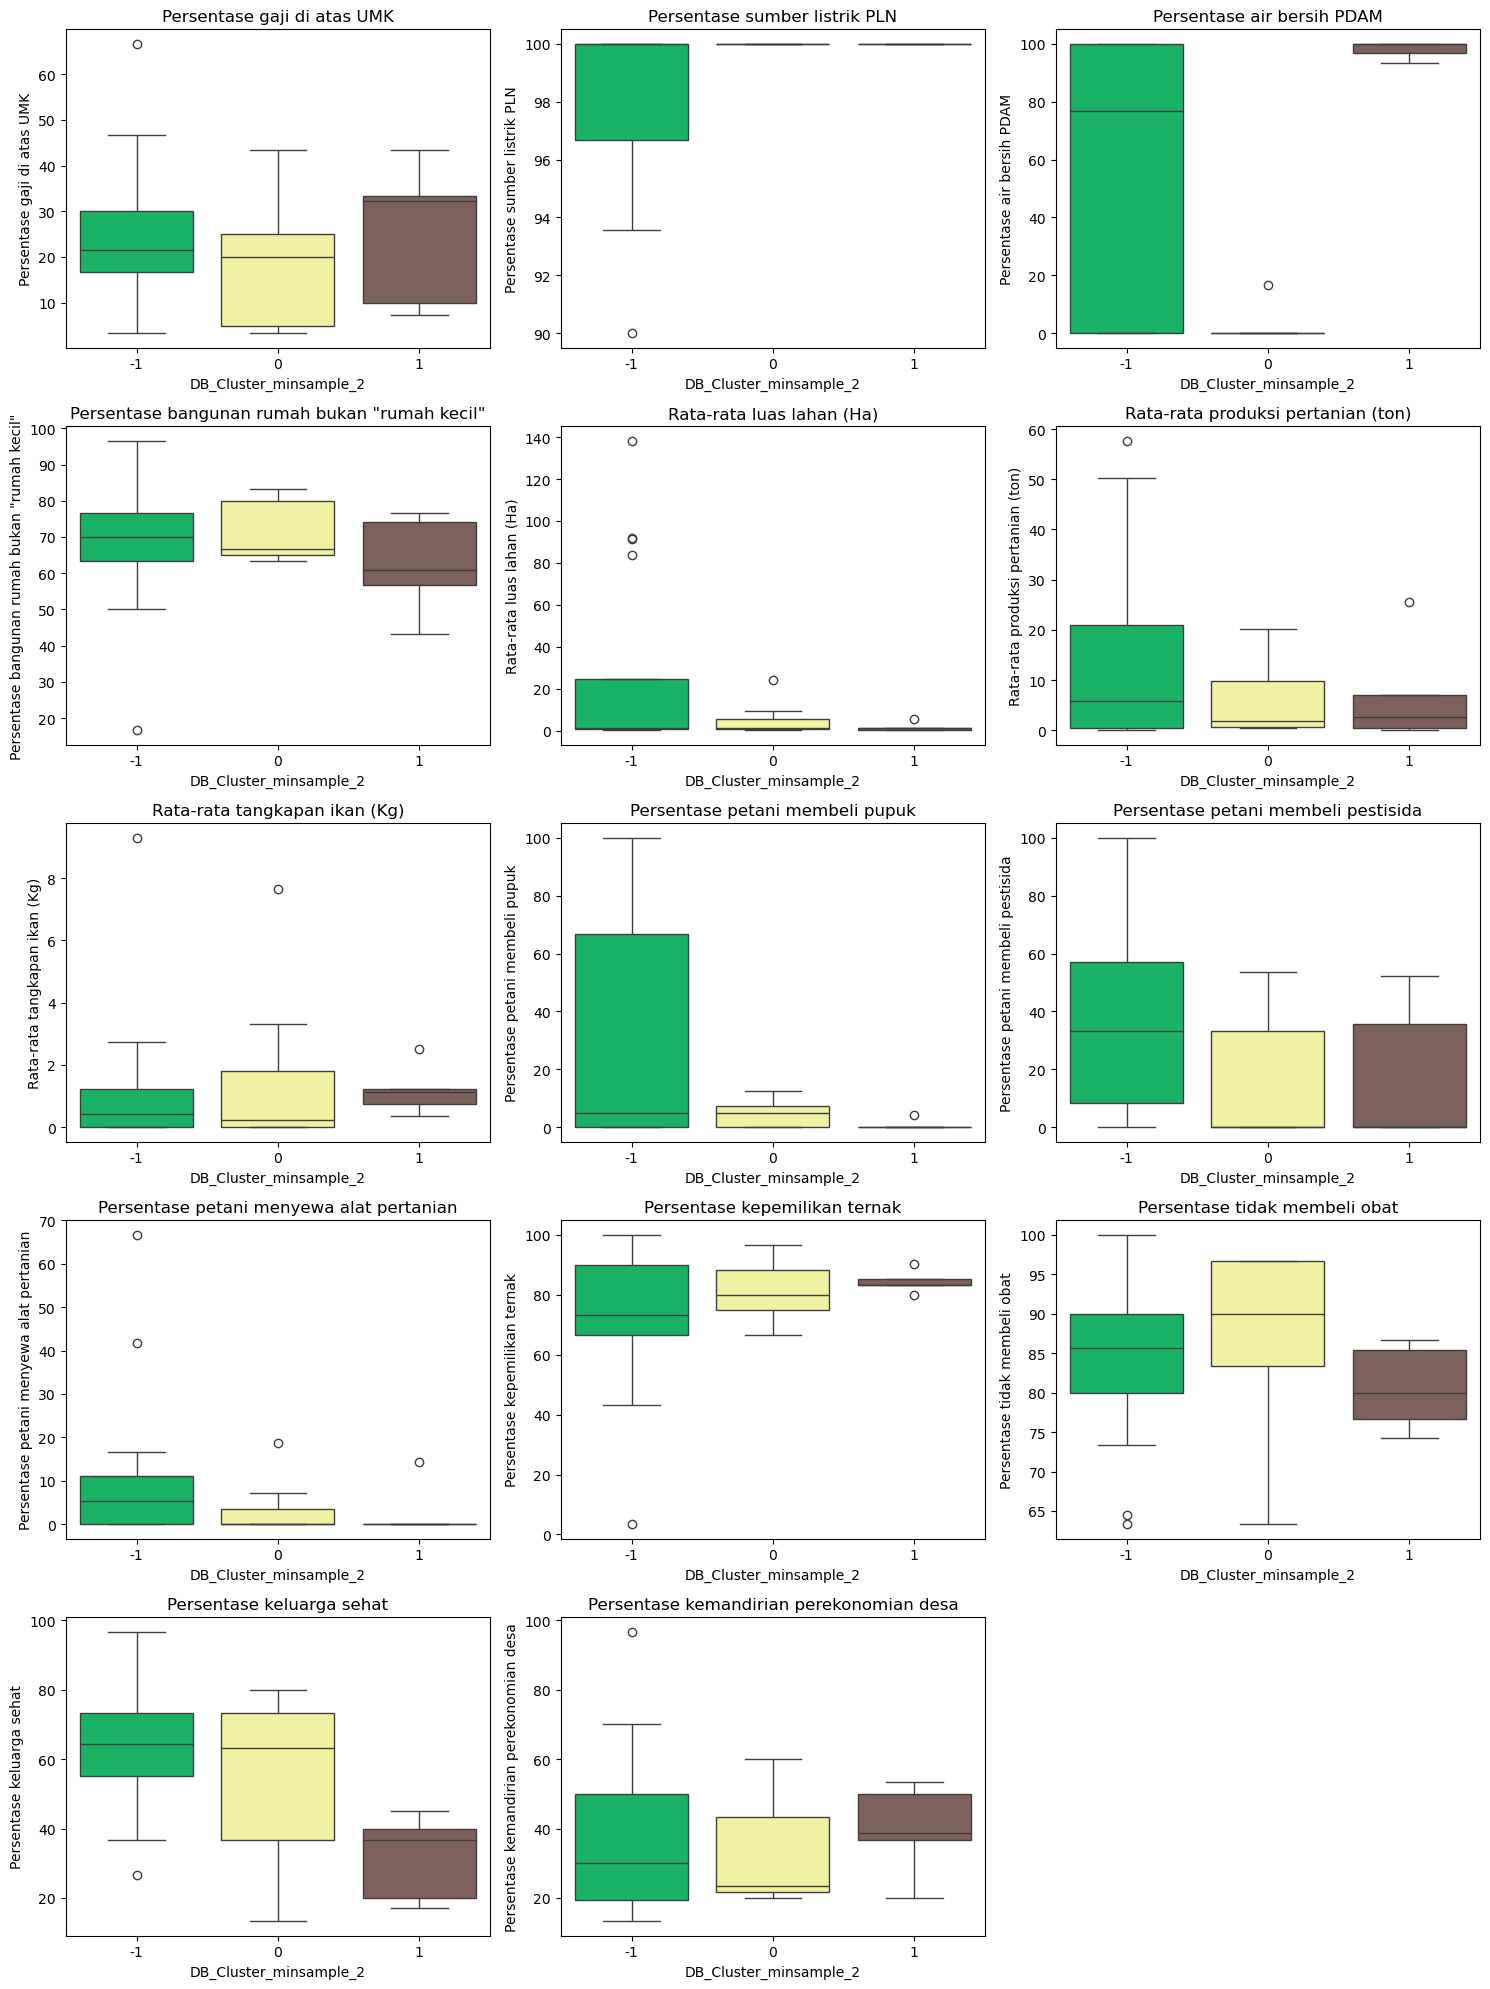

In [87]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_2", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

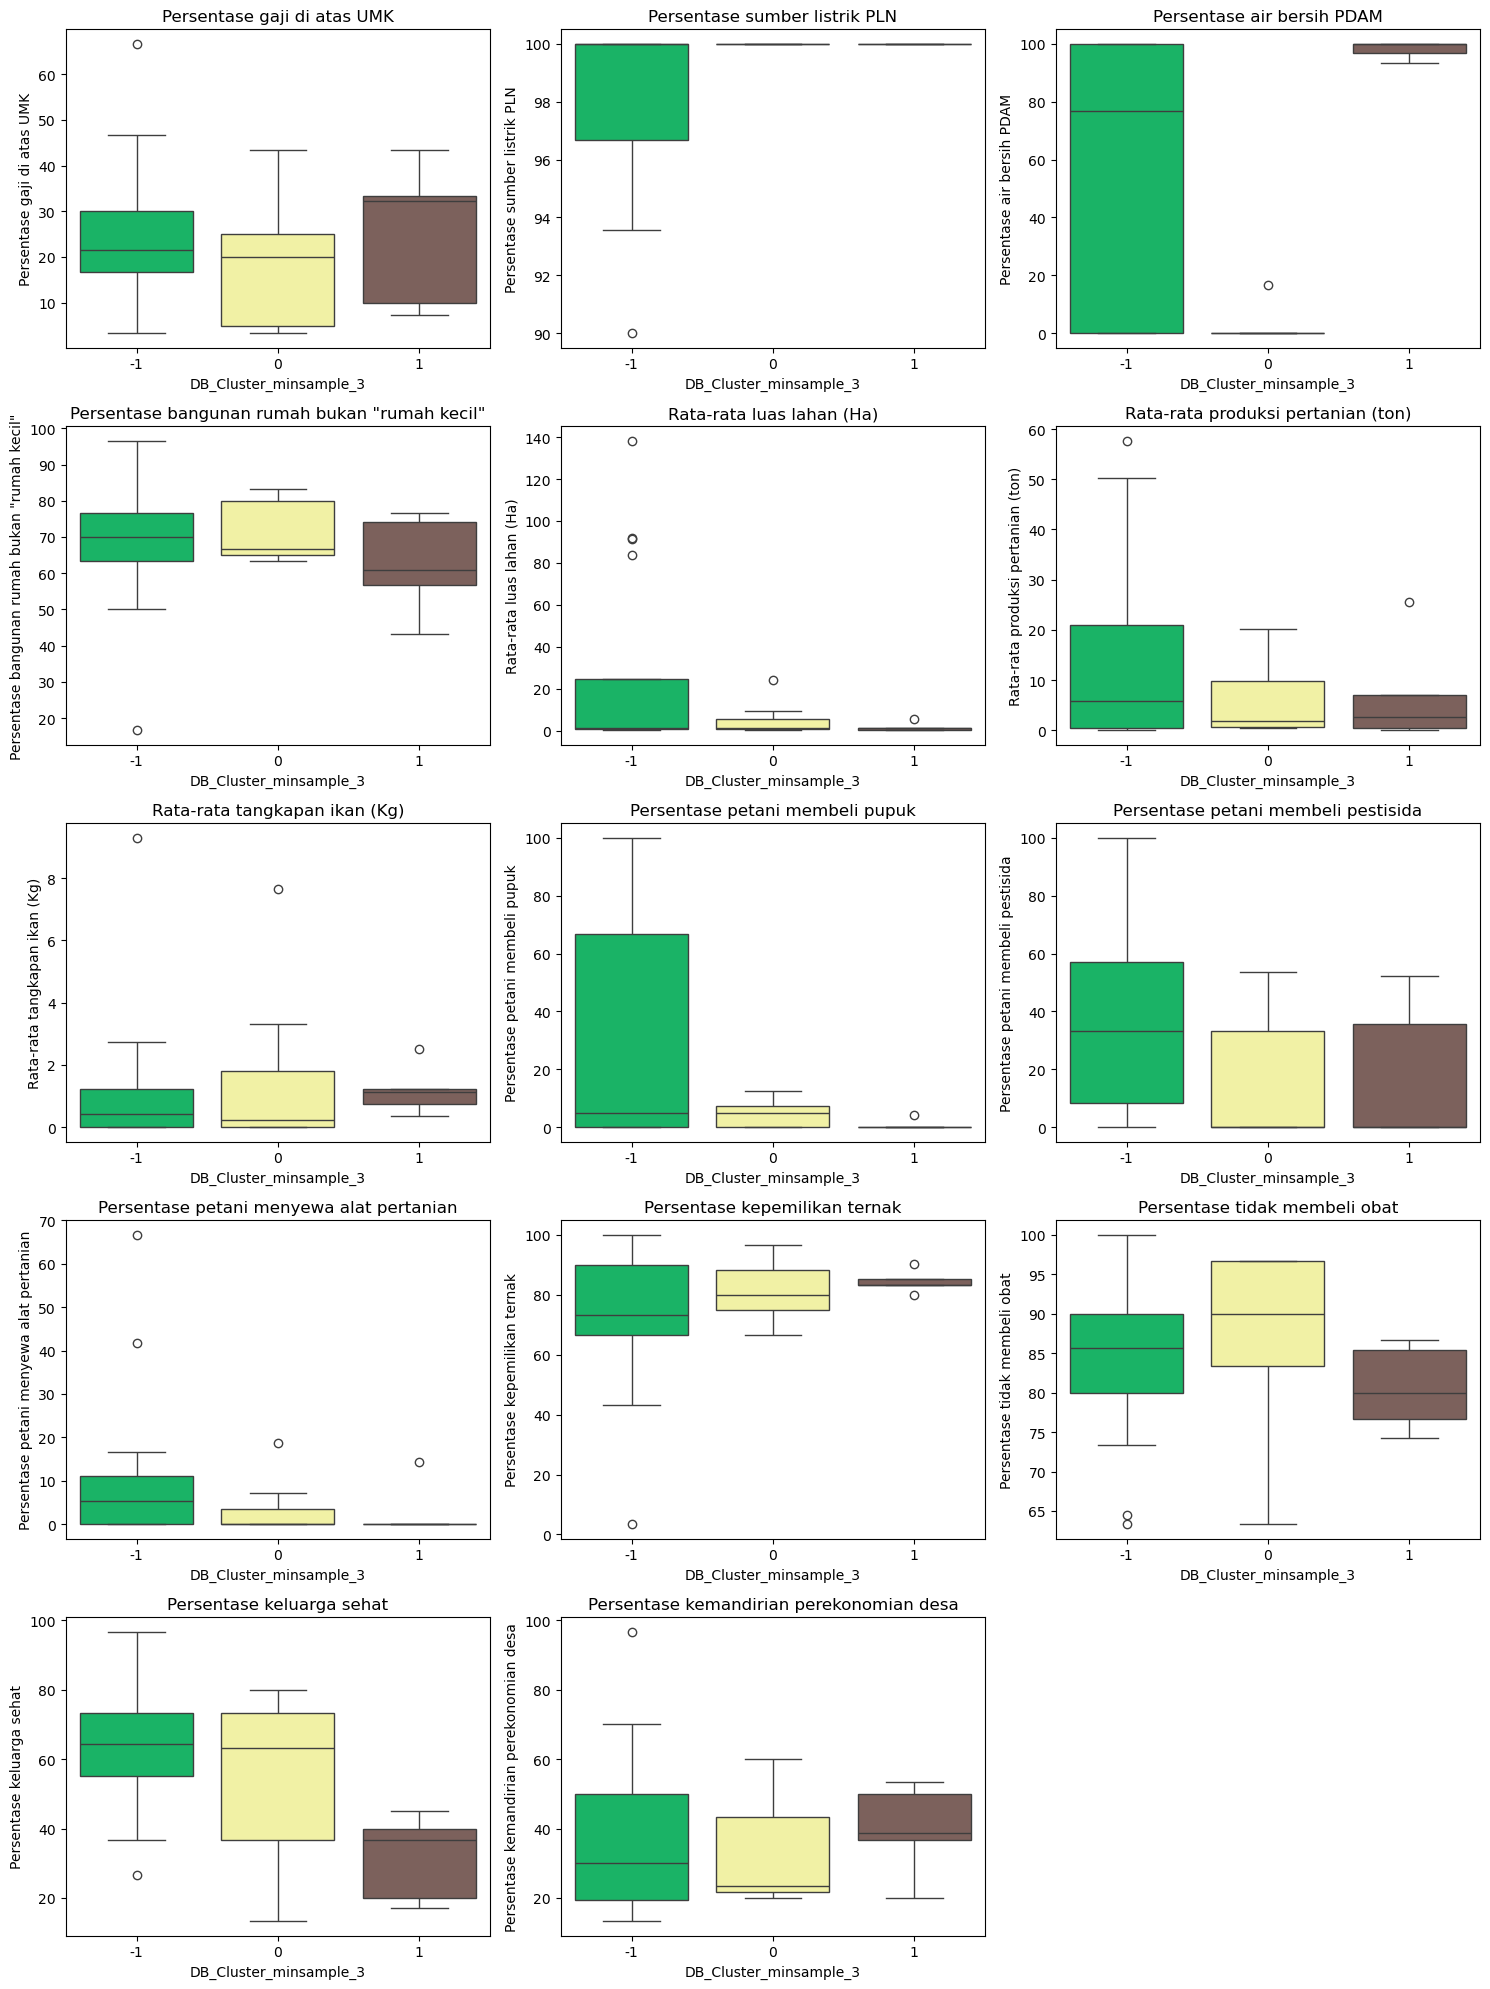

In [88]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_3", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### bar chart

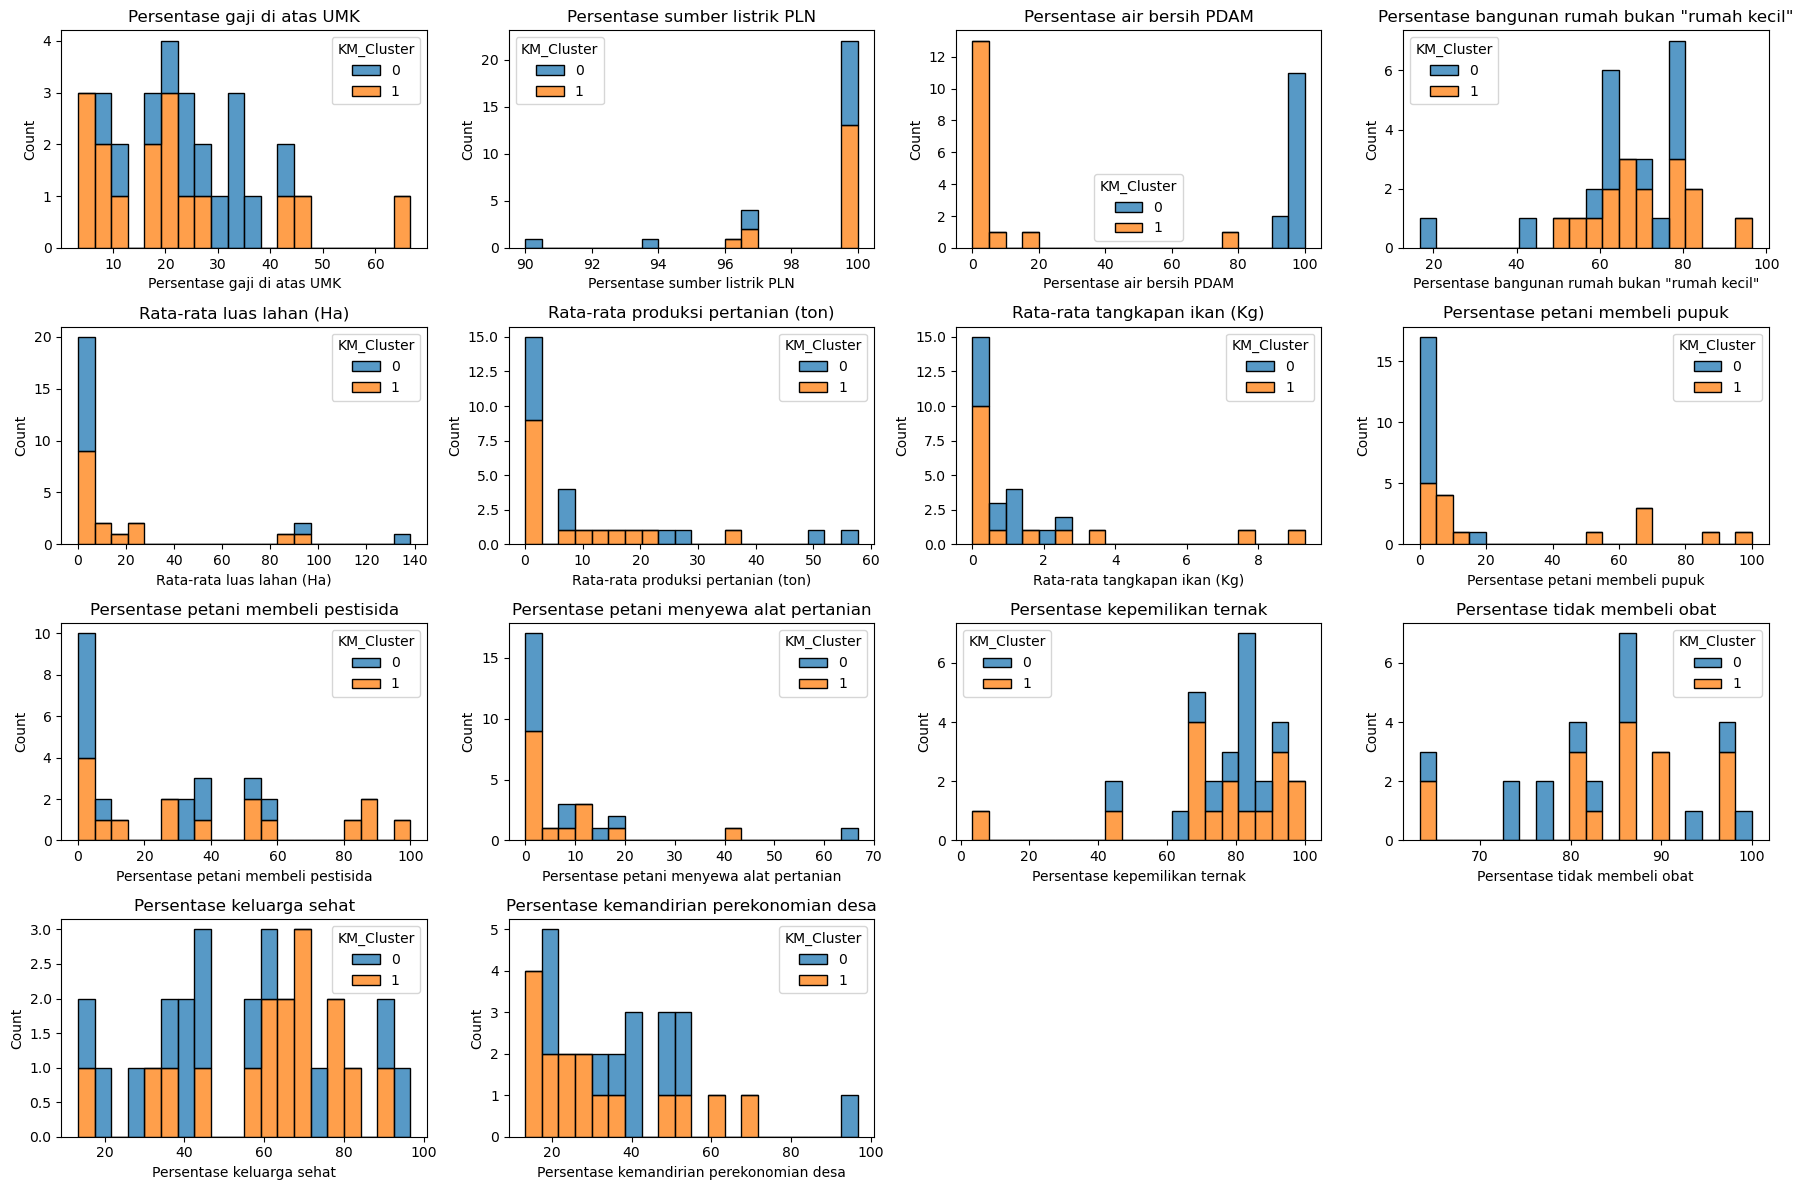

In [89]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_plot,
        x=col,
        hue="KM_Cluster",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

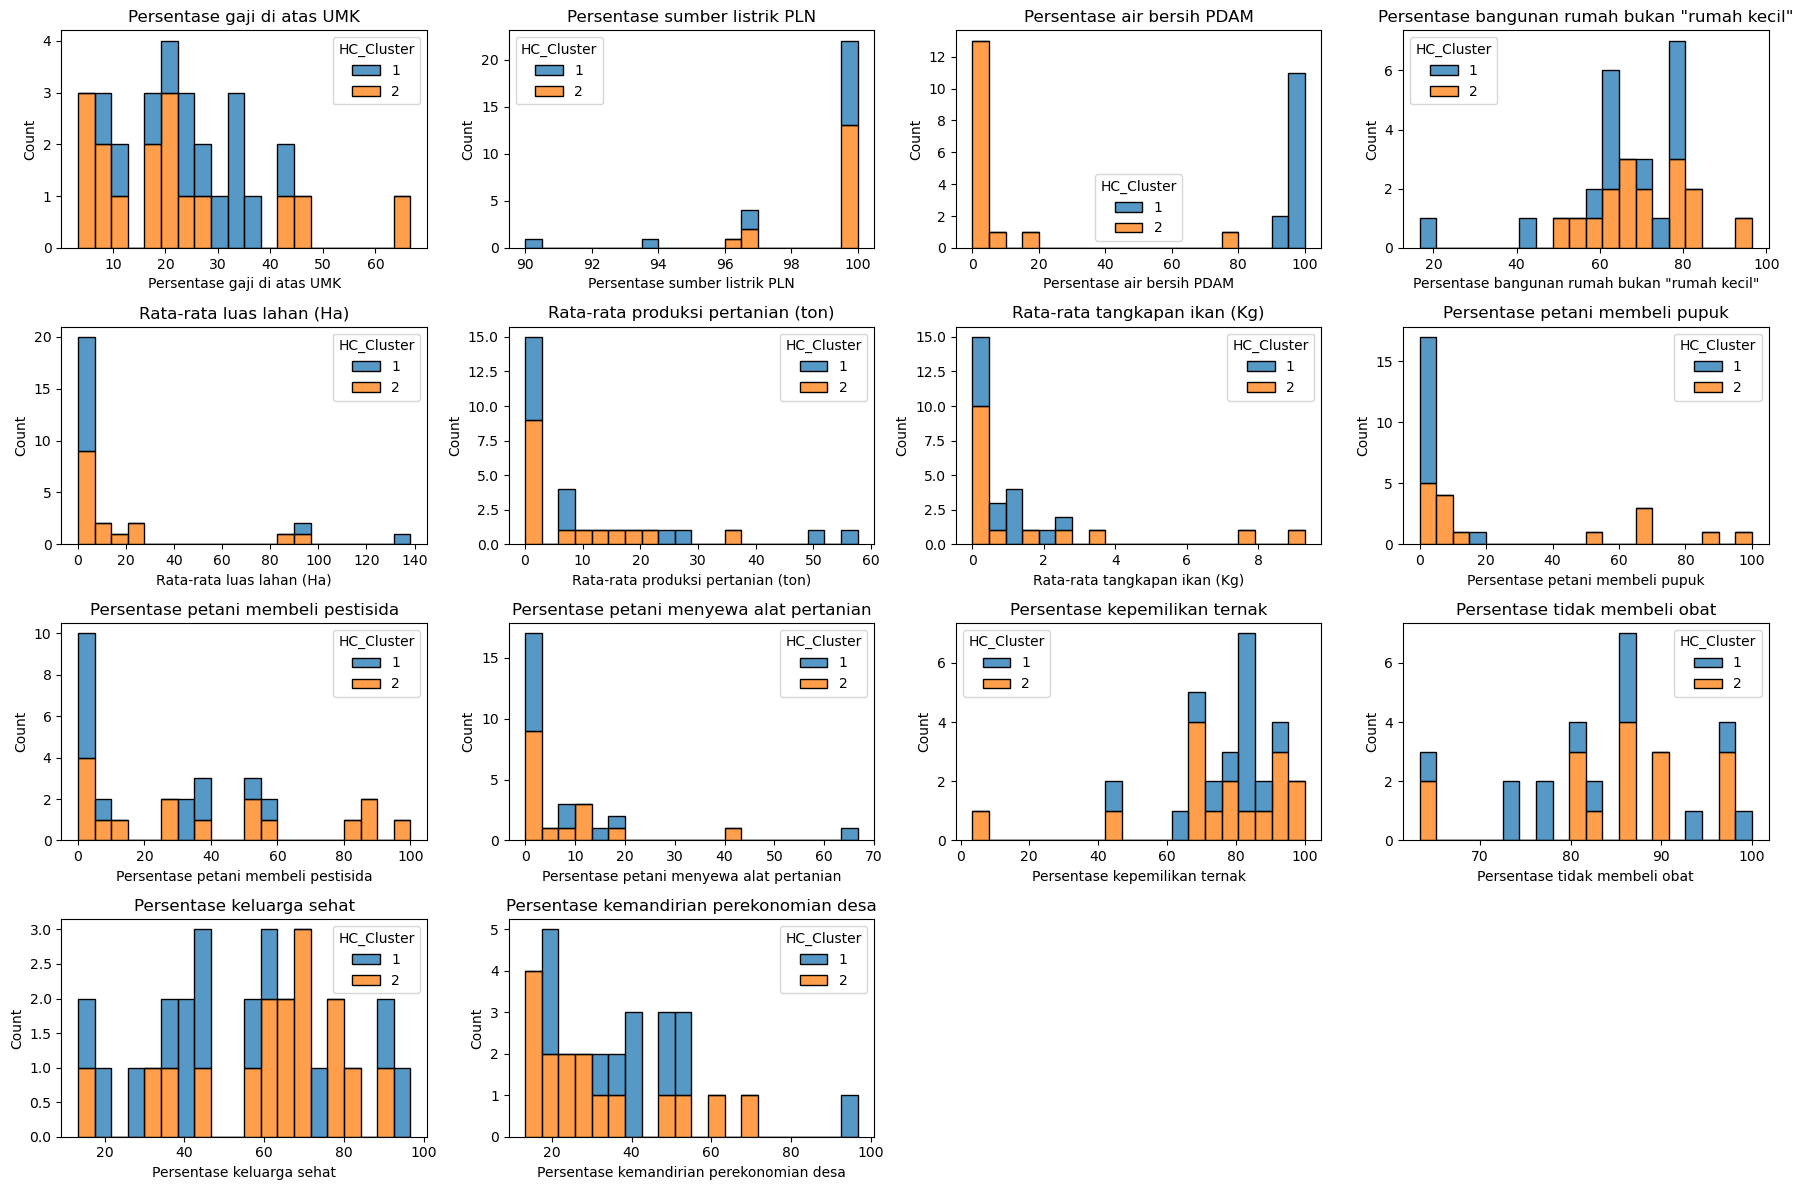

In [90]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

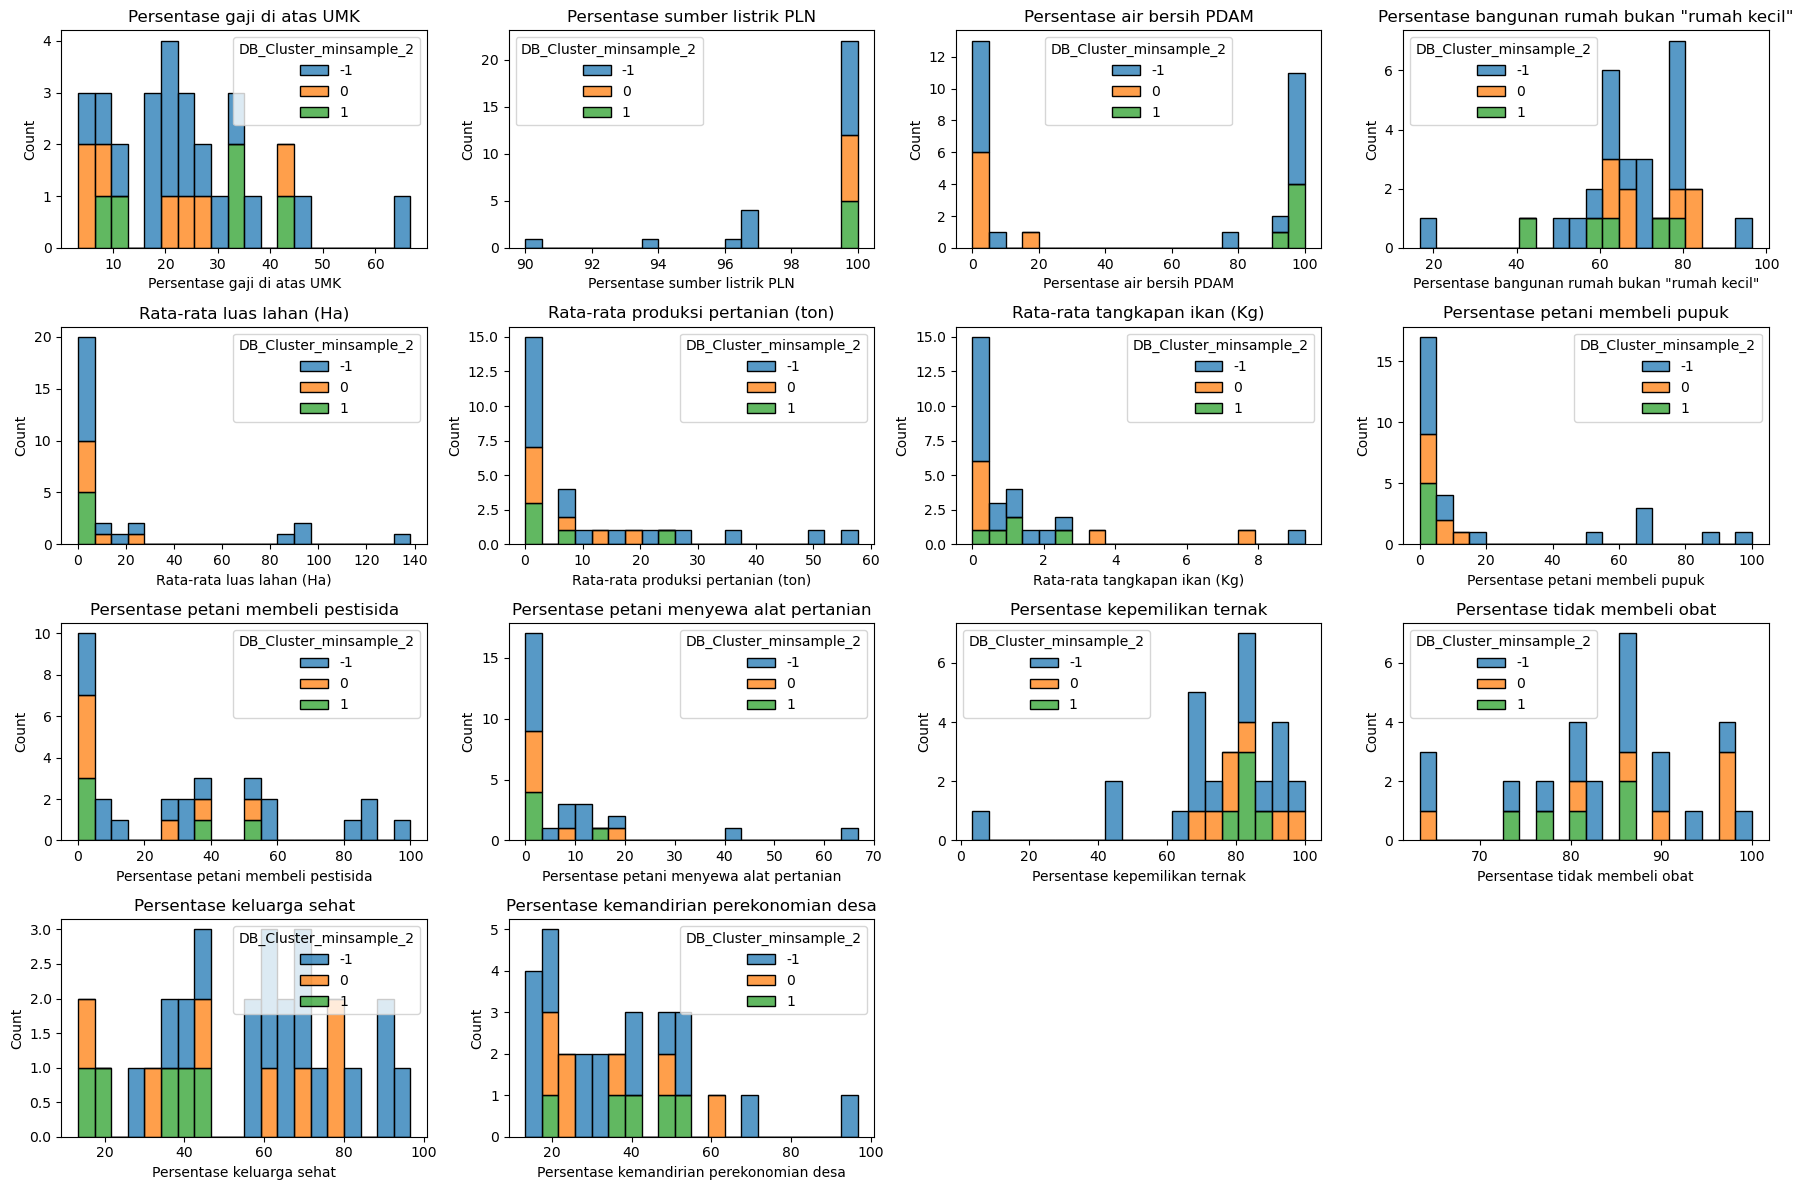

In [91]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_2",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

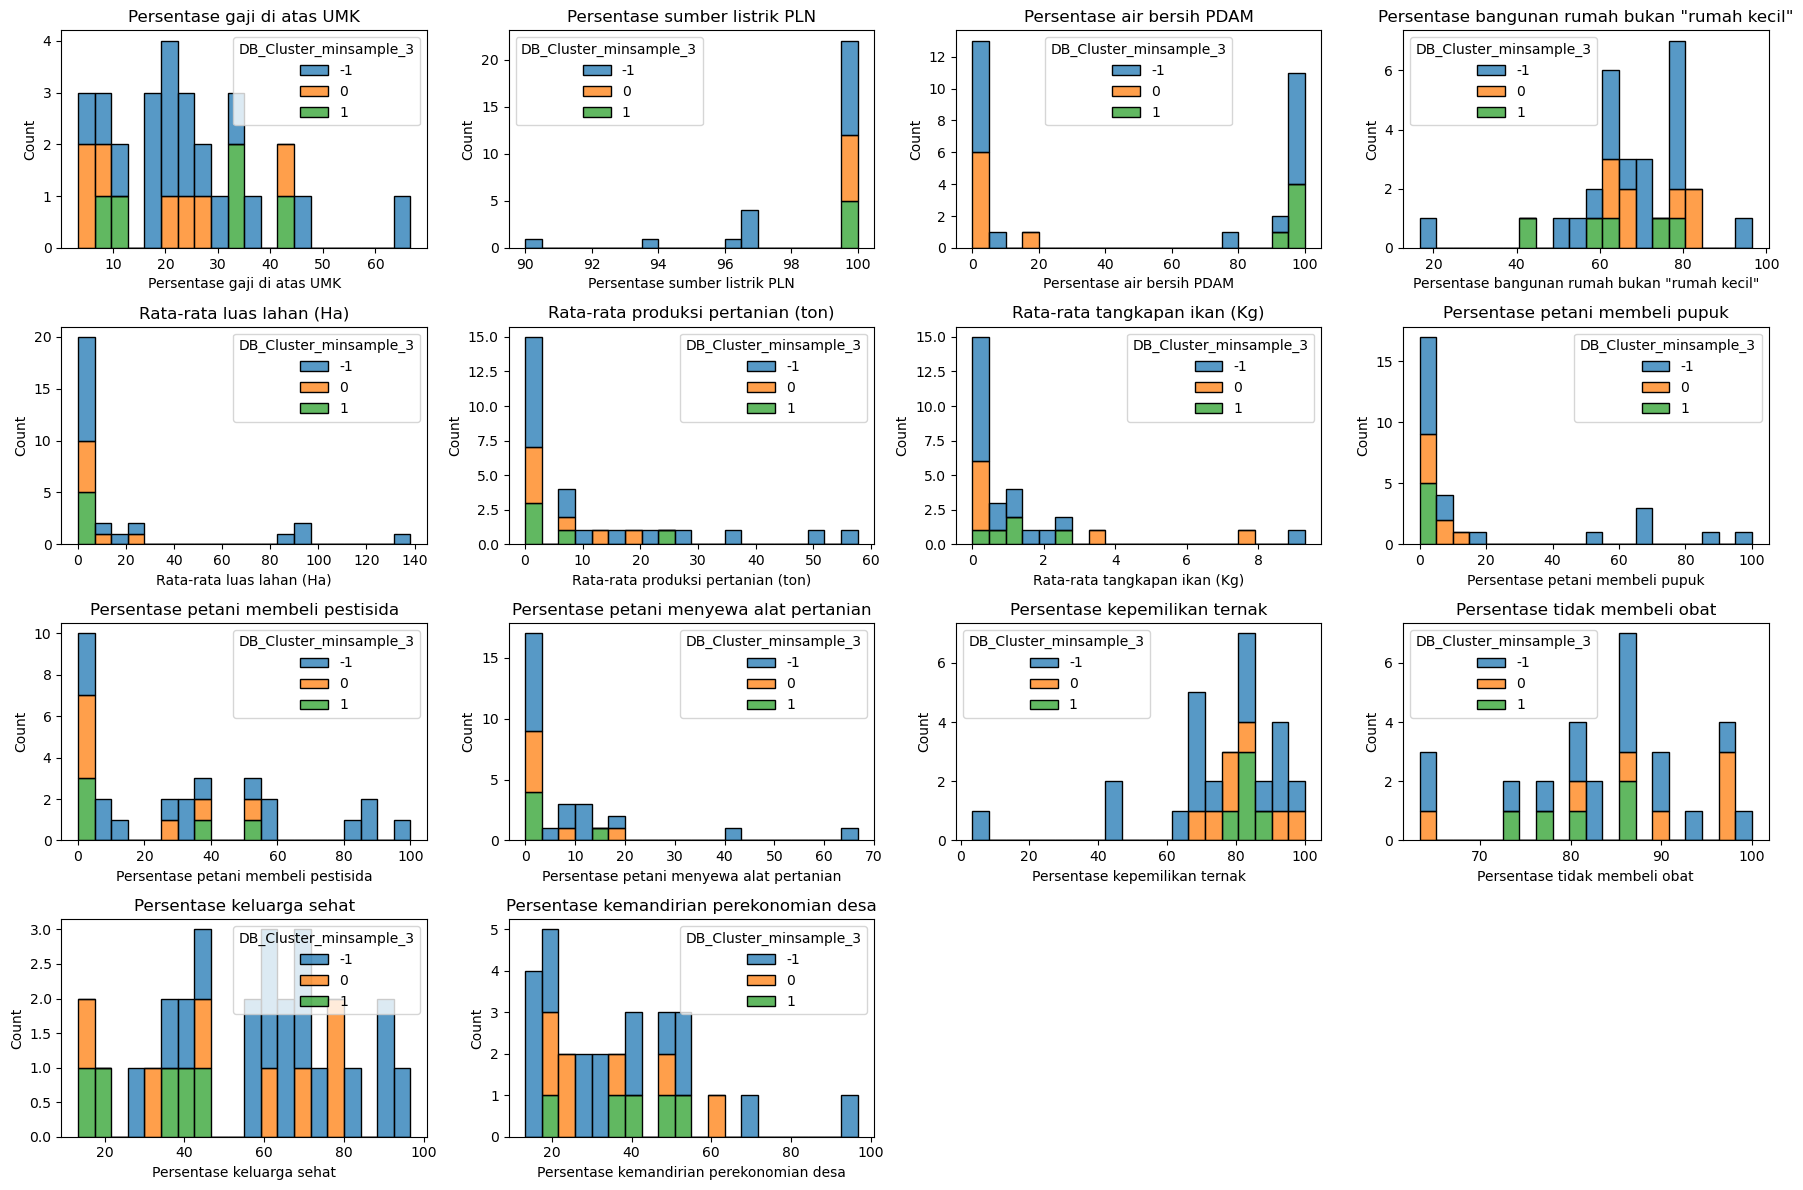

In [92]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_3",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### GRAFIK

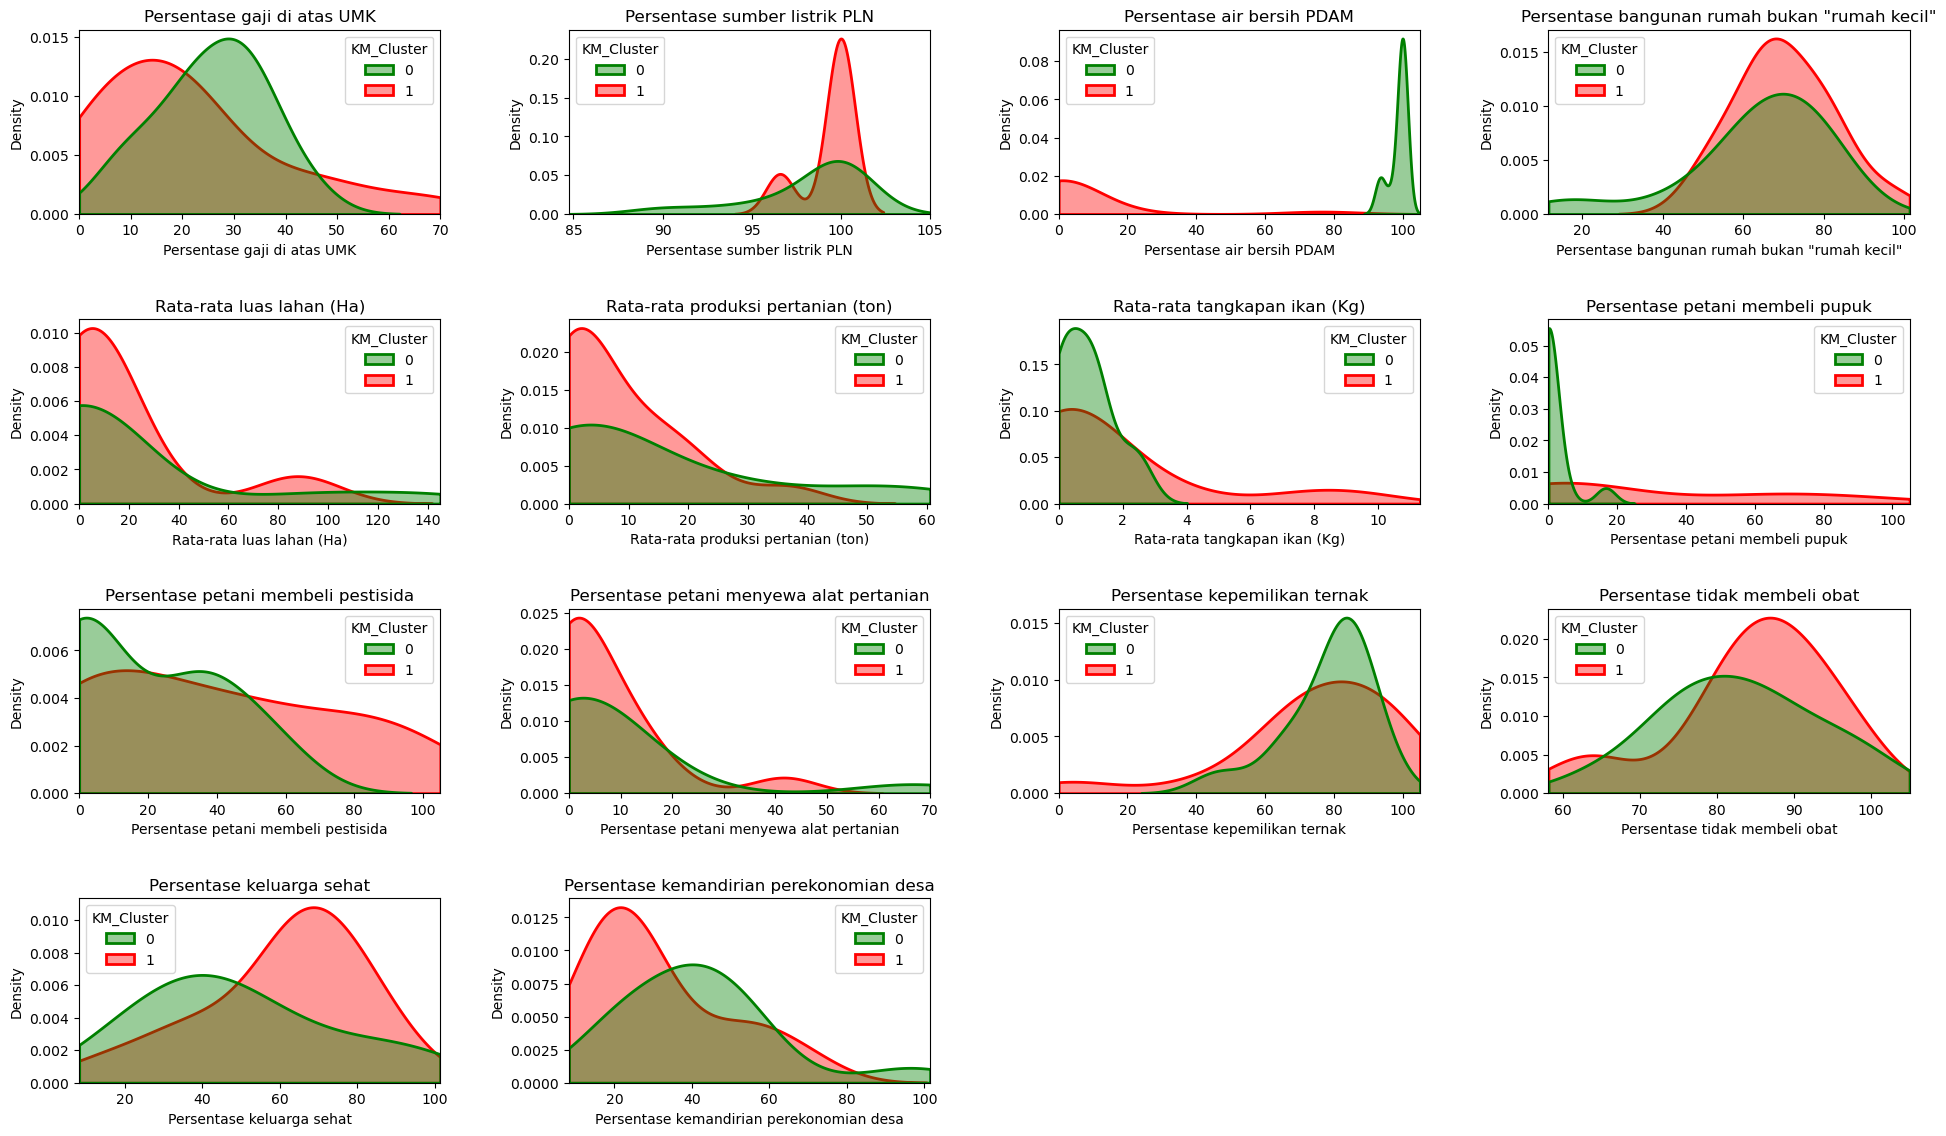

In [93]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "green", 1: "red"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="KM_Cluster",
        palette=custom_palette,
        hue_order=[0, 1],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

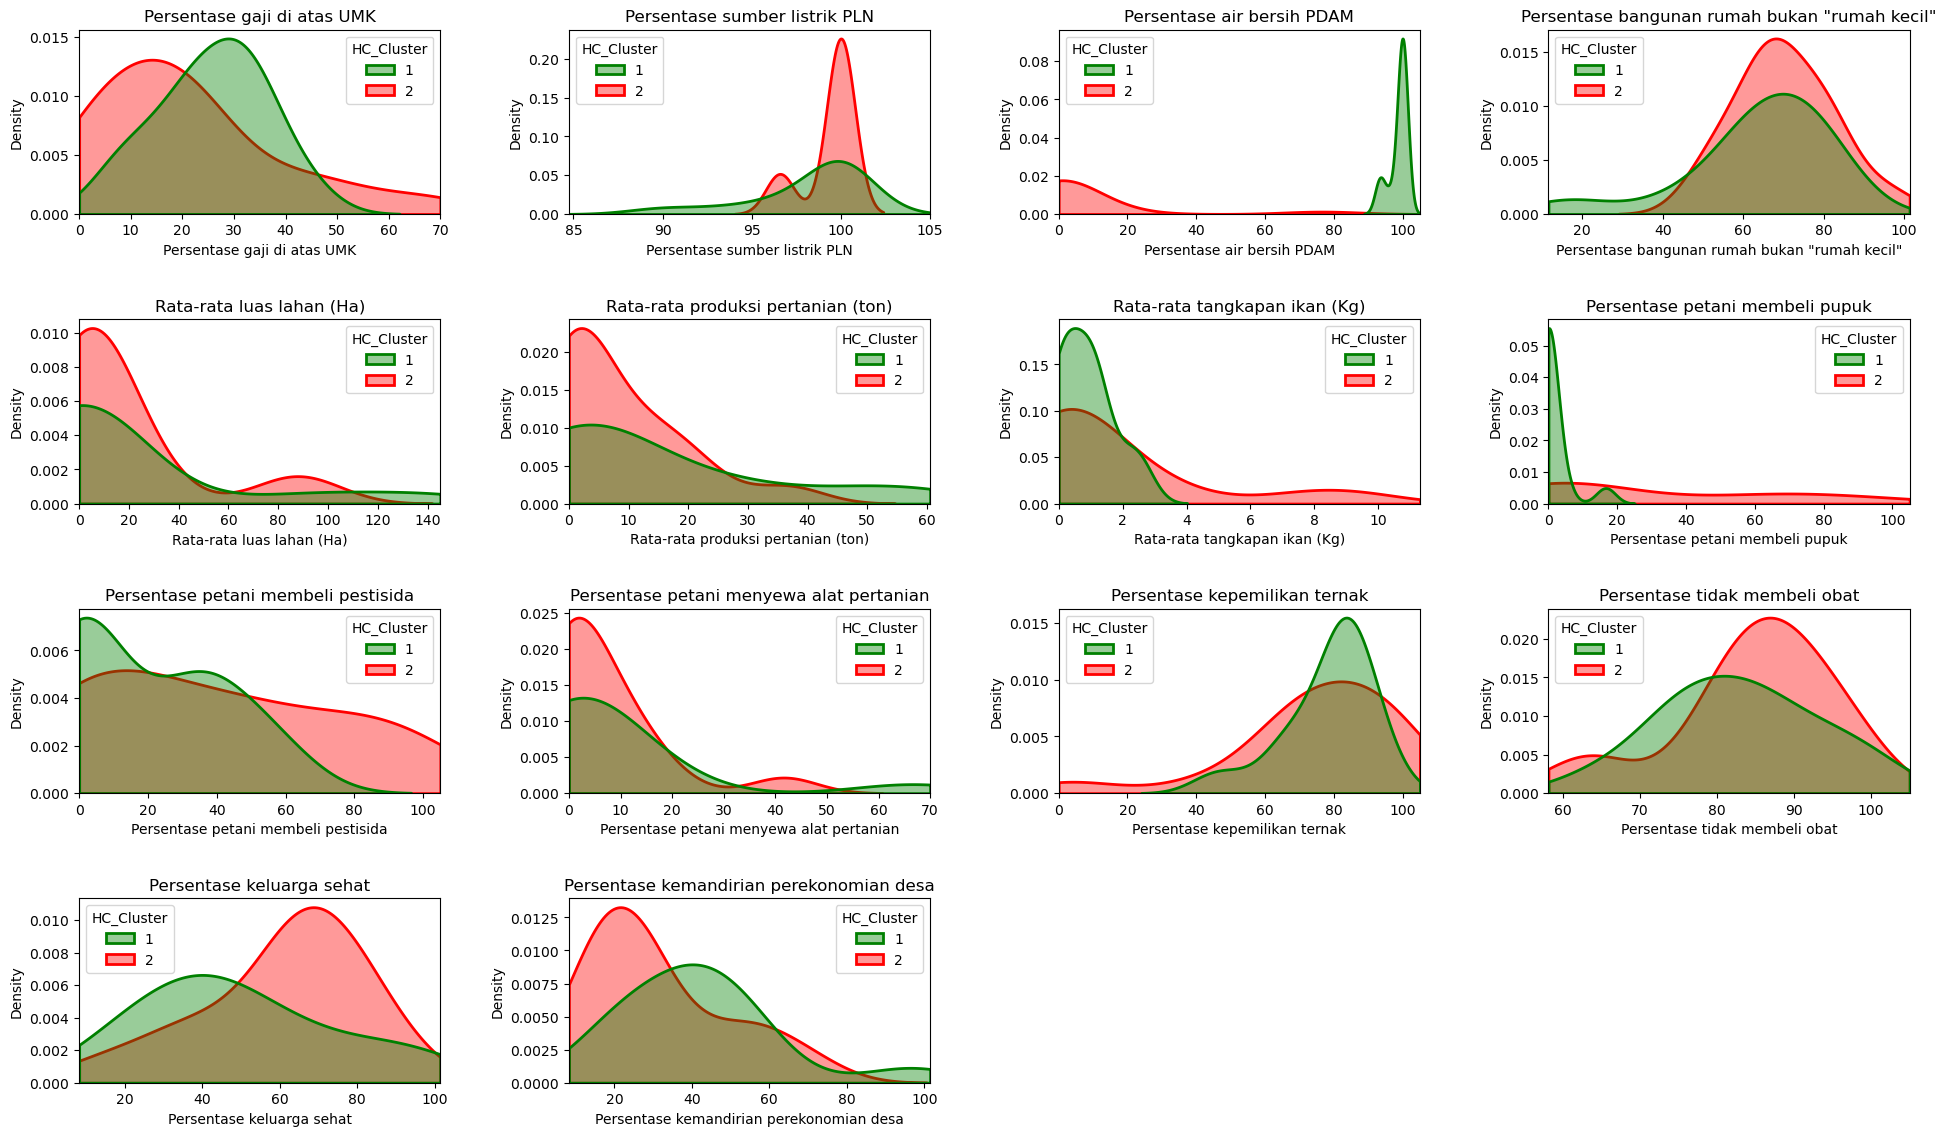

In [94]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {1: "green", 2: "red"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        palette=custom_palette,
        hue_order=[1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_14728\4091637736.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


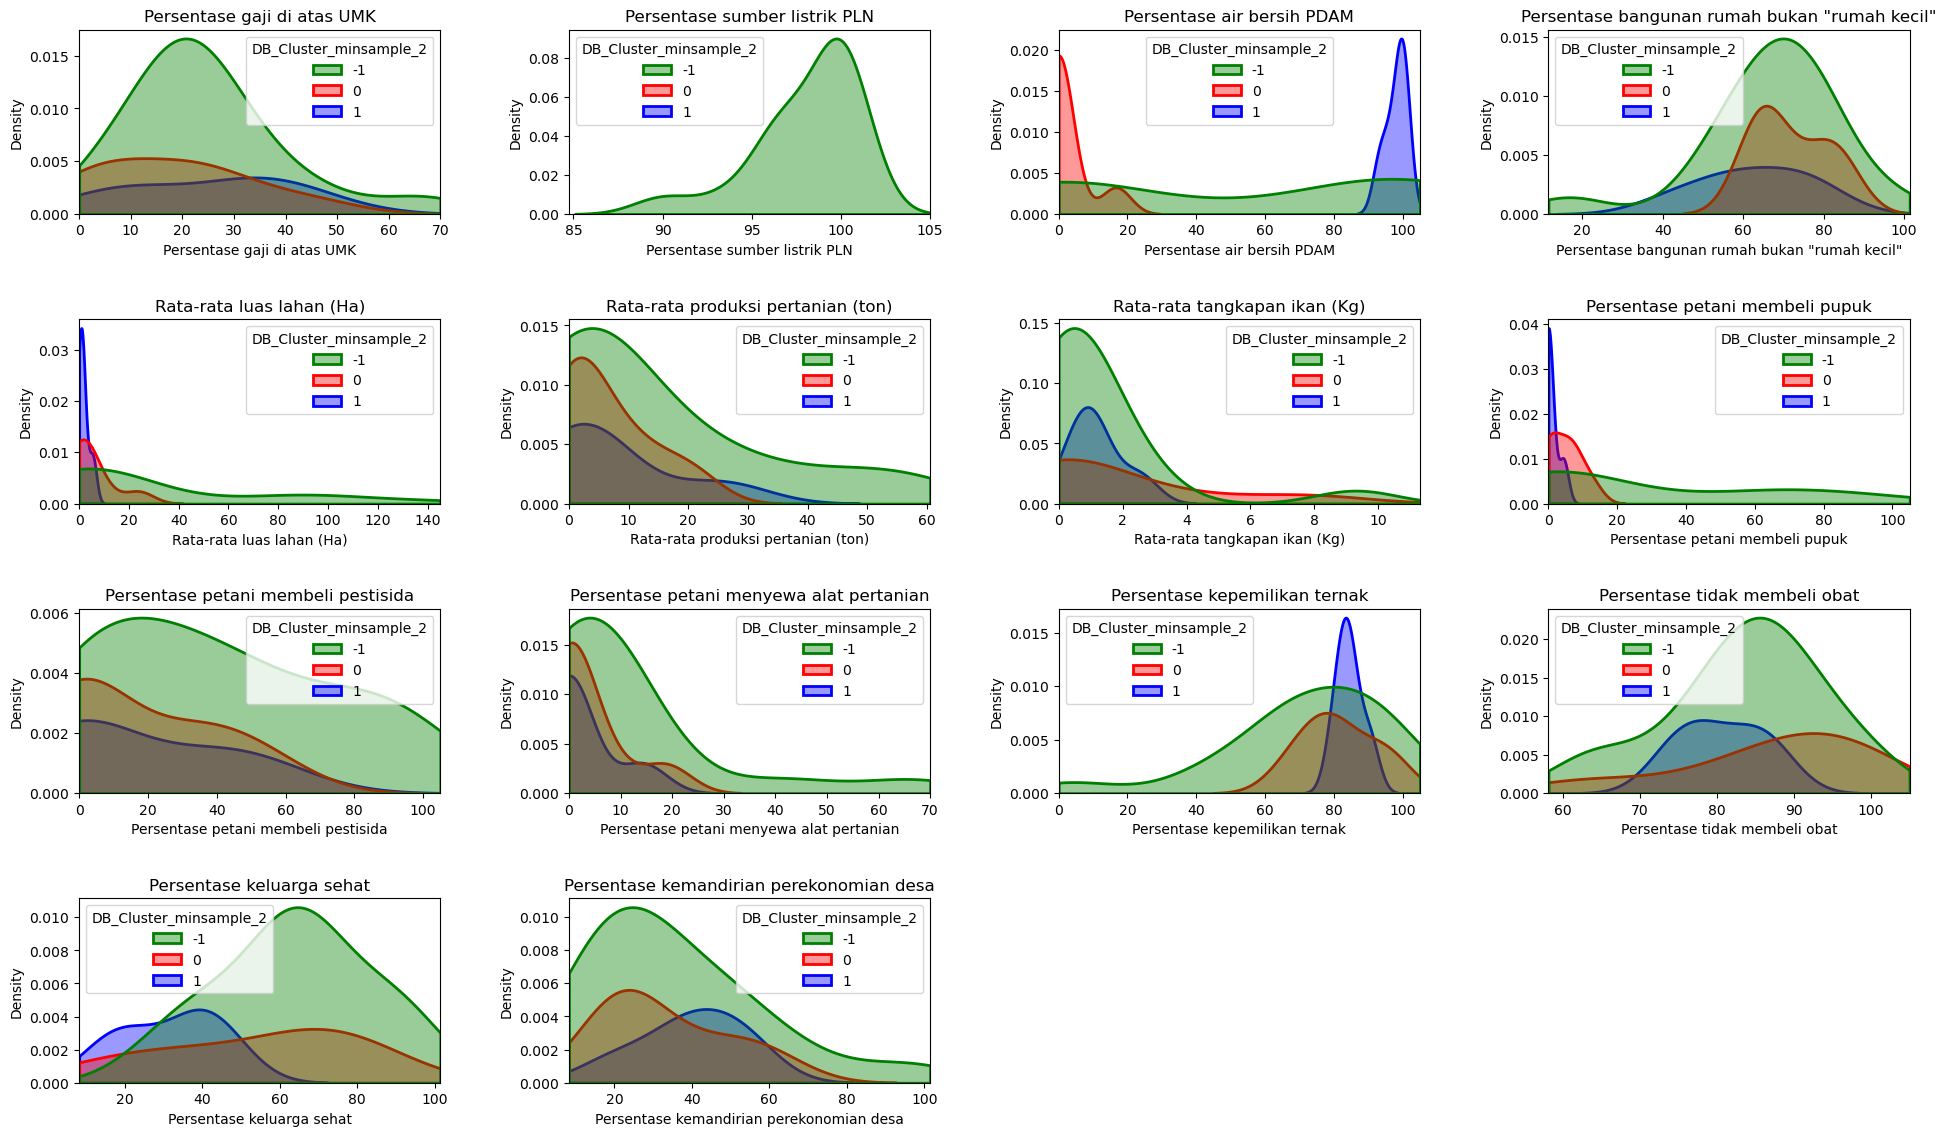

In [95]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {-1: "green", 0: "red", 1: "blue"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_2",
        palette=custom_palette,
        hue_order=[-1, 0, 1],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_14728\473385467.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


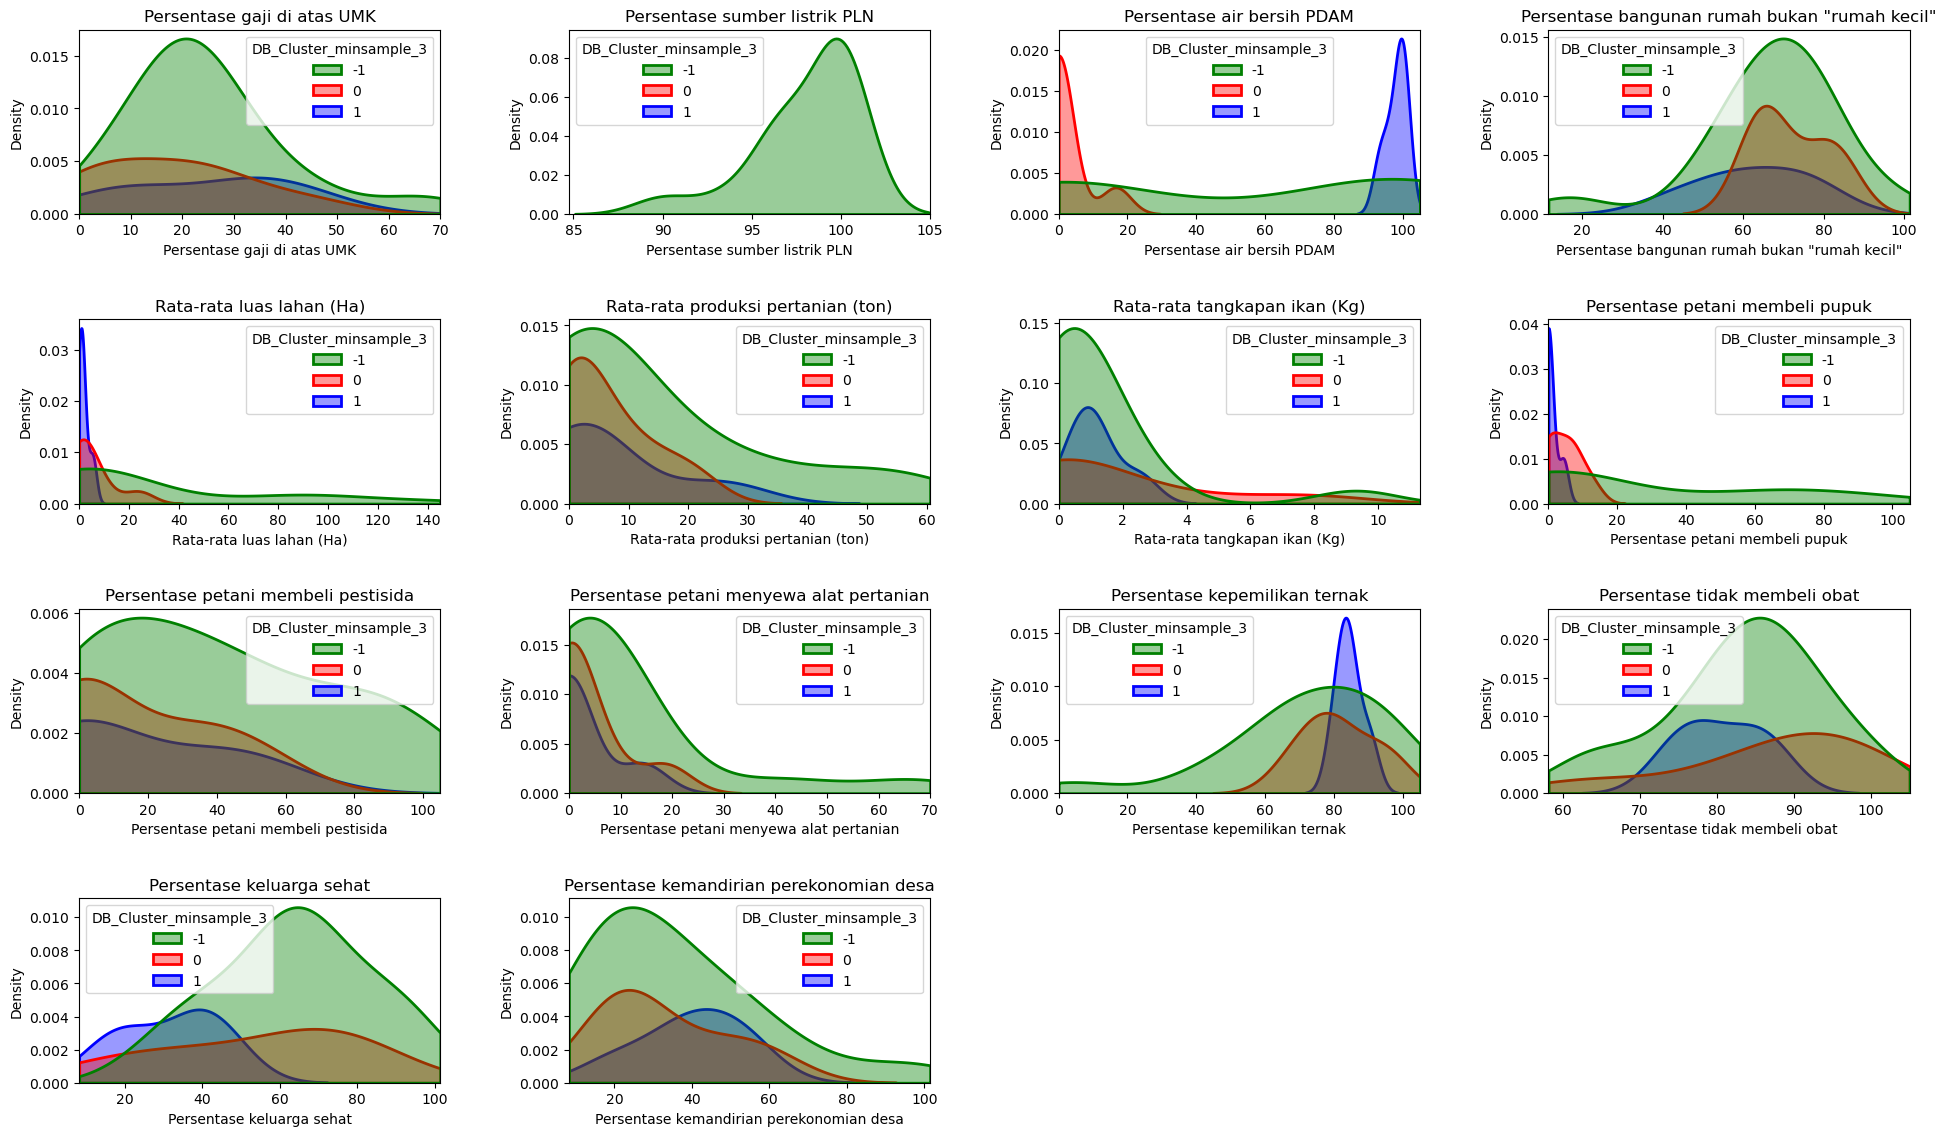

In [96]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {-1: "green", 0: "red", 1: "blue"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_3",
        palette=custom_palette,
        hue_order=[-1, 0, 1],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

## PCA

### Boxplot

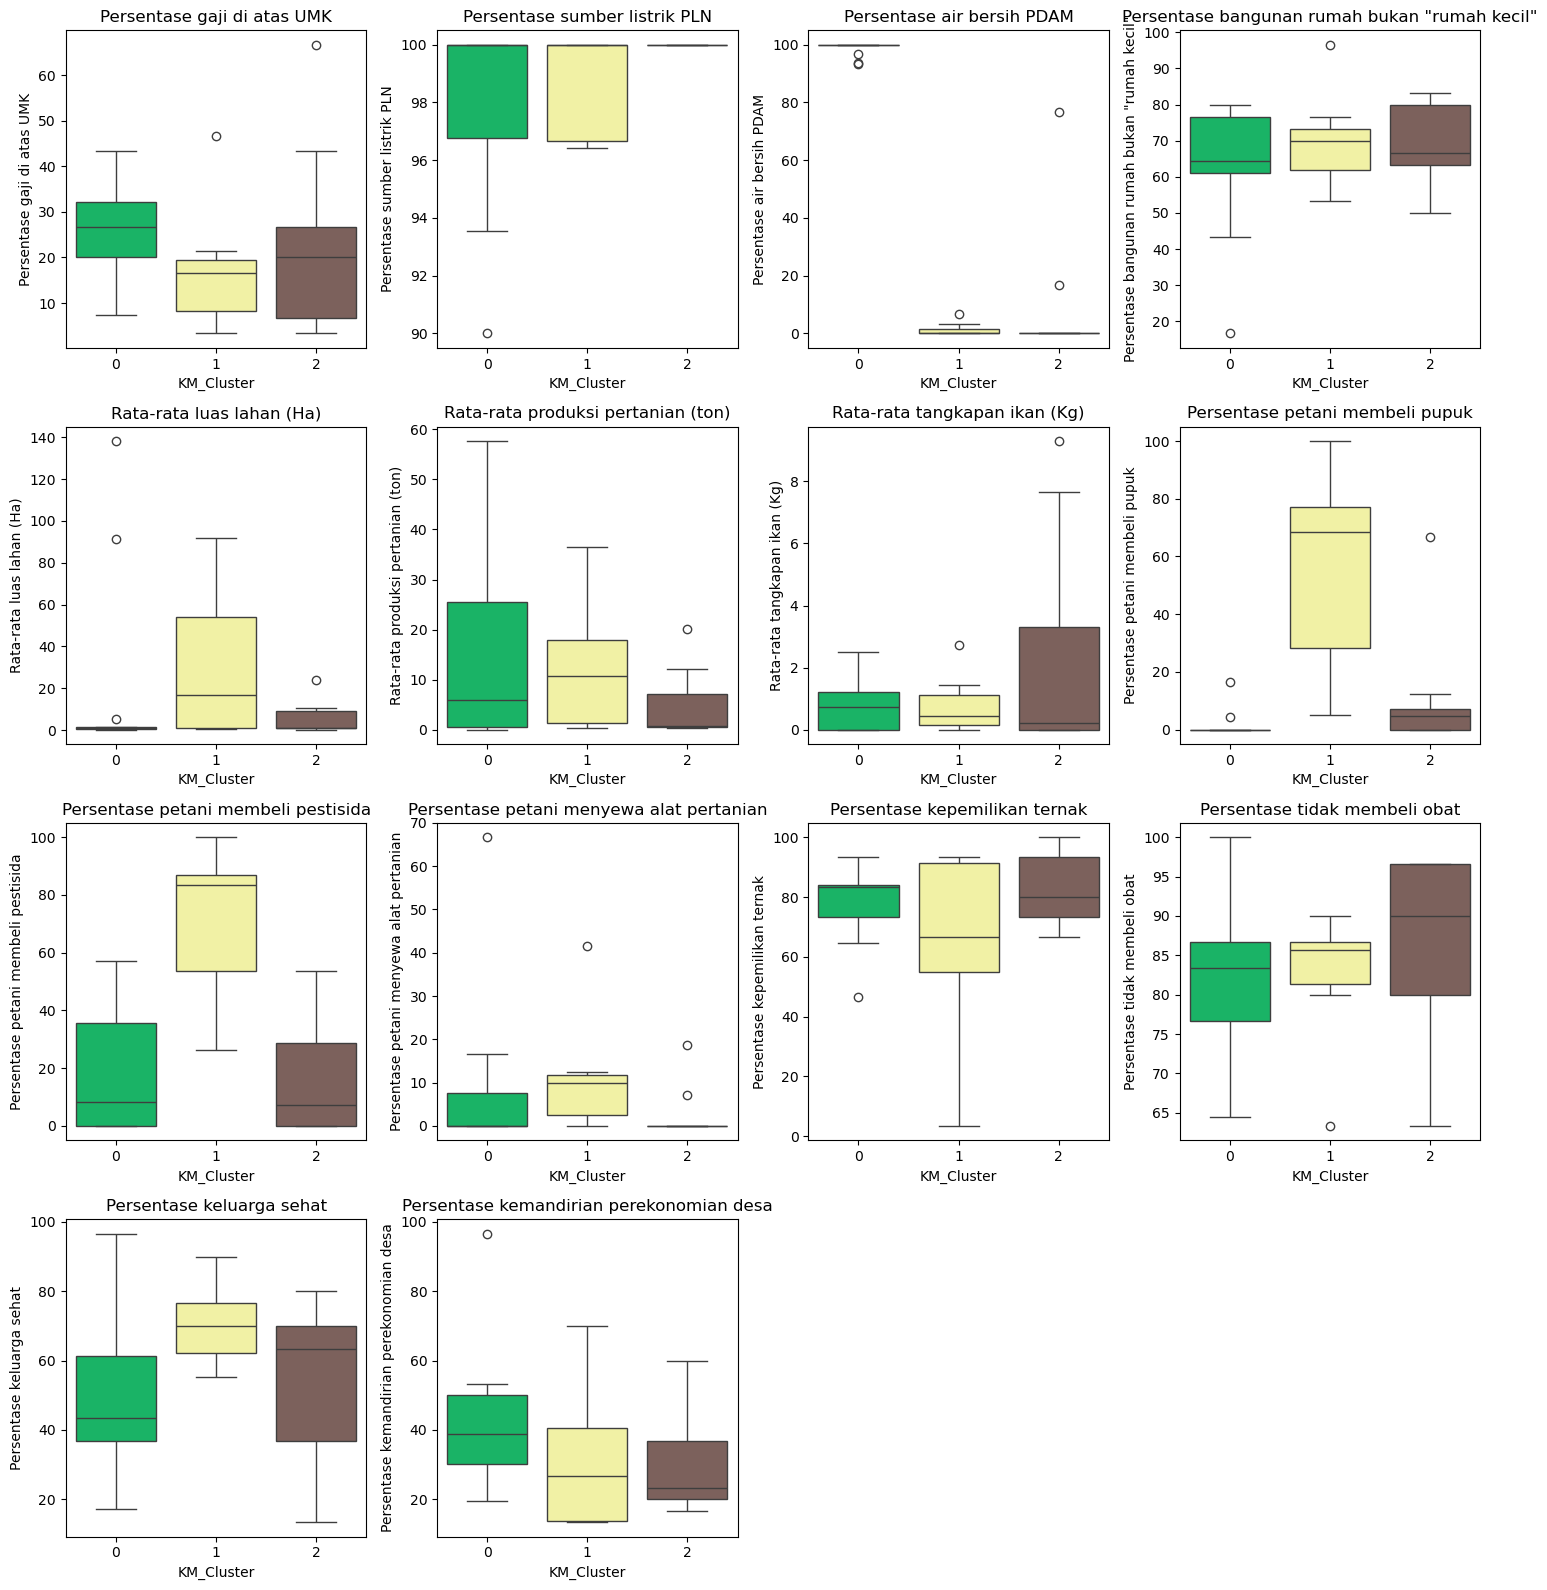

In [97]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="KM_Cluster", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

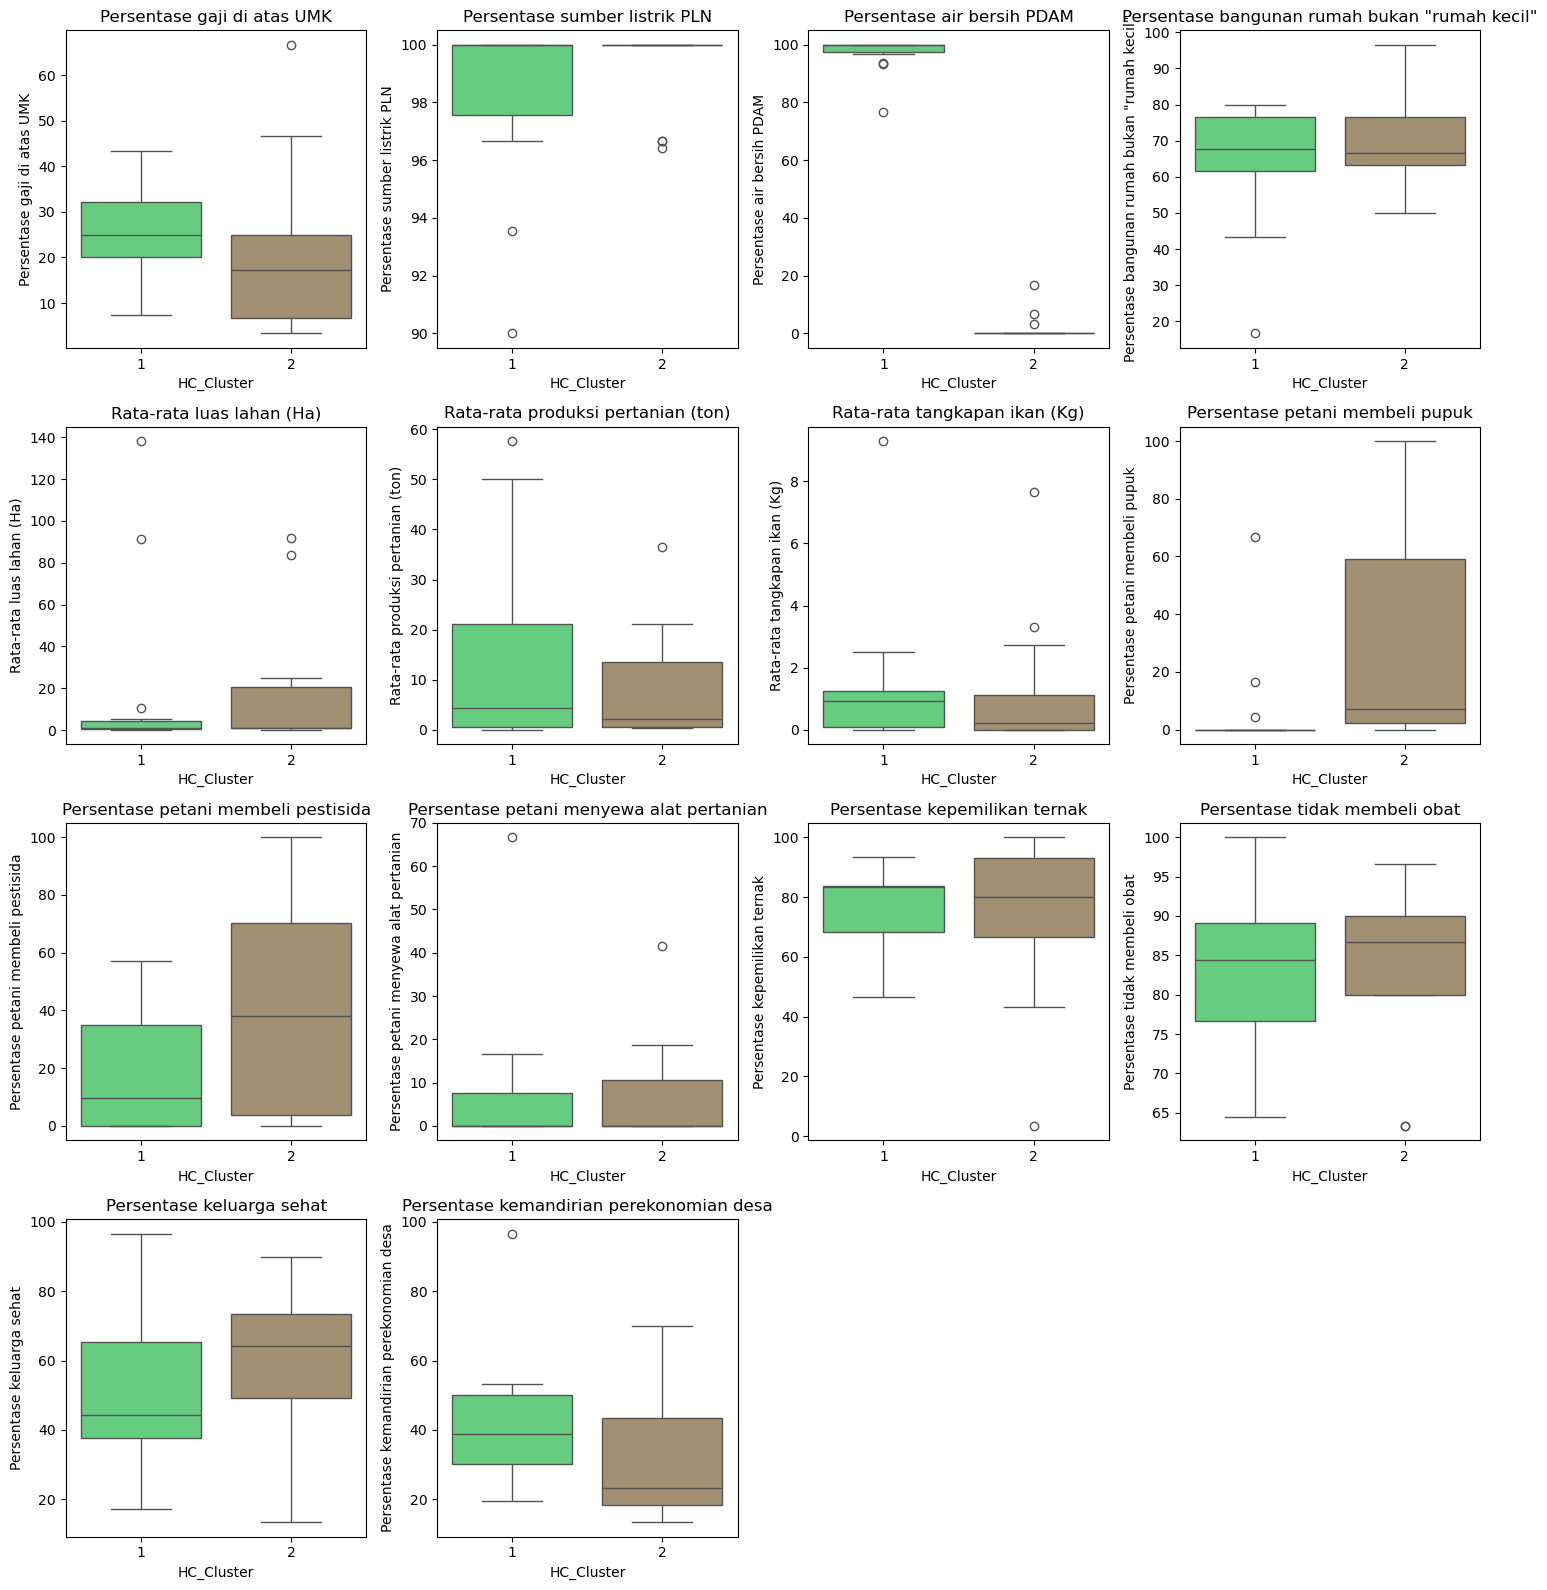

In [98]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="HC_Cluster", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

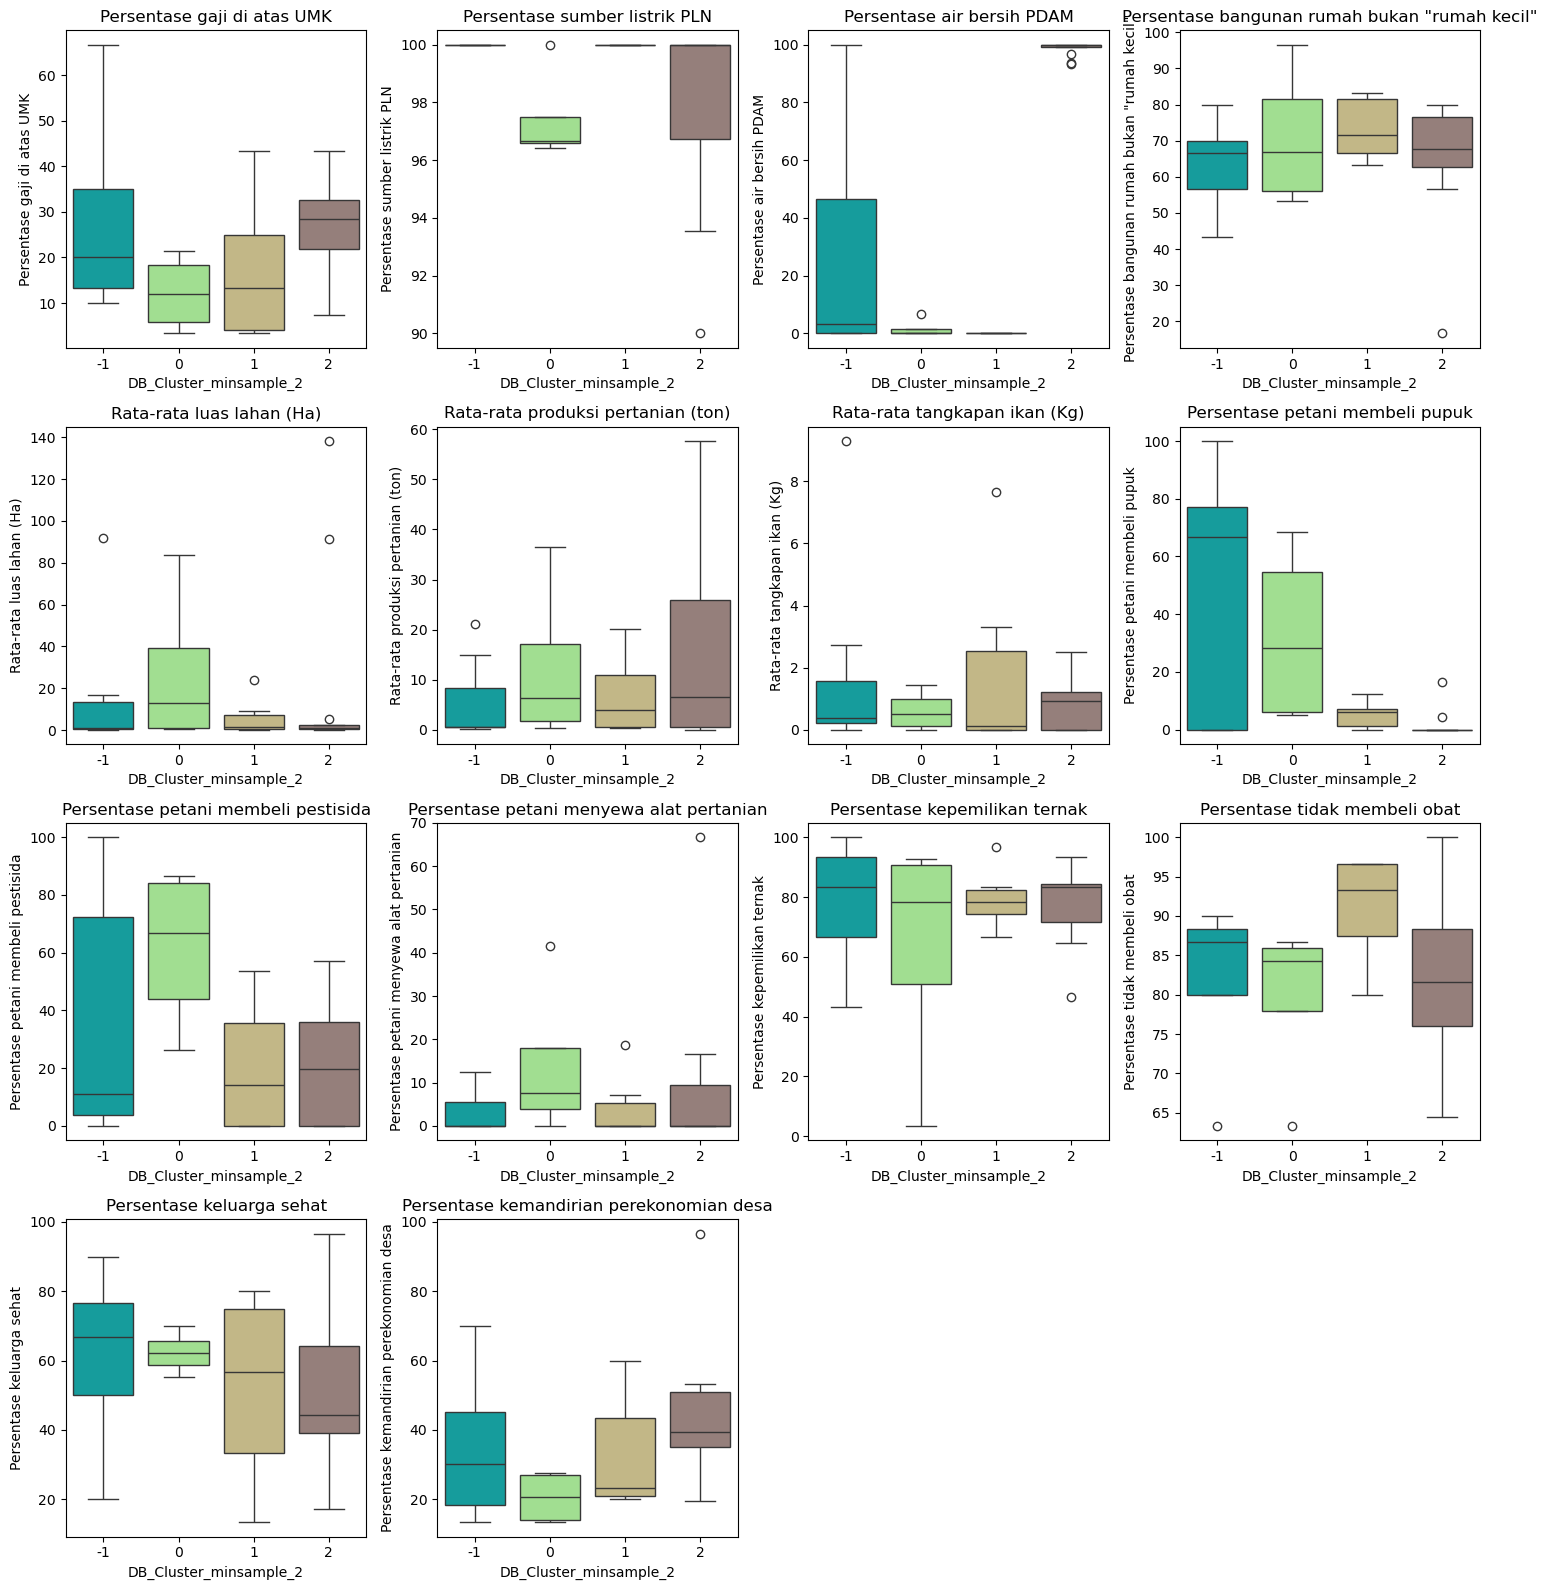

In [99]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_2", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

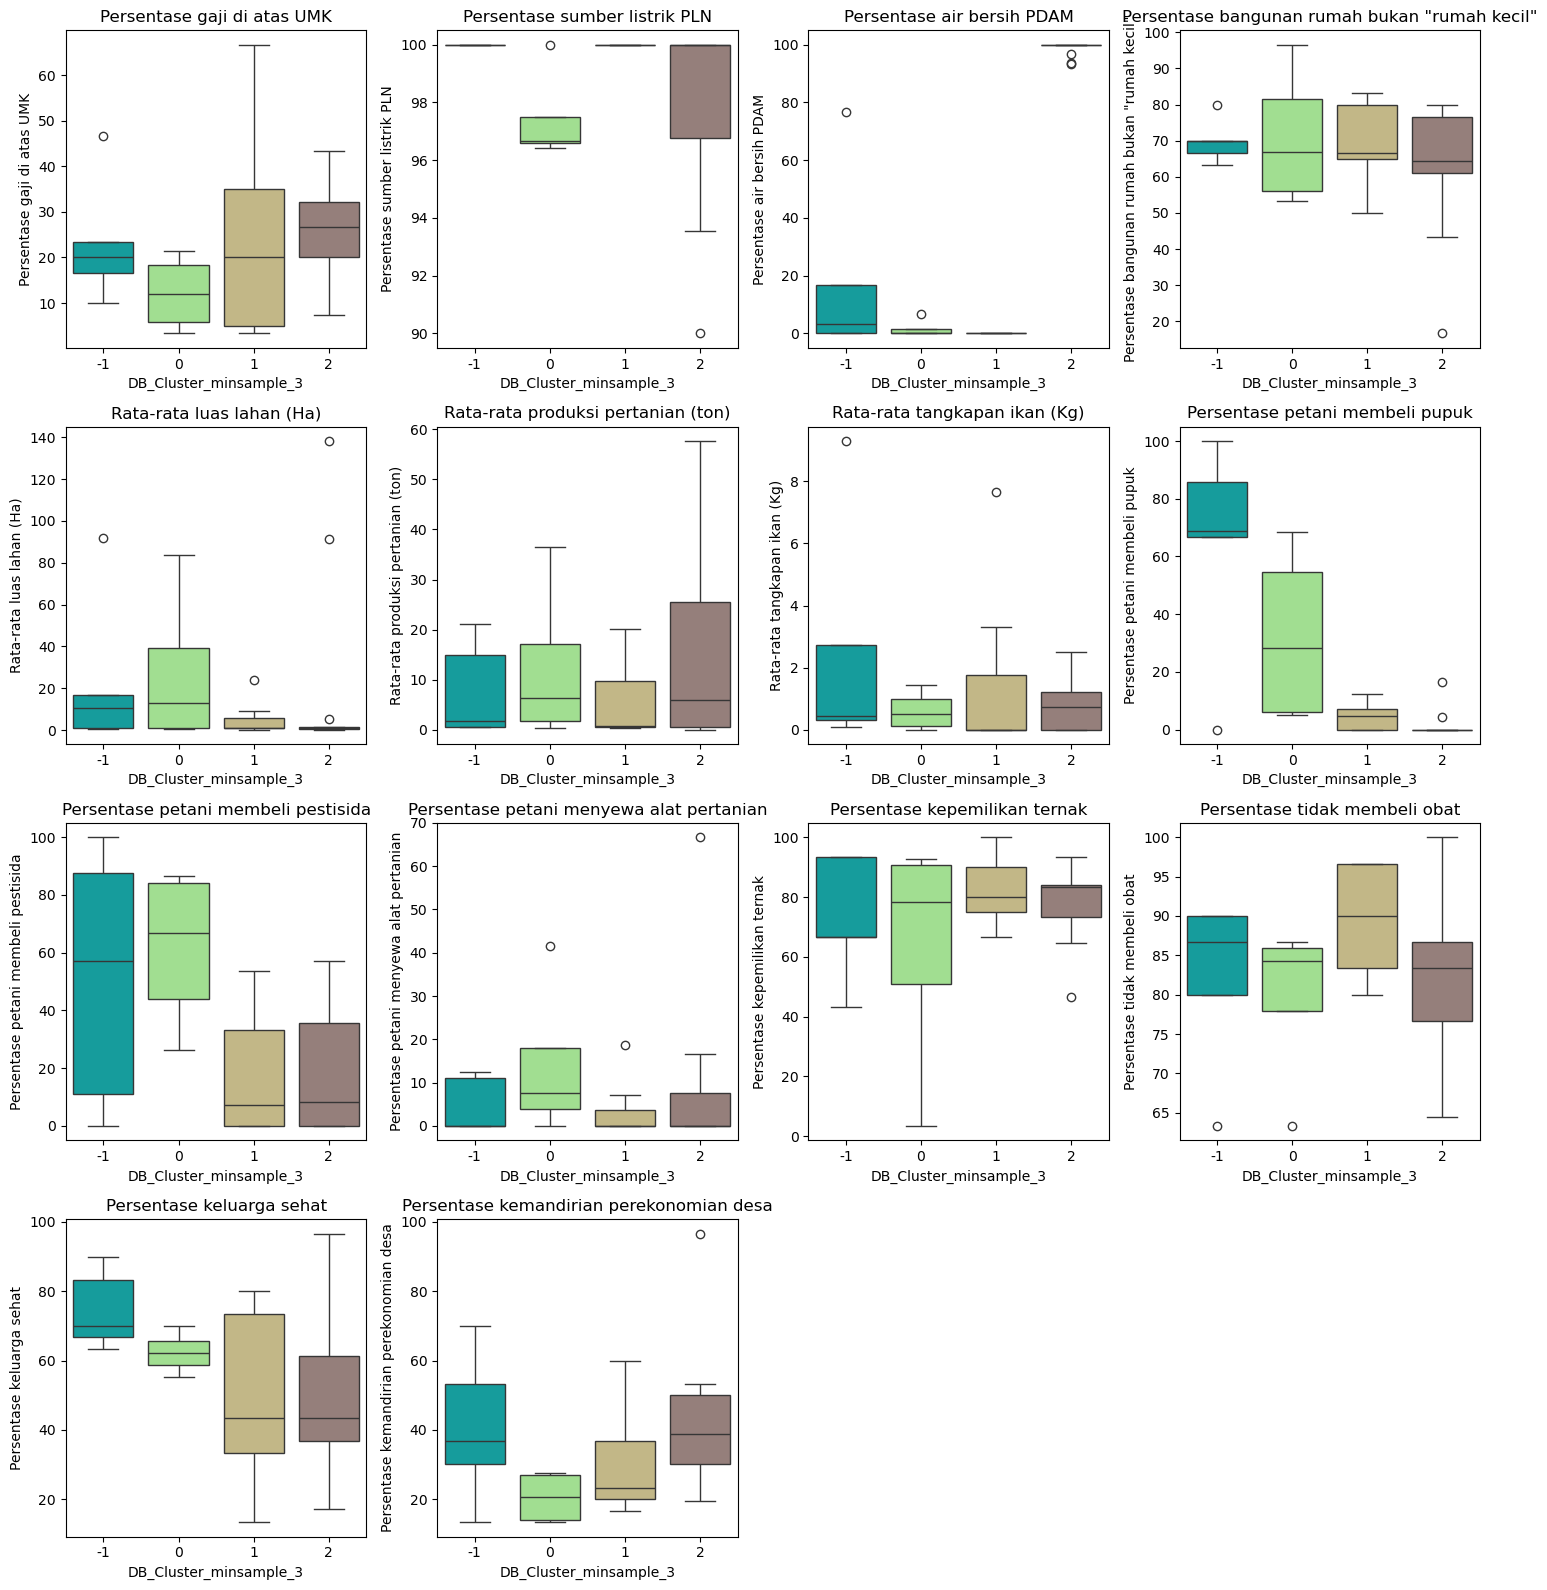

In [100]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_3", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### bar chart

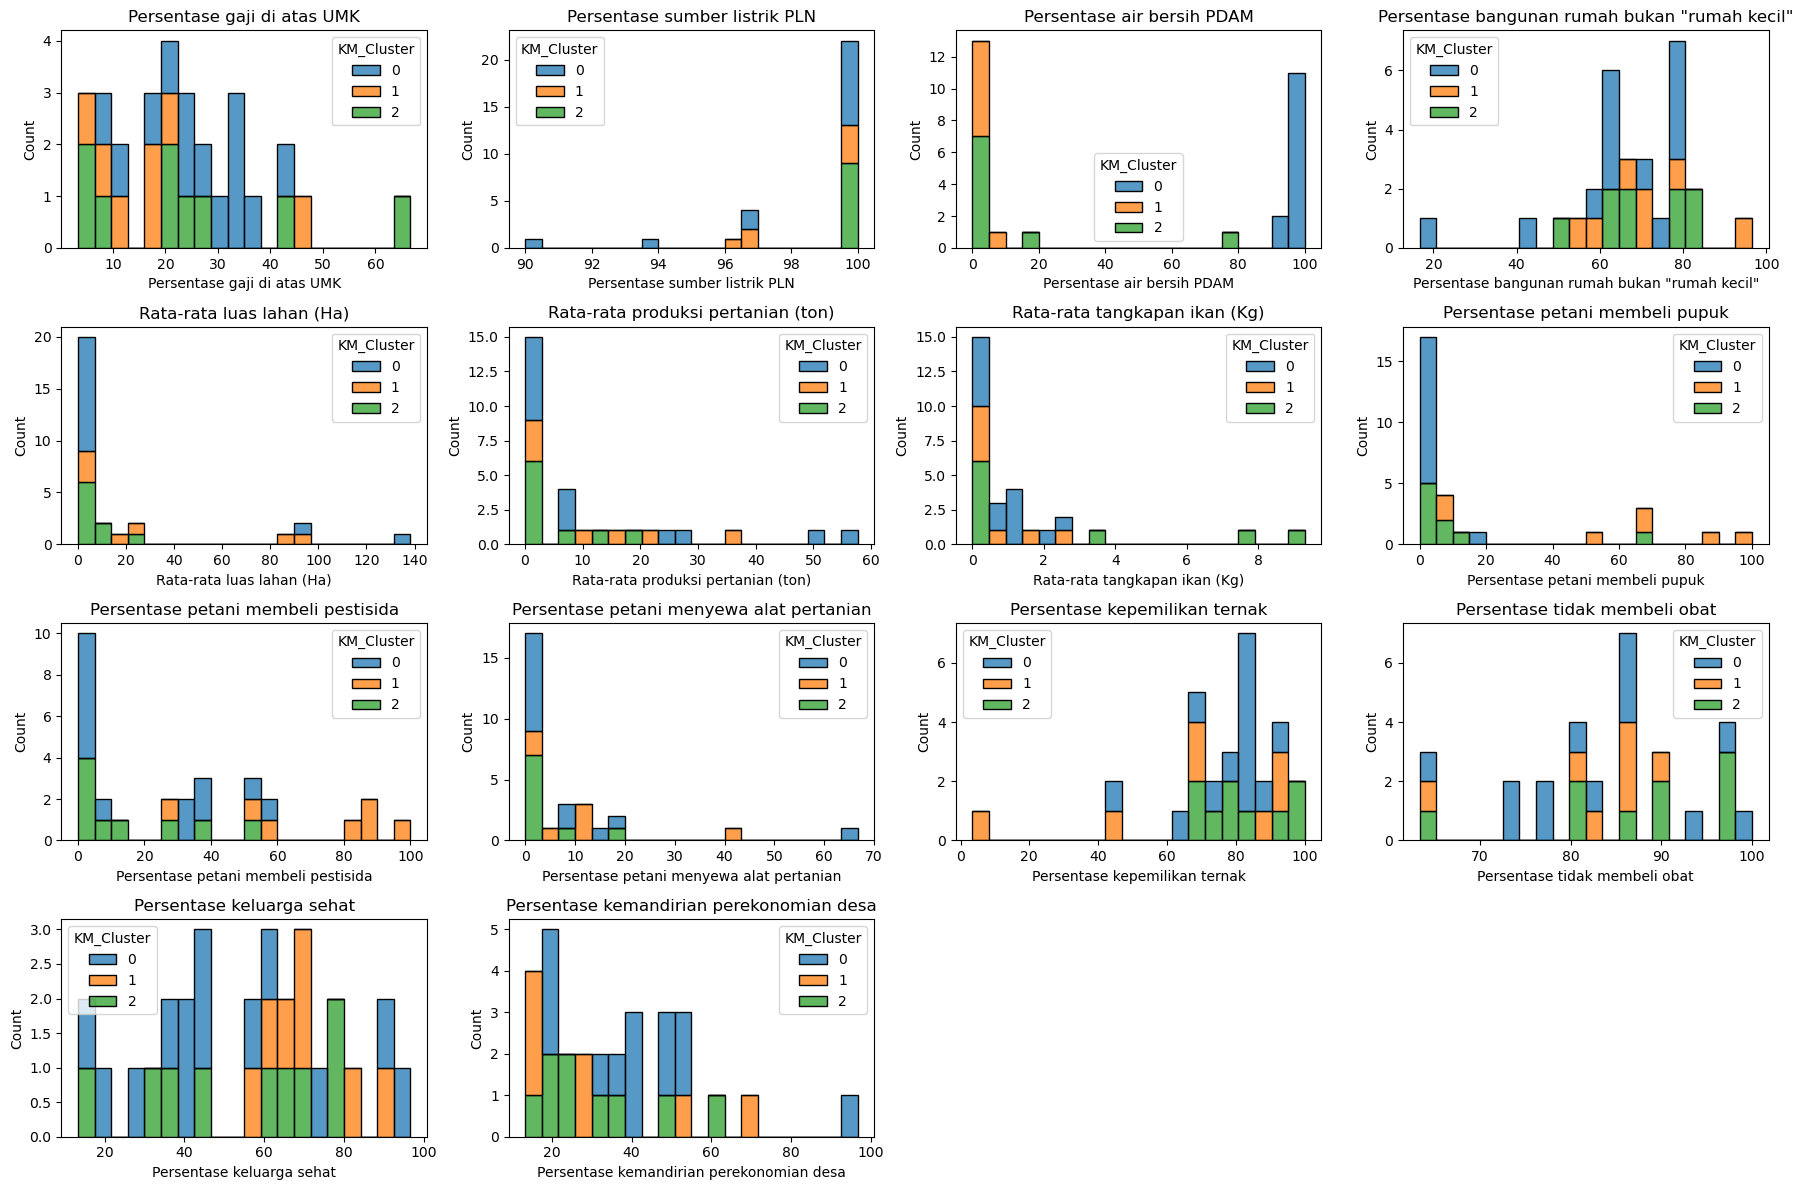

In [101]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_pca_coba,
        x=col,
        hue="KM_Cluster",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

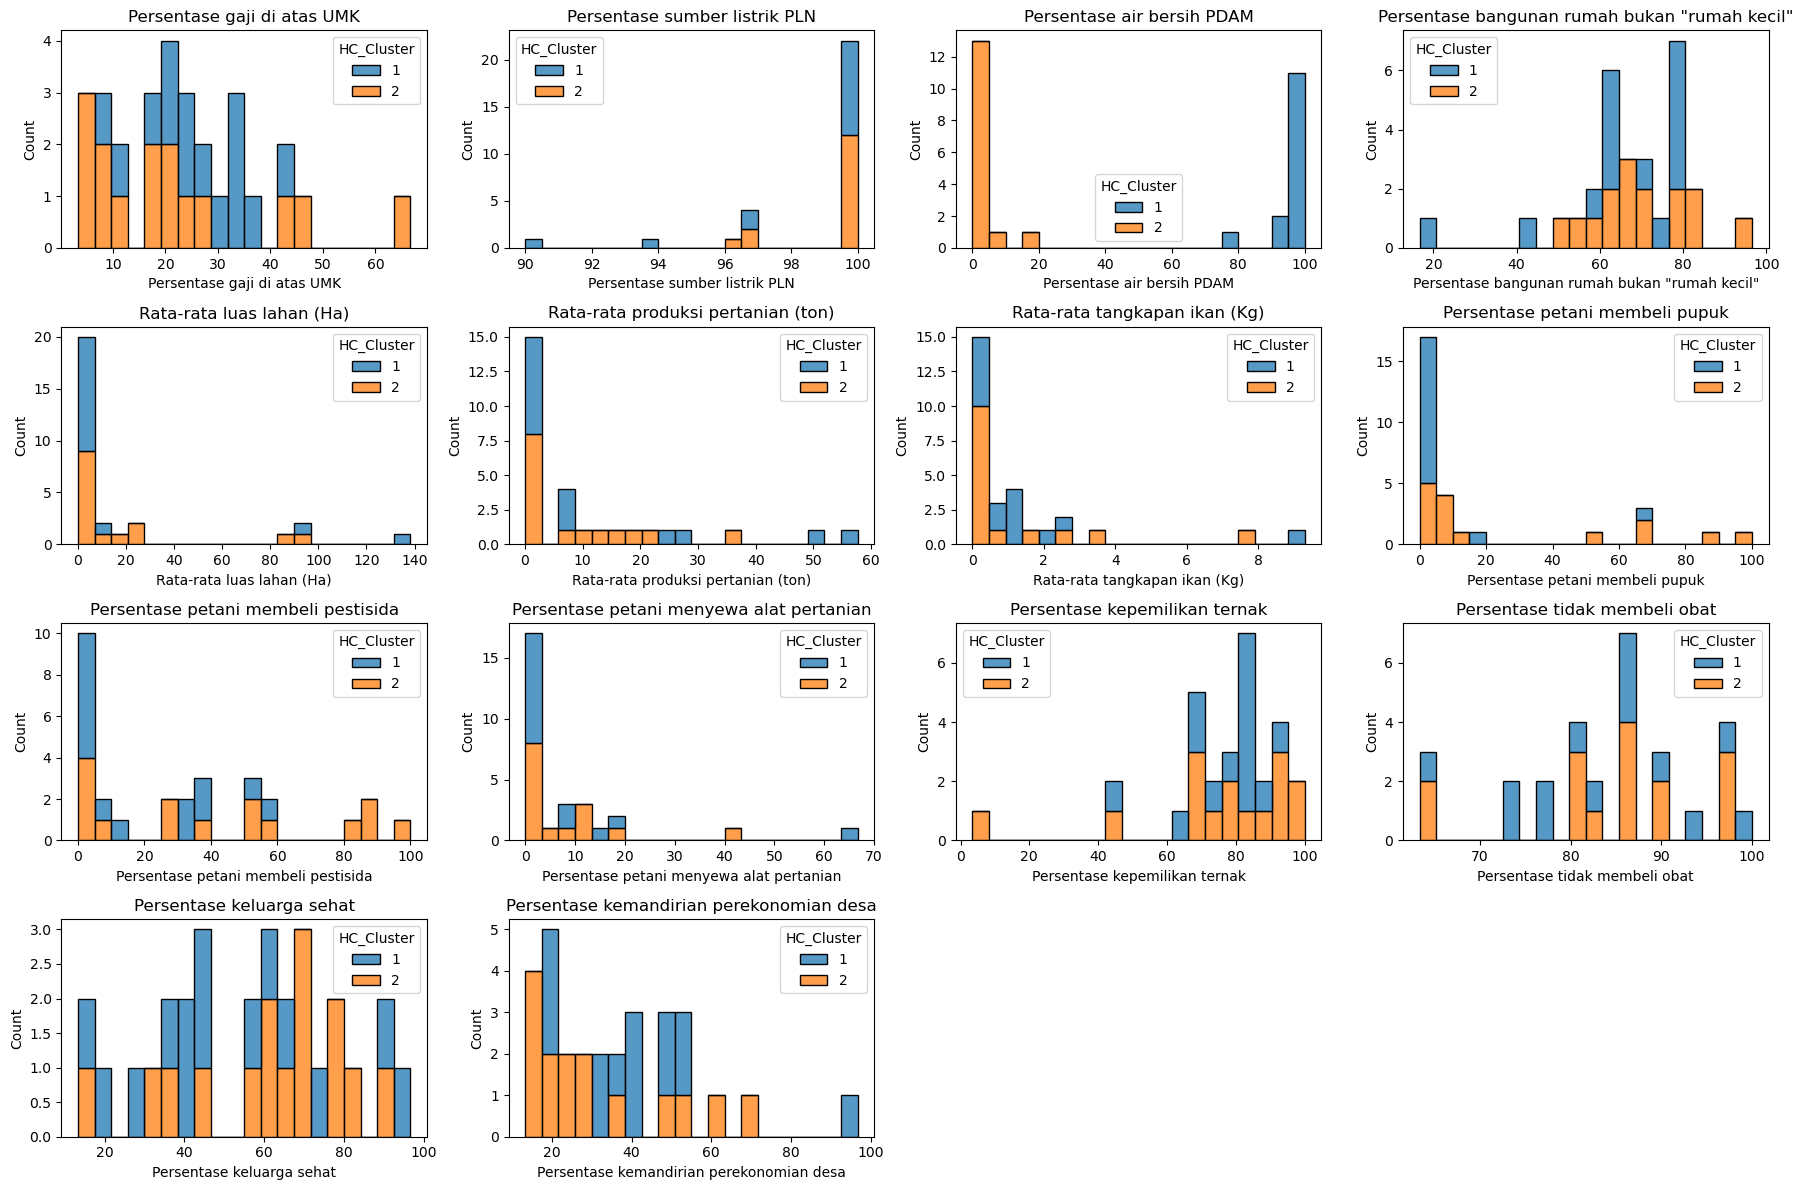

In [102]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_pca_coba,
        x=col,
        hue="HC_Cluster",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

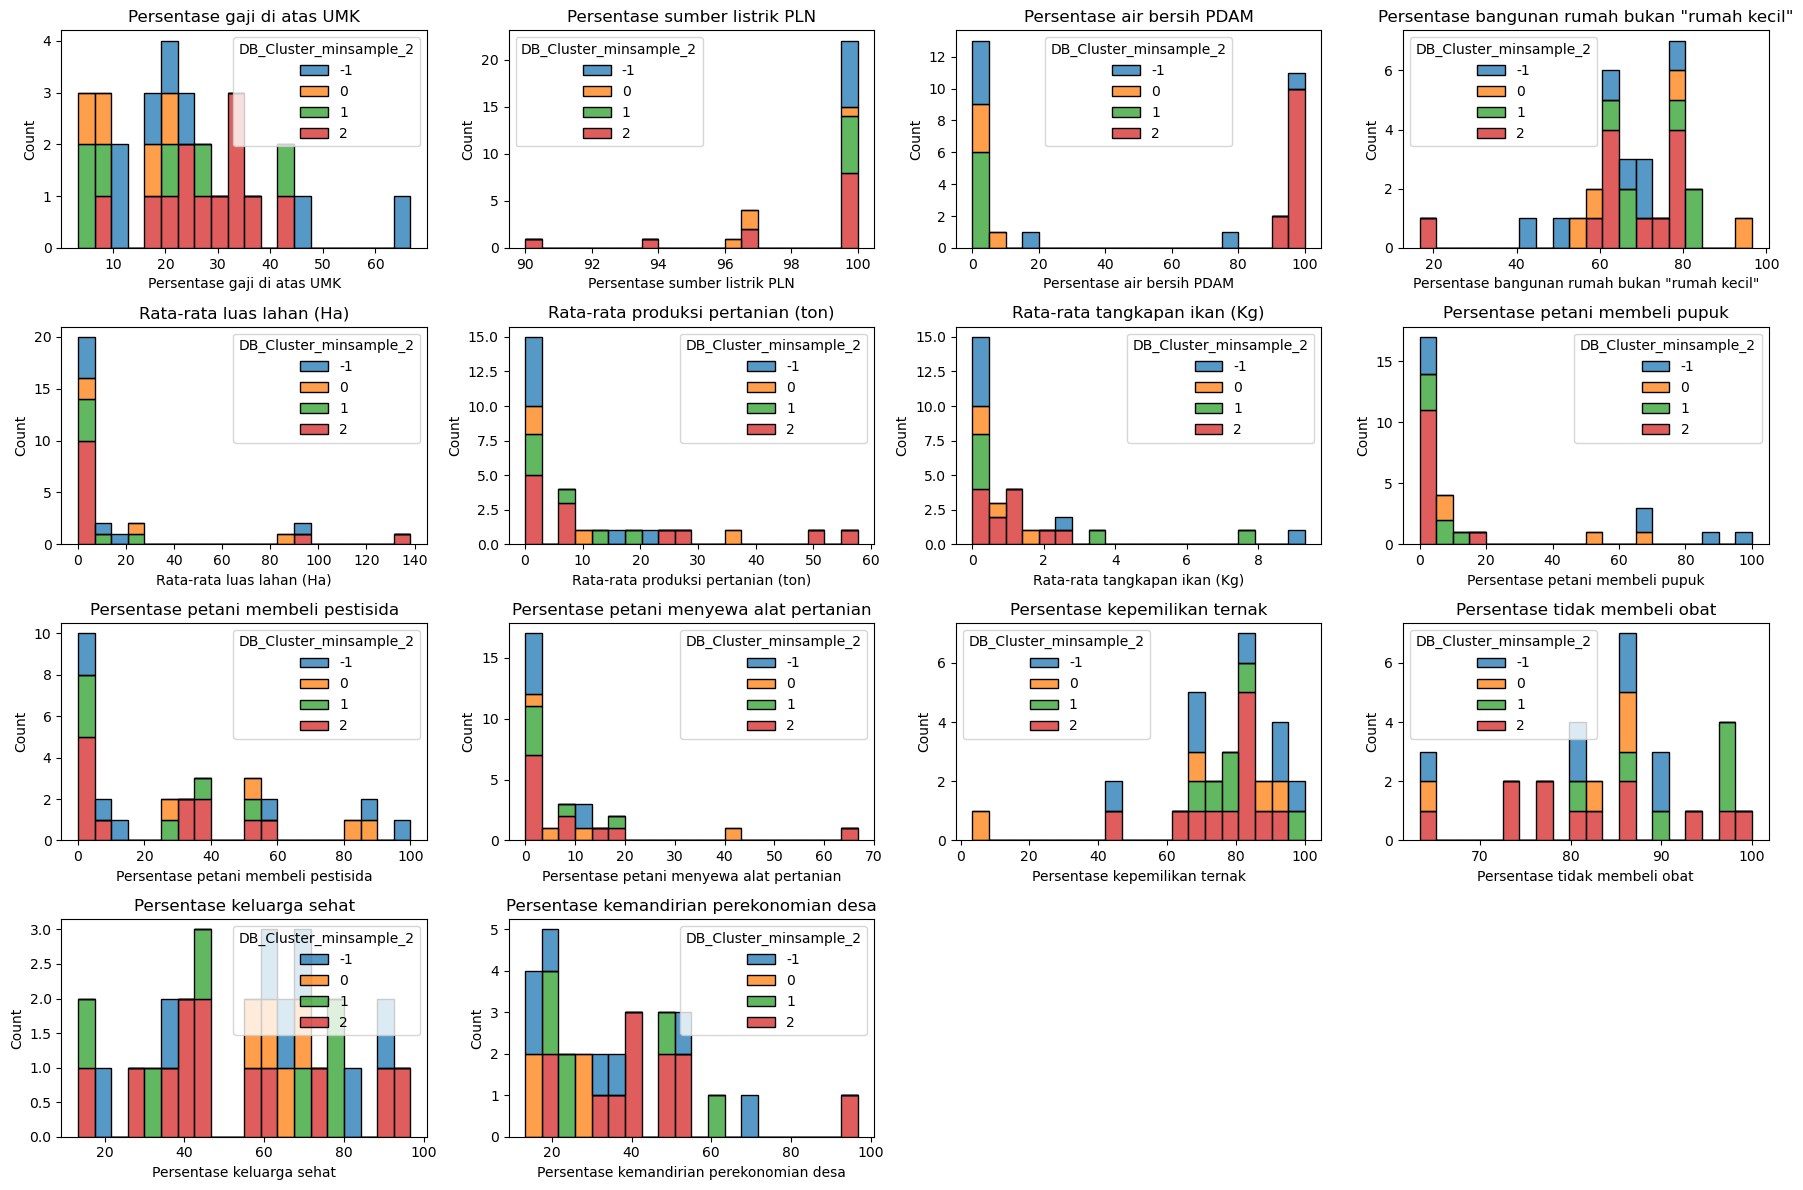

In [103]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_2",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

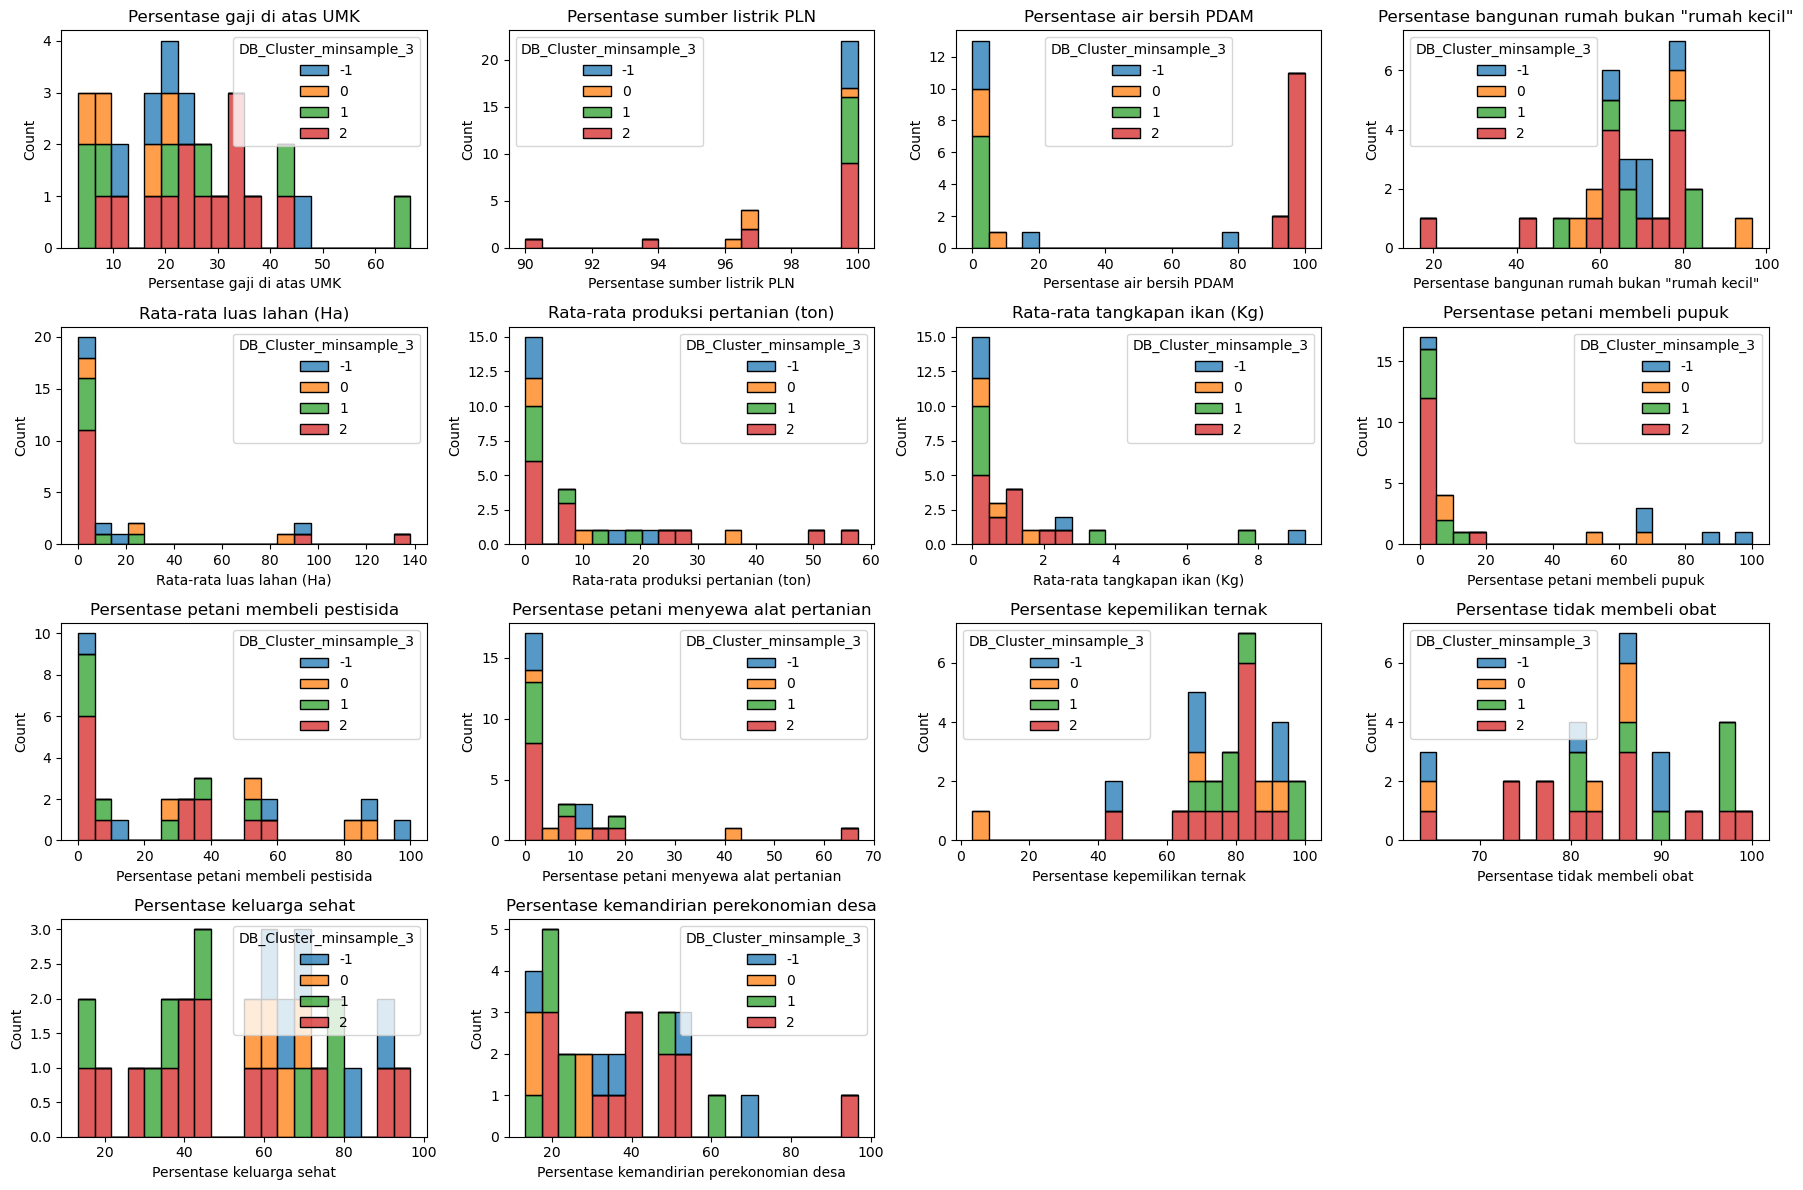

In [104]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_3",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### GRAFIK

C:\Users\halid\AppData\Local\Temp\ipykernel_14728\966423908.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


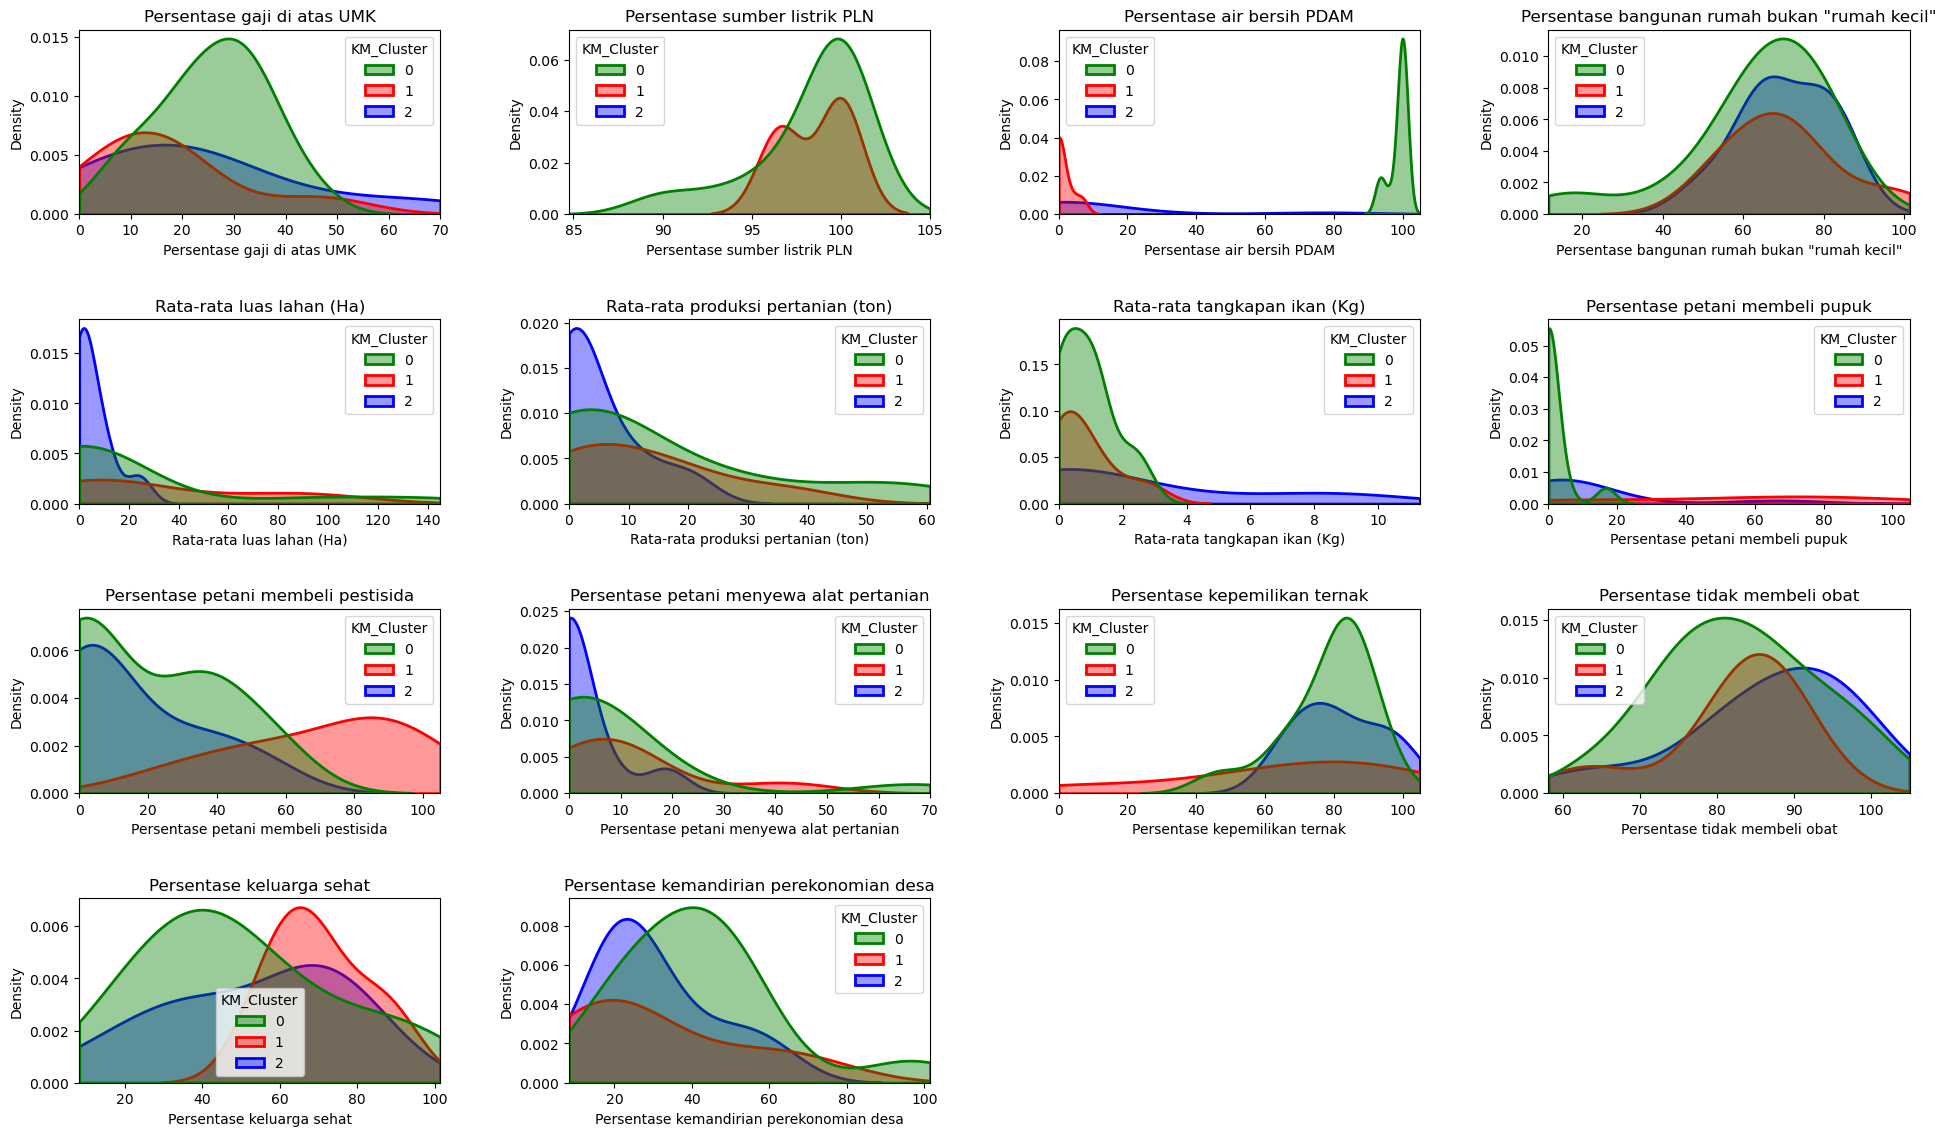

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy untuk perhitungan

# Asumsi 'rows', 'cols', 'df_pca_coba', dan 'numerical_cols' sudah didefinisikan

cols = 4
rows = 4 # Sesuaikan jumlah baris Anda
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "green", 1: "red", 2: "blue"}

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)

    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="KM_Cluster",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        # Ganti 'clip' dengan batas dinamis:
        clip=(x_min, x_max) 
    )
    
    # --- ATUR BATAS PLOT SECARA DINAMIS ---
    # Ganti 'axes[i].set_xlim(0, 100)' dengan ini:
    axes[i].set_xlim(x_min, x_max)
    
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

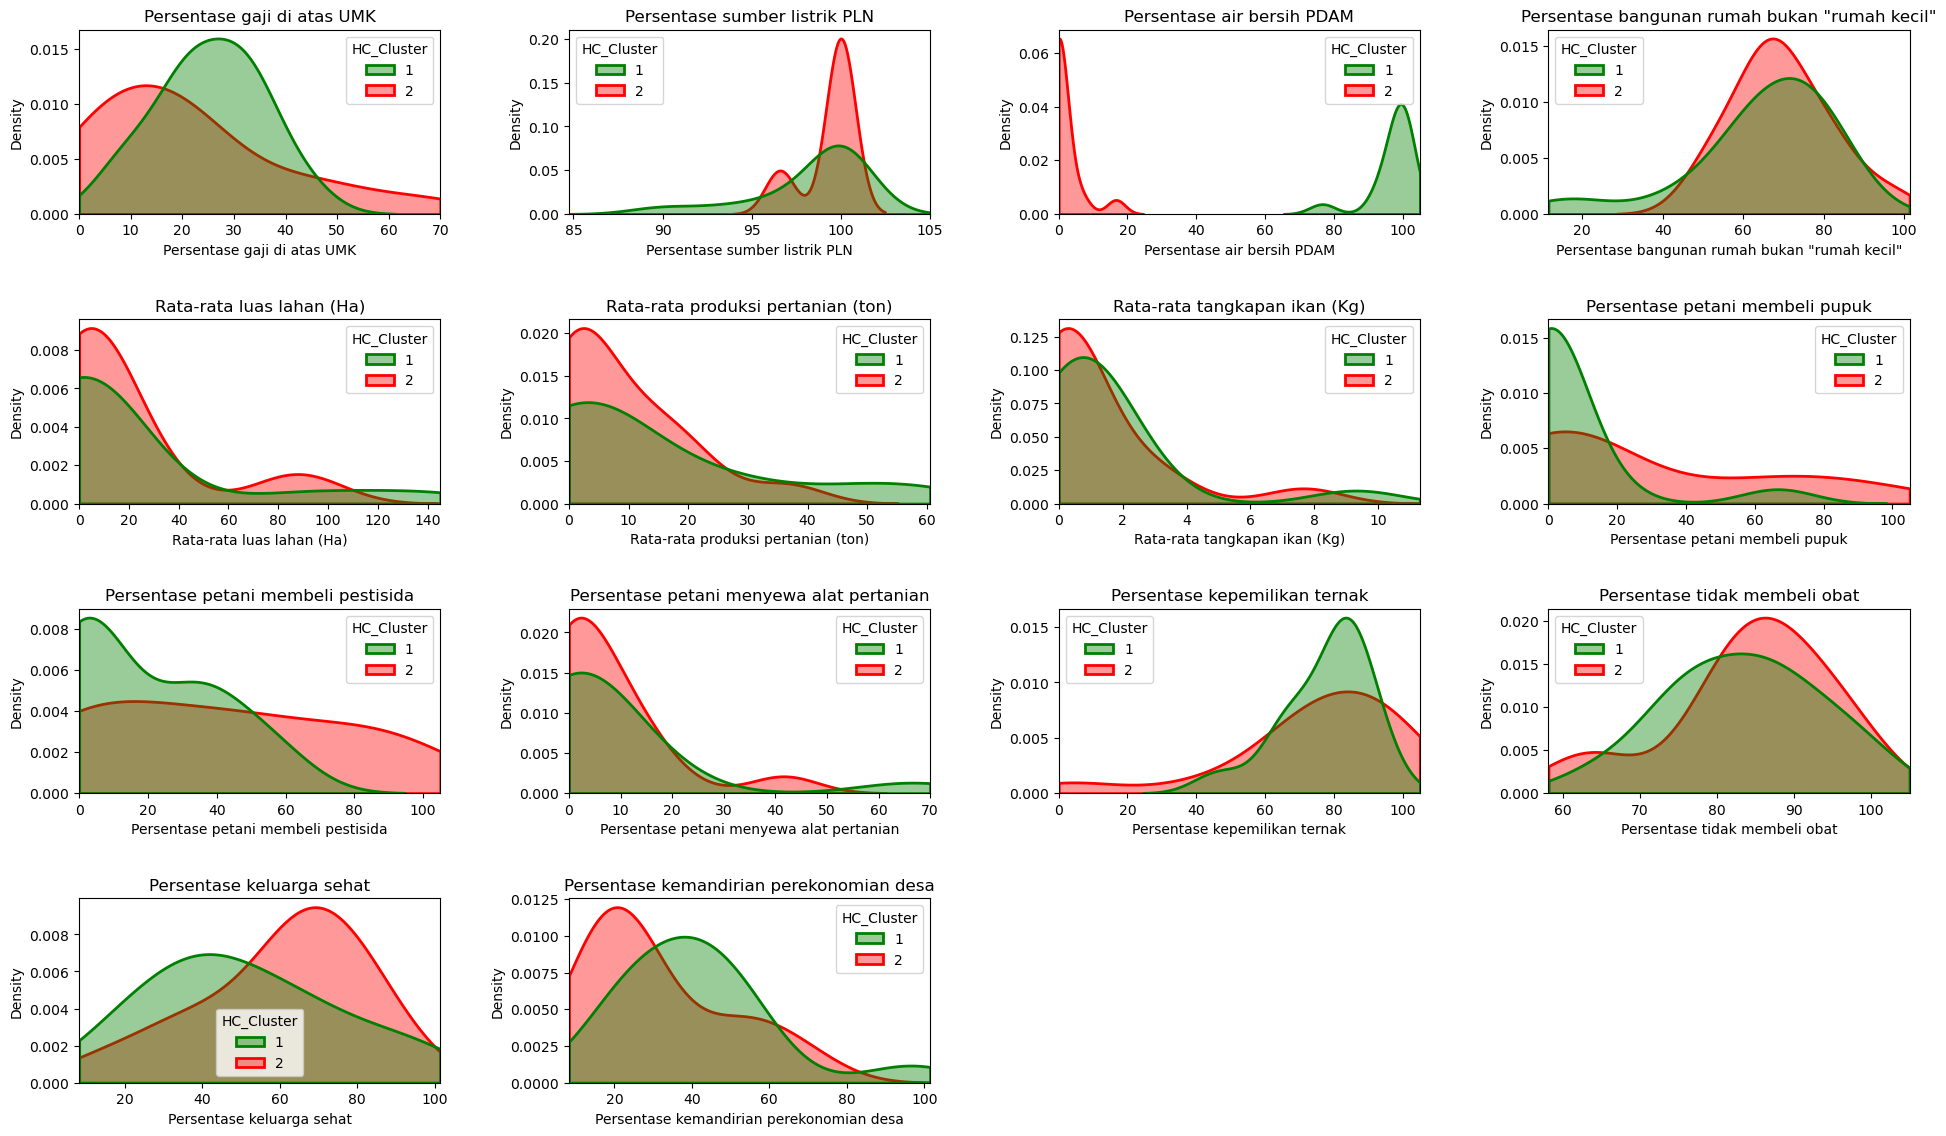

In [106]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {1: "green", 2: "red"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="HC_Cluster",
        palette=custom_palette,
        hue_order=[1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_14728\1332668371.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_14728\1332668371.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


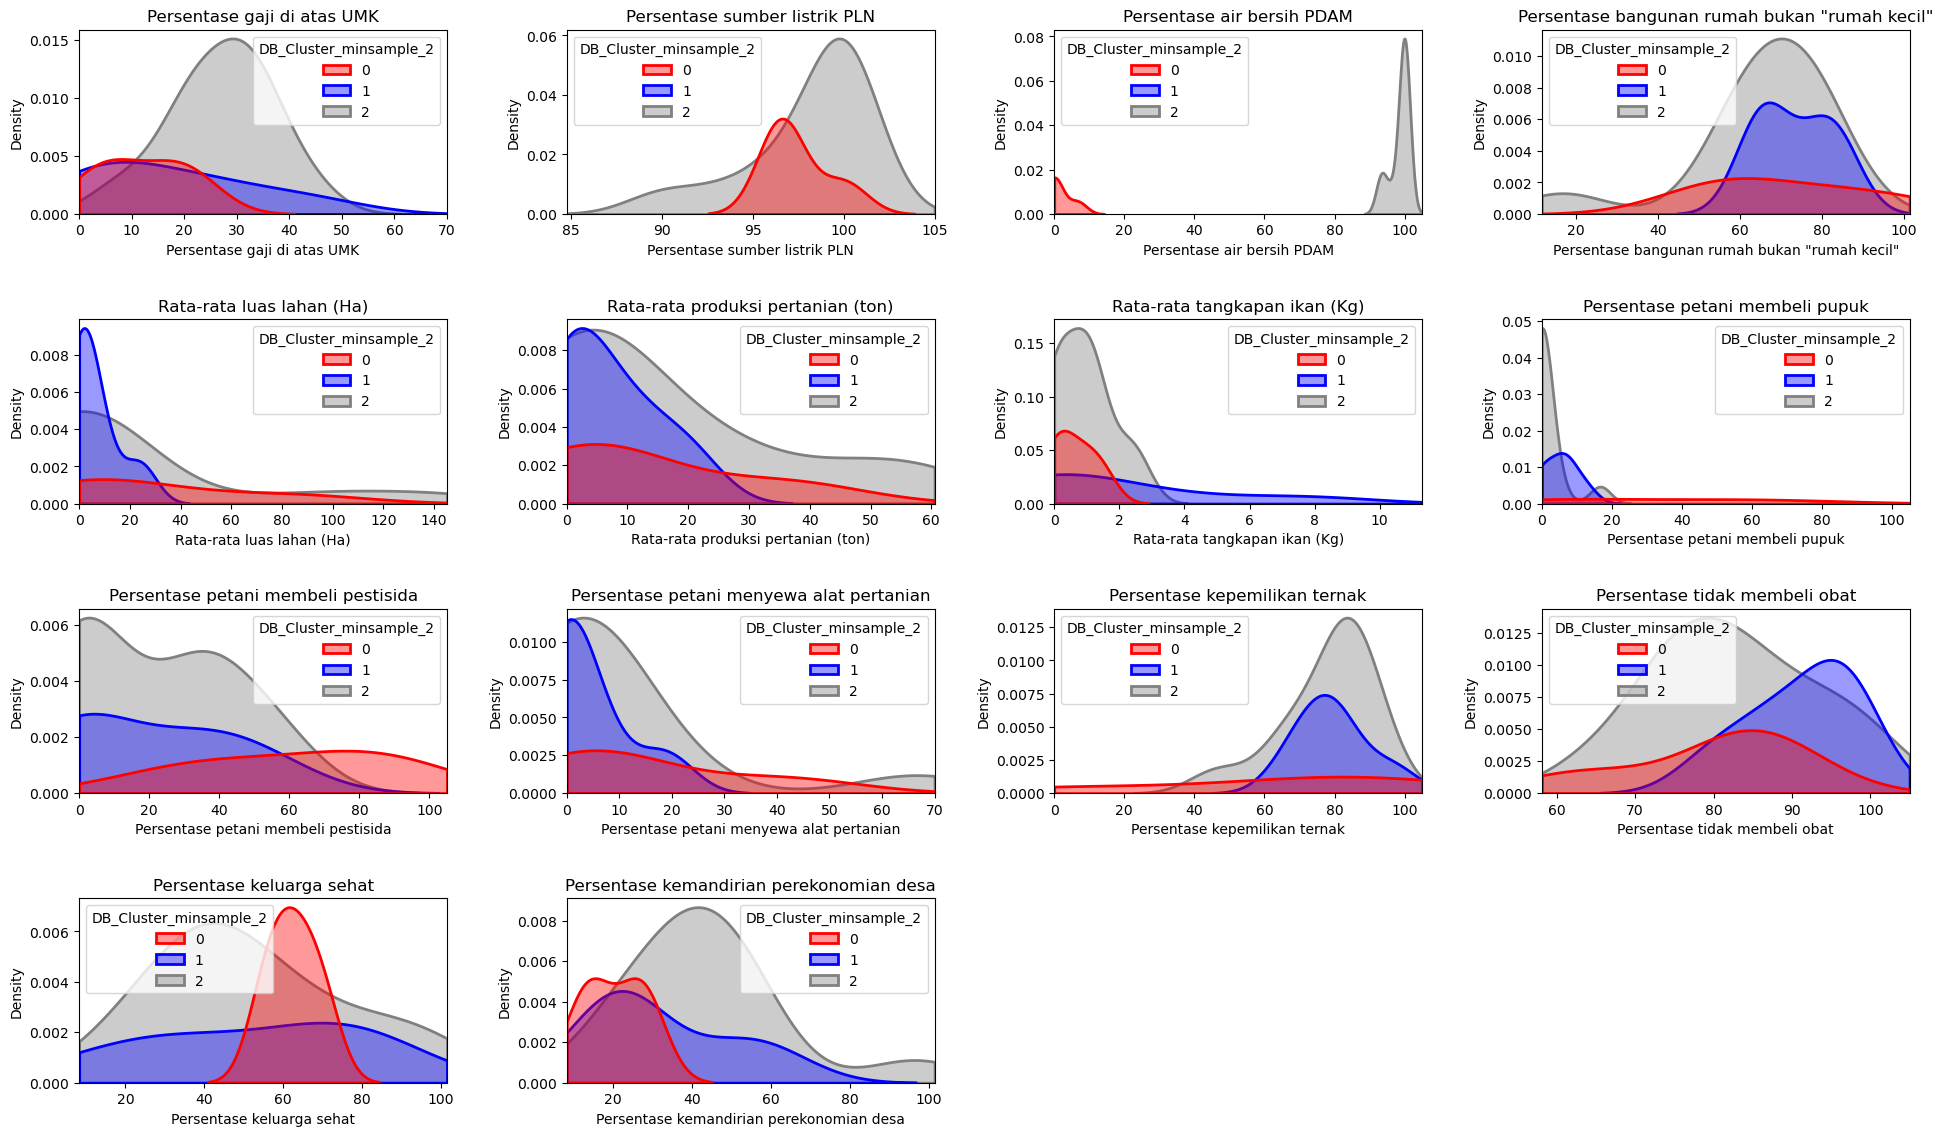

In [107]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "red", 1: "blue", 2: "grey"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_2",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_14728\2786297653.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_14728\2786297653.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


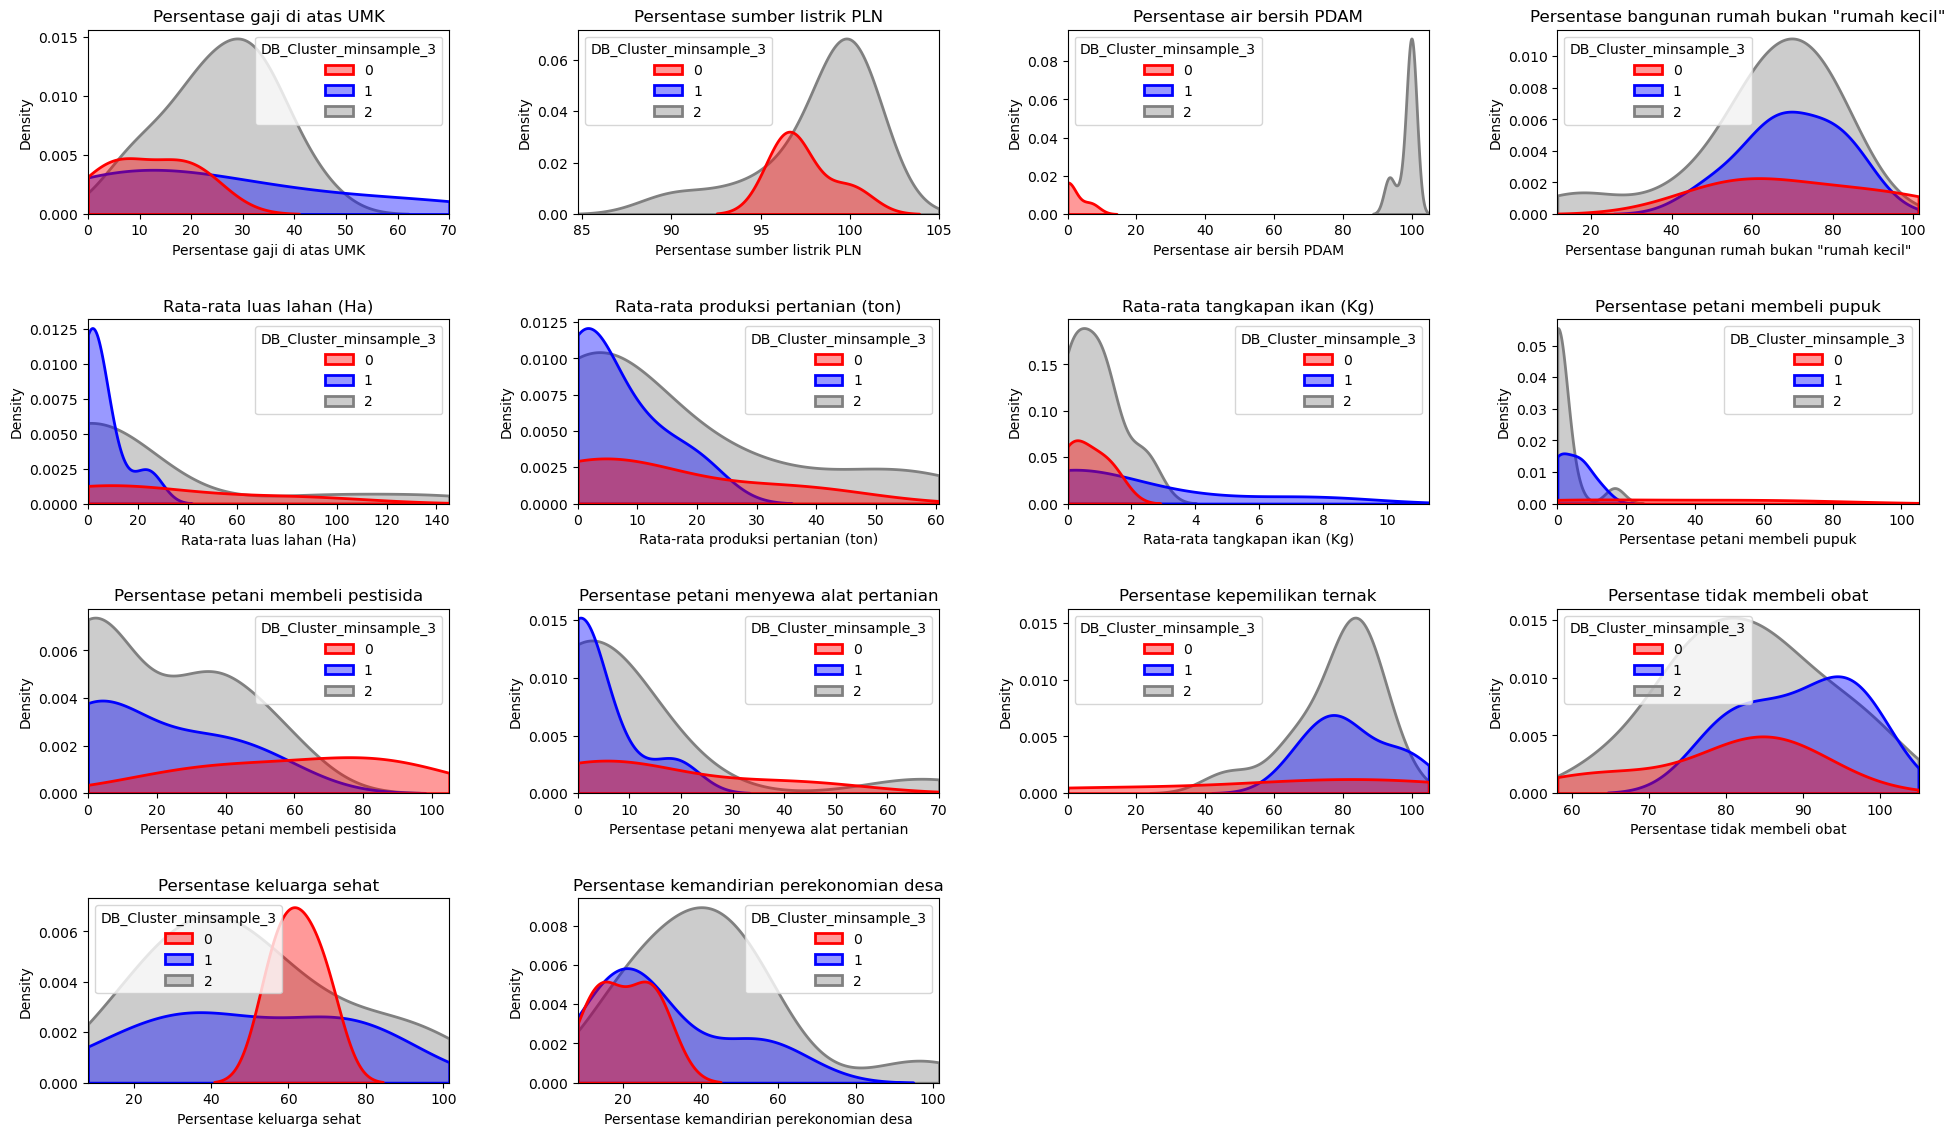

In [108]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "red", 1: "blue", 2: "grey"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_3",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

# save

In [109]:
df_plot['Desa'] = df_plot['Desa'].replace({'Benihading': 'Benihading I'})
df_plot['Desa'] = df_plot['Desa'].replace({'Mahal': 'Mahal I'})
df_plot['Desa'] = df_plot['Desa'].replace({'Tubuk Rajan': 'Tubukrajan'})
df_plot['Desa'] = df_plot['Desa'].replace({'Tubungwalang': 'Tubung Walang'})

df_pca_coba['Desa'] = df_pca_coba['Desa'].replace({'Benihading': 'Benihading I'})
df_pca_coba['Desa'] = df_pca_coba['Desa'].replace({'Mahal': 'Mahal I'})
df_pca_coba['Desa'] = df_pca_coba['Desa'].replace({'Tubuk Rajan': 'Tubukrajan'})
df_pca_coba['Desa'] = df_pca_coba['Desa'].replace({'Tubungwalang': 'Tubung Walang'})

In [110]:
df_plot.to_csv("df_plot.csv", index=False)

In [111]:
df_pca_coba.to_csv("df_pca.csv", index=False)